<a href="https://colab.research.google.com/github/jansteinbacher/Analysis-Privacy-Preserving-AI-Finance-Public/blob/main/Analysis_Privacy_Preserving_AI_Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lending Club Data Analysis
## Comparison of Privacy-Preserving AI Methods on Finance Data Set

Data set: https://www.kaggle.com/datasets/wordsforthewise/lending-club/data

###Mount the Google Drive to Access Lending Club Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Connect to Lending Club Data

In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Lending_Club_Data.csv', low_memory=False)



###Basic oveview of data:

In [ ]:
print(data.describe())
print(data.shape)
print(data.columns)
print(data.head())

       member_id     loan_amnt   funded_amnt  funded_amnt_inv      int_rate  \
count        0.0  2.260668e+06  2.260668e+06     2.260668e+06  2.260668e+06   
mean         NaN  1.504693e+04  1.504166e+04     1.502344e+04  1.309283e+01   
std          NaN  9.190245e+03  9.188413e+03     9.192332e+03  4.832138e+00   
min          NaN  5.000000e+02  5.000000e+02     0.000000e+00  5.310000e+00   
25%          NaN  8.000000e+03  8.000000e+03     8.000000e+03  9.490000e+00   
50%          NaN  1.290000e+04  1.287500e+04     1.280000e+04  1.262000e+01   
75%          NaN  2.000000e+04  2.000000e+04     2.000000e+04  1.599000e+01   
max          NaN  4.000000e+04  4.000000e+04     4.000000e+04  3.099000e+01   

        installment    annual_inc           dti   delinq_2yrs  fico_range_low  \
count  2.260668e+06  2.260664e+06  2.258957e+06  2.260639e+06    2.260668e+06   
mean   4.458068e+02  7.799243e+04  1.882420e+01  3.068792e-01    6.985882e+02   
std    2.671735e+02  1.126962e+05  1.418333e+

Predict if a particular loan was fully paid or charged off (if it was paid or the customer was not able to pay back the loan amount)

In [ ]:
data['loan_status'].value_counts()

loan_status
Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: count, dtype: int64

Drop rows which have loan_status other than Fully Paid and Charged Off

In [ ]:

data = data[(data['loan_status'] == 'Fully Paid') | (data['loan_status'] == 'Charged Off')]

In [ ]:
# Check how many rows were dropped
data.shape

(1345310, 151)

From originally 2260701 we only have 1345310 rows left.

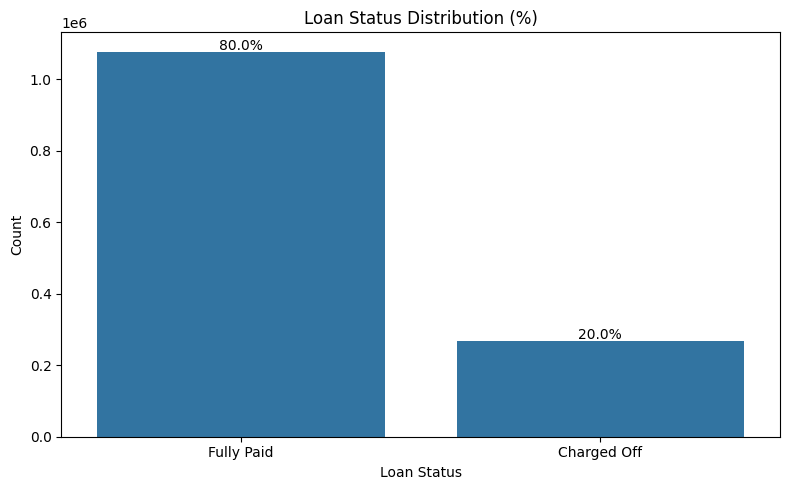

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Countplot with percentages
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='loan_status', data=data)

# Calculate total count for percentage
total = len(data)

# Add percentage labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    percent = 100 * height / total
    ax.text(p.get_x() + p.get_width() / 2., height + 5000,  # adjust height as needed
            f'{percent:.1f}%', ha="center", fontsize=10)

plt.title('Loan Status Distribution (%)')
plt.ylabel('Count')
plt.xlabel('Loan Status')
plt.tight_layout()
plt.show()


# Data Cleaning

Examine the completeness of the individual features.

In [ ]:
((data.isnull().sum()/len(data))*100).sort_values(ascending=False)

member_id                                     100.000000
next_pymnt_d                                  100.000000
orig_projected_additional_accrued_interest     99.720585
hardship_payoff_balance_amount                 99.572292
hardship_last_payment_amount                   99.572292
                                                 ...    
fico_range_high                                 0.000000
fico_range_low                                  0.000000
hardship_flag                                   0.000000
disbursement_method                             0.000000
debt_settlement_flag                            0.000000
Length: 151, dtype: float64

Shown in a plot

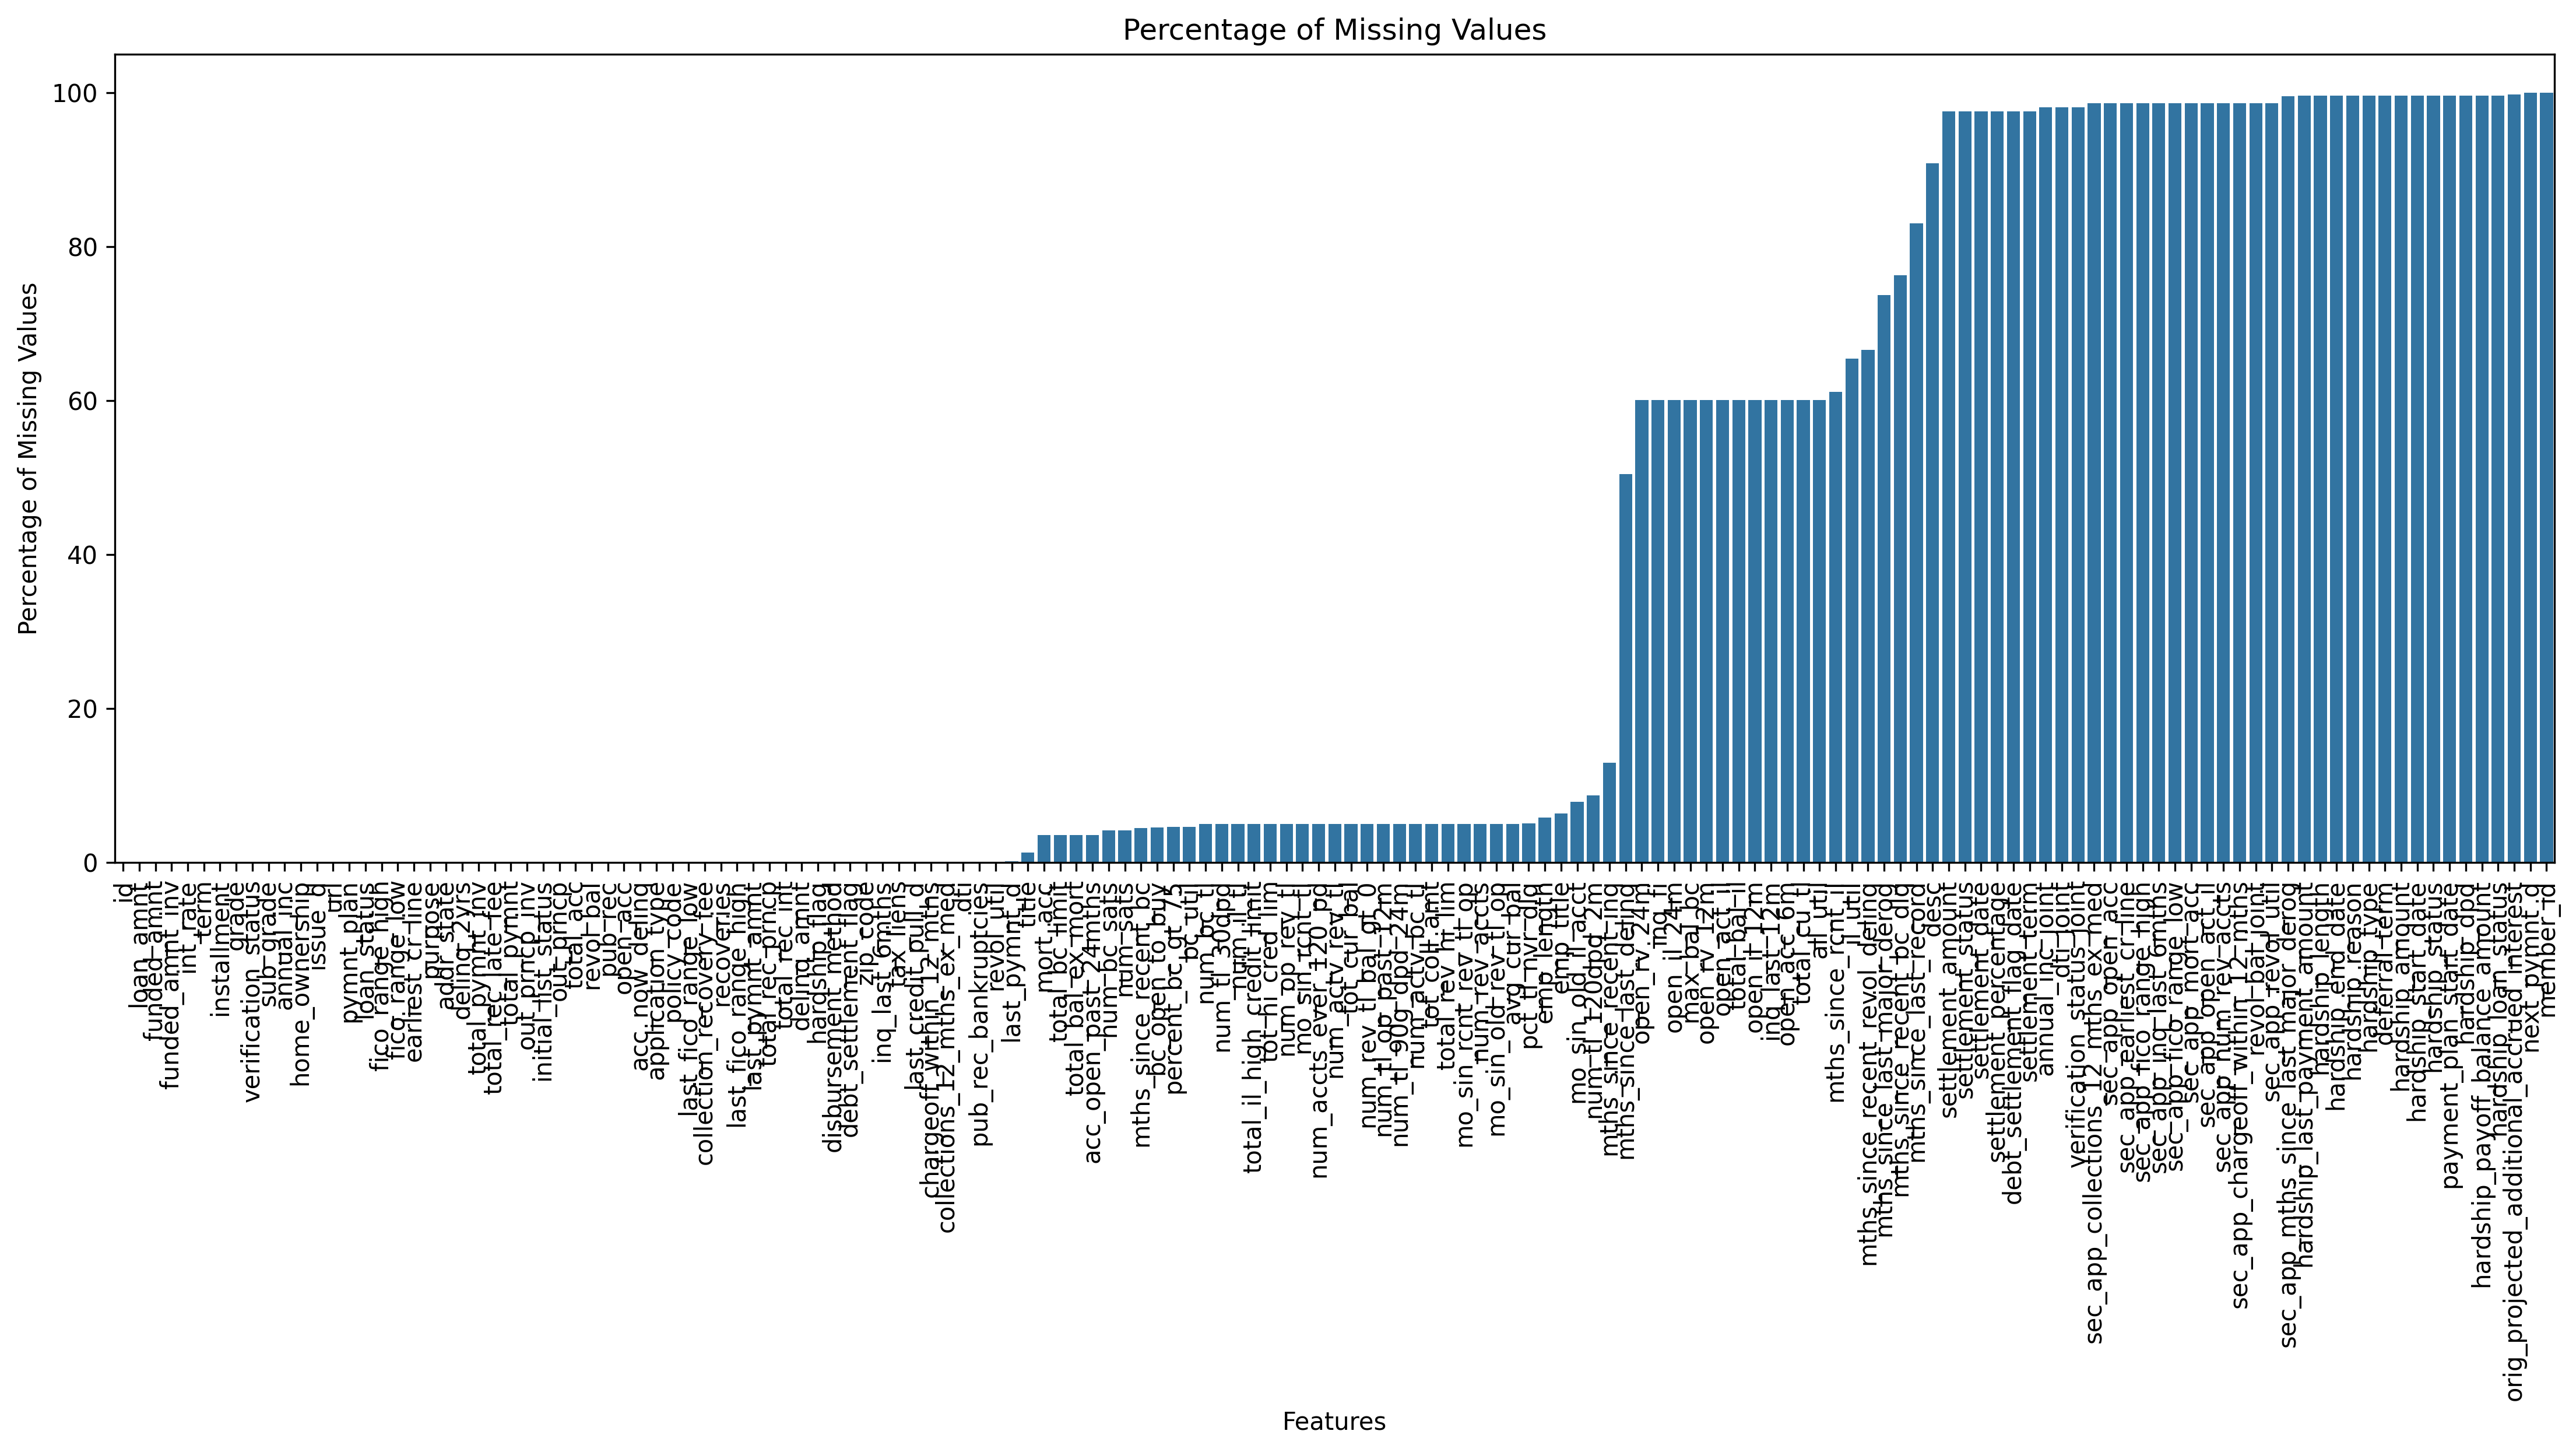

In [ ]:
plt.figure(figsize=(18,6),dpi=300) # make image larger and clearer
# y contains the % of missing values od each column and x is the index of the series in above cell
sns.barplot(y=((data.isnull().sum()/len(data))*100).sort_values(), x=((data.isnull().sum()/len(data))*100).sort_values().index)
plt.xticks(rotation=90); # to rotate x-axis labels from horizontal to vertical
plt.title('Percentage of Missing Values');
plt.xlabel('Features');
plt.ylabel('Percentage of Missing Values');
plt.savefig('/content/drive/MyDrive/Lending_Club_Data_Analysis/Data_Analysis/missing_values.png')
plt.show()



## Data Cleaning: Dropping Features with High Missing Rates

Drop any features with 50% or more missing values for two main reasons:

1. Filling in values for such a large number of missing entries is impractical.
2. With 151 features and over 1.3 million rows (1,345,310 rows), reducing the number of features is necessary to manage the dataset within hardware limitations.

In [ ]:
keep = data.columns[((data.isnull().sum()/len(data))*100 < 50)].to_list()
keep # list of columns to be kept

['id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'ch

# Feature Selection Rationale

Given the sensitive nature of financial data and the challenges associated with data scarcity, selecting appropriate features is crucial to ensure model validity and fairness. In the Lending Club dataset, not all features are suitable for predictive modeling at the point of loan issuance. Specifically, many features either:

- Are **only available after loan issuance**, causing **information leakage**,  
- Are **poorly documented**, creating **interpretability issues**,  
- Or are **irrelevant or redundant** for a decision-making context based on publicly available borrower information.

To maintain the integrity of our privacy-preserving comparative study, we focus exclusively on features that would be known **before a loan decision is made**, are **clearly understood**, and are **predictively meaningful**.

The final selected features are:

['addr_state', 'annual_inc', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'grade', 'home_ownership', 'application_type', 'initial_list_status', 'int_rate', 'loan_amnt', 'num_actv_bc_tl', 'loan_status', 'mort_acc', 'tot_cur_bal', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'title', 'total_acc', 'verification_status']


Each selected feature either reflects borrower characteristics, loan terms, or general creditworthiness, all of which would realistically be available at the time of loan application.

---

# Exclusion of Non-Selected Features

The following categories explain why other features were excluded:

## 1. Post-Loan Outcome Features (Information Leakage Risk)

These features describe repayment performance or loan status after issuance, which would not be available at decision time:

- `out_prncp`, `out_prncp_inv`, `total_pymnt`, `total_pymnt_inv`, `total_rec_prncp`,
- `total_rec_int`, `total_rec_late_fee`, `recoveries`, `collection_recovery_fee`,
- `last_pymnt_d`, `last_pymnt_amnt`, `last_credit_pull_d`,
- `hardship_flag`, `disbursement_method`, `debt_settlement_flag`, `chargeoff_within_12_mths`

## 2. Features Related to Internal Policies or Application Tracking

These fields represent internal identifiers or administrative processes, not borrower information:

- `id`, `url`, `policy_code`, `pymnt_plan`

*(Note: `initial_list_status` and `application_type` are retained because they reflect borrower or listing attributes.)*

## 3. Highly Redundant or Composite Features

Some features are strongly correlated with others already included, or are derivative versions:

- `funded_amnt`, `funded_amnt_inv`

*(Both are highly similar to `loan_amnt`.)*

## 4. Poorly Documented or Unclear Features

Where no reliable documentation exists, inclusion would risk misinterpretation:

- `mths_since_recent_bc`, `mths_since_recent_inq`, `mo_sin_old_il_acct`,
- `mo_sin_old_rev_tl_op`, `mo_sin_rcnt_rev_tl_op`, `mo_sin_rcnt_tl`

## 5. Very Sparse or Low-Variance Features

Features that add little predictive value due to extreme sparsity or homogeneity:

- `collections_12_mths_ex_med`, `acc_now_delinq`, `acc_open_past_24mths`, `tot_coll_amt`,
- `tot_hi_cred_lim`, `total_bal_ex_mort`, `total_bc_limit`, `total_il_high_credit_limit`,
- `percent_bc_gt_75`

## 6. Highly Specific Financial Products Not Relevant at Loan Issuance

Features narrowly focused on specific products:

- `bc_open_to_buy`, `bc_util`

*(General revolving balance (`revol_bal`) and utilization (`revol_util`) are retained.)*

## 7. Time-Sensitive Features Difficult to Reconstruct at Loan Time

Features depending on dynamic post-application events are excluded:

- `inq_last_6mths`, `num_tl_90g_dpd_24m`, `num_tl_30dpd`, `num_tl_120dpd_2m`

---

# Conclusion

This selection methodology ensures that the empirical comparison of privacy-preserving techniques remains fair and applicable to real-world scenarios where access to only pre-loan data is assumed. It prevents information leakage, maintains interpretability, and mirrors realistic constraints in financial services applications.


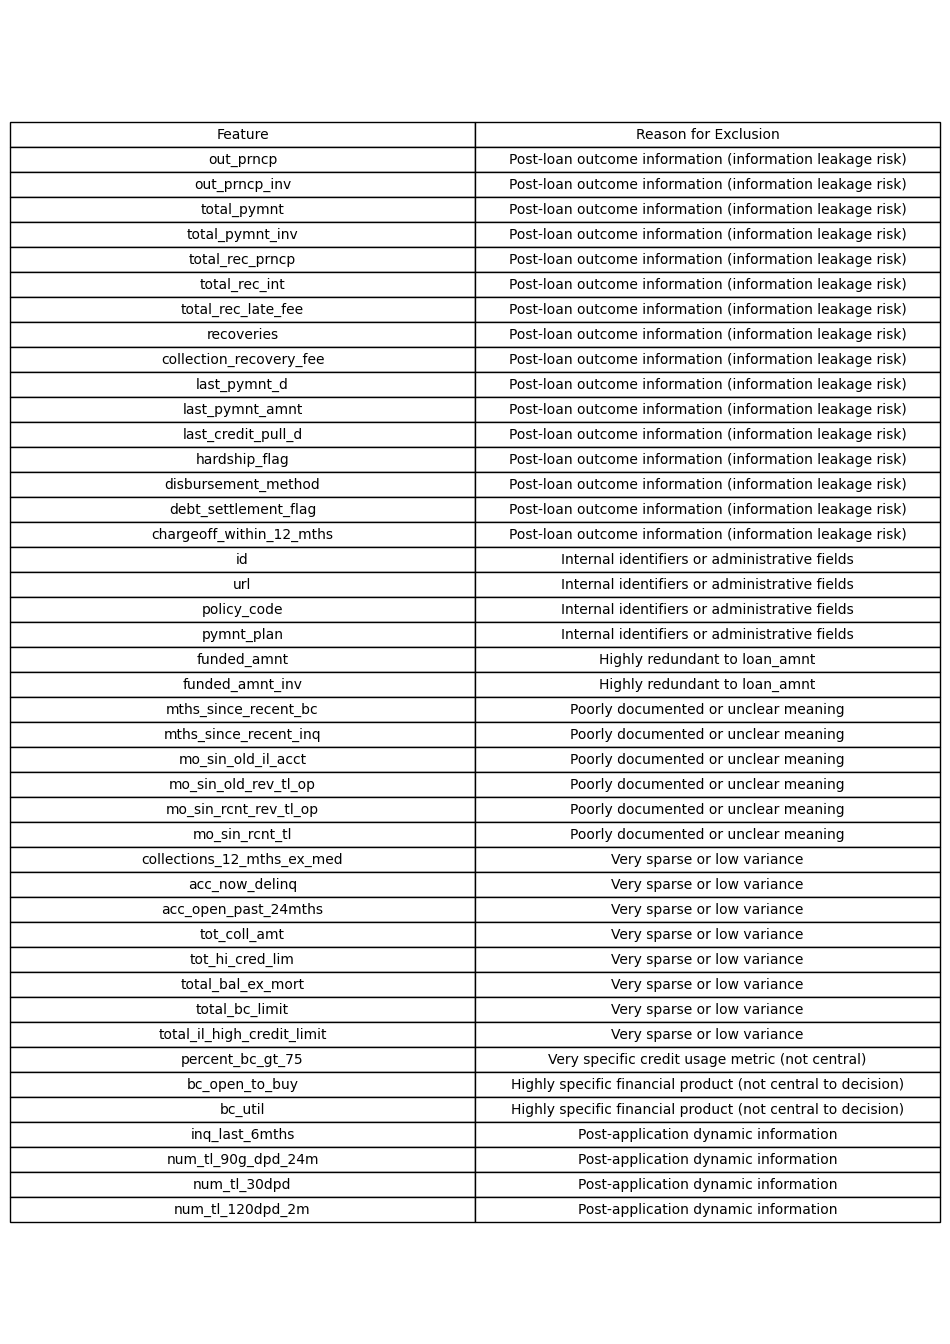

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define features
features = [
    # Post-loan outcome information (16)
    'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
    'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
    'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'hardship_flag',
    'disbursement_method', 'debt_settlement_flag', 'chargeoff_within_12_mths',

    # Internal identifiers (4)
    'id', 'url', 'policy_code', 'pymnt_plan',

    # Highly redundant (2)
    'funded_amnt', 'funded_amnt_inv',

    # Poorly documented (6)
    'mths_since_recent_bc', 'mths_since_recent_inq', 'mo_sin_old_il_acct',
    'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',

    # Sparse / low variance (8)
    'collections_12_mths_ex_med', 'acc_now_delinq', 'acc_open_past_24mths', 'tot_coll_amt',
    'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit',

    # Very specific credit info (1)
    'percent_bc_gt_75',

    # Highly specific financial products (2)
    'bc_open_to_buy', 'bc_util',

    # Post-application dynamic info (4)
    'inq_last_6mths', 'num_tl_90g_dpd_24m', 'num_tl_30dpd', 'num_tl_120dpd_2m'
]

# Reasons matching exactly 46 items
reasons = (
    ['Post-loan outcome information (information leakage risk)'] * 16 +
    ['Internal identifiers or administrative fields'] * 4 +
    ['Highly redundant to loan_amnt'] * 2 +
    ['Poorly documented or unclear meaning'] * 6 +
    ['Very sparse or low variance'] * 8 +
    ['Very specific credit usage metric (not central)'] * 1 +
    ['Highly specific financial product (not central to decision)'] * 2 +
    ['Post-application dynamic information'] * 4
)

# Create the DataFrame
feature_exclusion_df = pd.DataFrame({
    'Feature': features,
    'Reason for Exclusion': reasons
})

# Save CSV
feature_exclusion_df.to_csv('/content/drive/MyDrive/Lending_Club_Data_Analysis/Data_Analysis/feature_exclusion_table.csv', index=False)


# Plot the table
fig, ax = plt.subplots(figsize=(12, len(feature_exclusion_df) * 0.4))  # Adjust height dynamically
ax.axis('off')

# Create a table from the DataFrame
table = ax.table(
    cellText=feature_exclusion_df.values,
    colLabels=feature_exclusion_df.columns,
    cellLoc='center',
    loc='center'
)

# Style table a bit
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

# Save figure
plt.savefig('/content/drive/MyDrive/Lending_Club_Data_Analysis/feature_exclusion_table.png', bbox_inches='tight', dpi=300)

# Show plot
plt.show()



# Included features

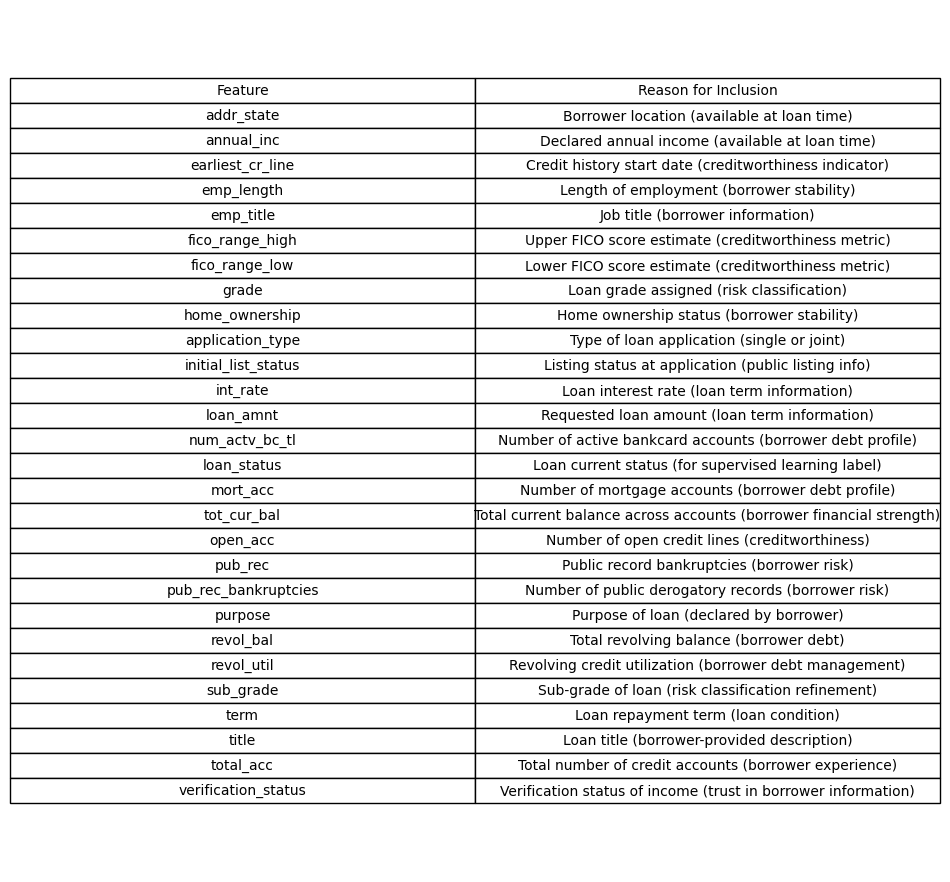

In [ ]:
import pandas as pd

# Define included features and reasons
included_features = [
    'addr_state', 'annual_inc', 'earliest_cr_line', 'emp_length', 'emp_title',
    'fico_range_high', 'fico_range_low', 'grade', 'home_ownership', 'application_type',
    'initial_list_status', 'int_rate', 'loan_amnt', 'num_actv_bc_tl', 'loan_status',
    'mort_acc', 'tot_cur_bal', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies',
    'purpose', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'title',
    'total_acc', 'verification_status'
]

reasons_included = [
    'Borrower location (available at loan time)',
    'Declared annual income (available at loan time)',
    'Credit history start date (creditworthiness indicator)',
    'Length of employment (borrower stability)',
    'Job title (borrower information)',
    'Upper FICO score estimate (creditworthiness metric)',
    'Lower FICO score estimate (creditworthiness metric)',
    'Loan grade assigned (risk classification)',
    'Home ownership status (borrower stability)',
    'Type of loan application (single or joint)',
    'Listing status at application (public listing info)',
    'Loan interest rate (loan term information)',
    'Requested loan amount (loan term information)',
    'Number of active bankcard accounts (borrower debt profile)',
    'Loan current status (for supervised learning label)',
    'Number of mortgage accounts (borrower debt profile)',
    'Total current balance across accounts (borrower financial strength)',
    'Number of open credit lines (creditworthiness)',
    'Public record bankruptcies (borrower risk)',
    'Number of public derogatory records (borrower risk)',
    'Purpose of loan (declared by borrower)',
    'Total revolving balance (borrower debt)',
    'Revolving credit utilization (borrower debt management)',
    'Sub-grade of loan (risk classification refinement)',
    'Loan repayment term (loan condition)',
    'Loan title (borrower-provided description)',
    'Total number of credit accounts (borrower experience)',
    'Verification status of income (trust in borrower information)'
]

# Create the DataFrame
feature_inclusion_df = pd.DataFrame({
    'Feature': included_features,
    'Reason for Inclusion': reasons_included
})

# Save CSV
feature_inclusion_df.to_csv('/content/drive/MyDrive/Lending_Club_Data_Analysis/Data_Analysis/feature_inclusion_table.csv', index=False)


# Plot the table
fig, ax = plt.subplots(figsize=(12, len(feature_inclusion_df) * 0.4))  # Adjust height dynamically
ax.axis('off')

# Create a table from the DataFrame
table = ax.table(
    cellText=feature_inclusion_df.values,
    colLabels=feature_inclusion_df.columns,
    cellLoc='center',
    loc='center'
)

# Style table a bit
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

# Save figure
plt.savefig('/content/drive/MyDrive/Lending_Club_Data_Analysis/Data_Analysis/feature_inclusion_table.png', bbox_inches='tight', dpi=300)

# Show plot
plt.show()


## Include only the final features in the data set

27 features & loan_status as output

In [ ]:
data = data[included_features]
print(data.describe())
print(data.shape)

         annual_inc  fico_range_high  fico_range_low      int_rate  \
count  1.345310e+06     1.345310e+06    1.345310e+06  1.345310e+06   
mean   7.624764e+04     7.001852e+02    6.961850e+02  1.323962e+01   
std    6.992510e+04     3.185316e+01    3.185251e+01  4.768716e+00   
min    0.000000e+00     6.290000e+02    6.250000e+02  5.310000e+00   
25%    4.578000e+04     6.740000e+02    6.700000e+02  9.750000e+00   
50%    6.500000e+04     6.940000e+02    6.900000e+02  1.274000e+01   
75%    9.000000e+04     7.140000e+02    7.100000e+02  1.599000e+01   
max    1.099920e+07     8.500000e+02    8.450000e+02  3.099000e+01   

          loan_amnt  num_actv_bc_tl      mort_acc   tot_cur_bal      open_acc  \
count  1.345310e+06    1.277783e+06  1.298029e+06  1.277783e+06  1.345310e+06   
mean   1.441997e+04    3.642732e+00  1.670783e+00  1.411338e+05  1.159352e+01   
std    8.717051e+03    2.248239e+00  2.000444e+00  1.575478e+05  5.473789e+00   
min    5.000000e+02    0.000000e+00  0.000000

## Inspect & preprocess the features

# Data Preprocessing Strategy

- **Numerical features**:  
  ➔ Impute missing values with median (robust against outliers)

- **Categorical features**:  
  ➔ Label Encode simple categories (like 'home_ownership', 'purpose', etc.)  
  ➔ Engineer features from date fields (like 'earliest_cr_line')

- **Target variable**:  
  ➔ use `loan_status` as target (binary: good/bad loans)

- **Special attention**:  
  ➔ Some fields like `emp_title` are messy text — drop


In [ ]:
#Columns with missing values and % of missing values.
data_missing = ((data.isnull().sum()/len(data))*100)[((data.isnull().sum()/len(data))*100) > 0]
print(data_missing)

def if_null_values(feat_name):
    if feat_name in data_missing:
        return(f"% of missing values = {data_missing[feat_name].round(2)}")
    else:
        return("No missing values")

emp_length              5.835904
emp_title               6.376597
num_actv_bc_tl          5.019438
mort_acc                3.514506
tot_cur_bal             5.019438
pub_rec_bankruptcies    0.051810
revol_util              0.063703
title                   1.238376
dtype: float64


## addr_state

In [ ]:
if_null_values('addr_state')

data['addr_state'].value_counts()

addr_state
CA    196528
TX    110169
NY    109842
FL     95606
IL     51720
NJ     48449
PA     45522
OH     43842
GA     43376
VA     38040
NC     37784
MI     35234
AZ     32695
MD     31227
MA     30977
CO     29671
WA     29188
MN     23968
IN     21716
MO     21260
TN     20385
NV     20267
CT     19728
WI     17732
AL     16613
OR     16406
SC     15992
LA     15499
KY     12839
OK     12281
KS     11240
AR     10047
UT     10036
NM      7362
HI      6757
MS      6588
NH      6449
RI      5871
WV      4878
MT      3823
DE      3783
NE      3586
DC      3475
AK      3190
WY      2922
SD      2767
VT      2652
ME      2030
ID      1689
ND      1602
IA         7
Name: count, dtype: int64

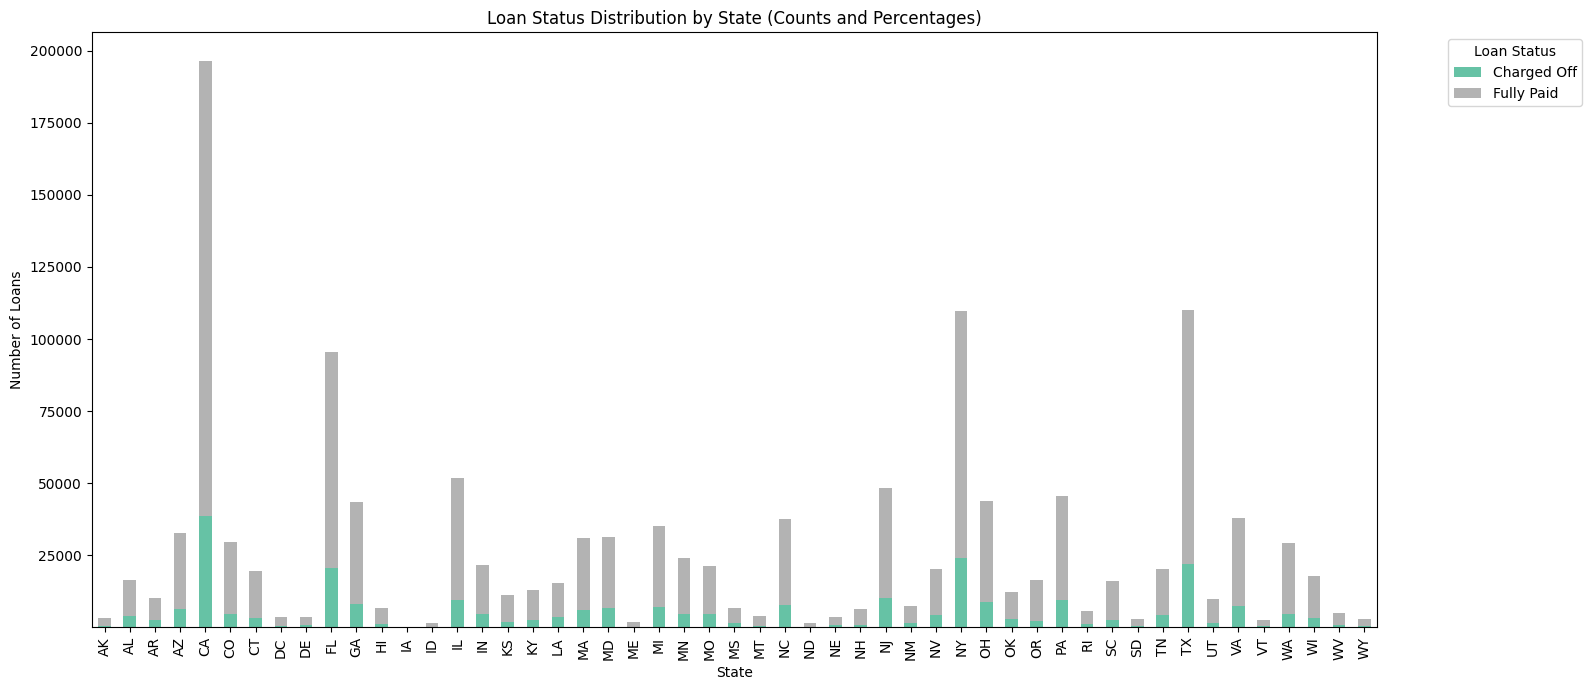

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Group and calculate counts
grouped = data.groupby(['addr_state', 'loan_status']).size().reset_index(name='count')

# Step 2: Pivot to get loan_status columns per state
pivot_df = grouped.pivot(index='addr_state', columns='loan_status', values='count').fillna(0)

# Step 3: Calculate percentages for labeling
percentages = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Step 4: Plot stacked bar chart
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(16, 7), colormap='Set2')

# Step 5: Add percentage labels
for i, state in enumerate(pivot_df.index):
    y_offset = 0
    for loan_status in pivot_df.columns:
        count = pivot_df.loc[state, loan_status]
        pct = percentages.loc[state, loan_status]
        if count > 0:

            y_offset += count

plt.title('Loan Status Distribution by State (Counts and Percentages)')
plt.xlabel('State')
plt.ylabel('Number of Loans')
plt.xticks(rotation=90)
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Lending_Club_Data_Analysis/Data_Analysis/Loan_Status_Distribution_addr_state.png')
plt.show()


### Create dummies for each state

In [ ]:
add_state_dummies = pd.get_dummies(data['addr_state'], drop_first=True) # drop_first will drop the first dummy column
add_state_dummies
data = pd.concat([data.drop('addr_state', axis=1), add_state_dummies], axis=1)

#annual_inc

Check distribution and adjust if neccesary

No missing values


<Figure size 1200x500 with 0 Axes>

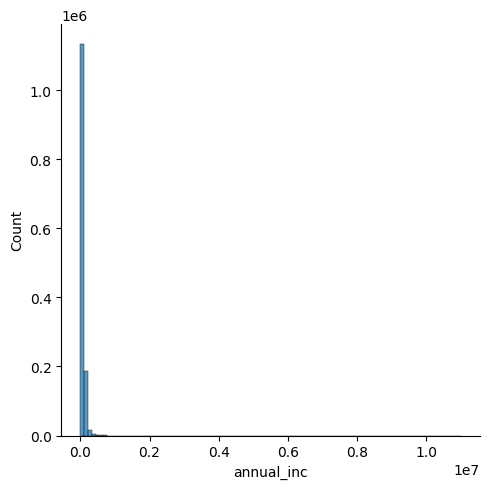

In [ ]:
print(if_null_values('annual_inc'))
plt.figure(figsize=(12,5))
sns.displot(x=data['annual_inc'], bins=100)

The salary distribution is highly skewed towards right.
Check where the cutoff of top 1% would be.

In [ ]:
cutoff = data['annual_inc'].quantile(0.99)
print(f"The cutoff for the highest 1% of incomes is: {cutoff:.2f}")


The cutoff for the highest 1% of incomes is: 250000.00


Remove rows higher or same as cutoff value!

<Figure size 1200x500 with 0 Axes>

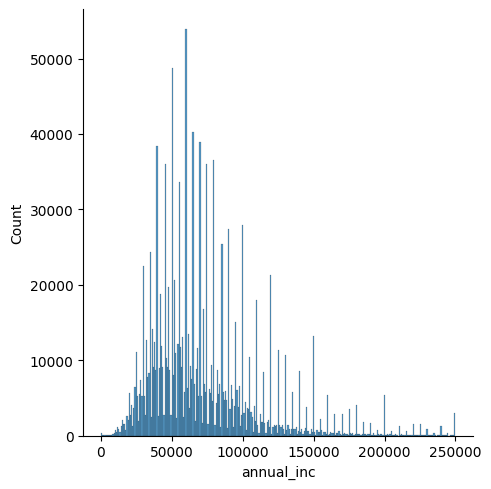

In [ ]:
data = data[data['annual_inc'] <= 250000]
plt.figure(figsize=(12,5))
sns.displot(x=data['annual_inc']);

<ipython-input-132-cf9dd15e6f2e>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(['income_range', 'loan_status']).size().reset_index(name='count')


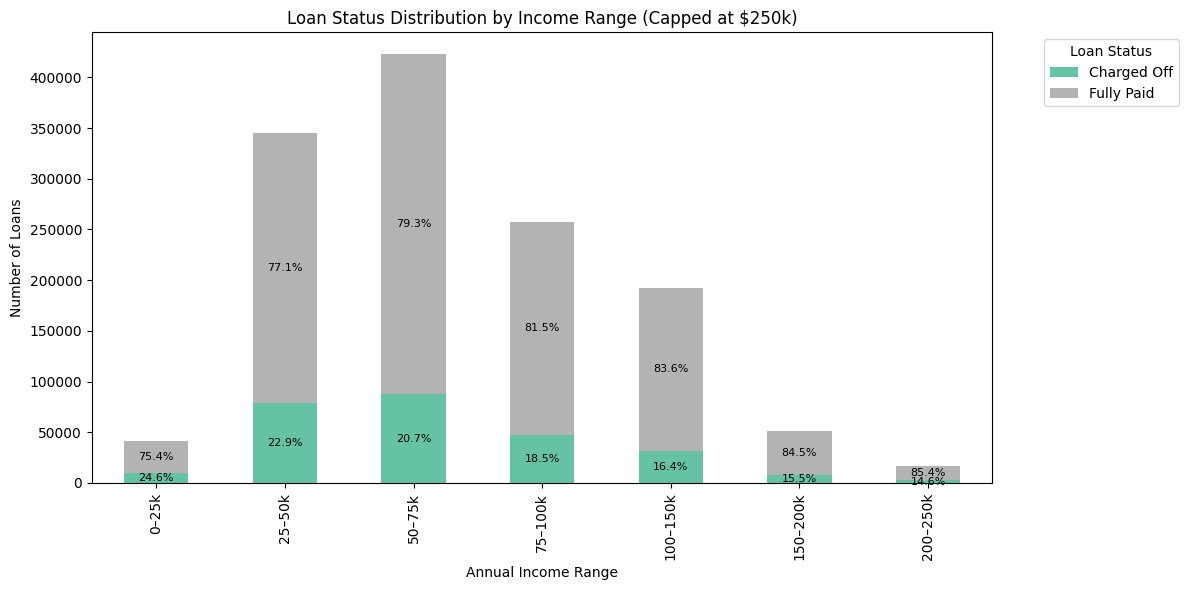

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Cap extreme incomes and define bins
data['income_capped'] = data['annual_inc'].clip(upper=250000)
bins = [0, 25000, 50000, 75000, 100000, 150000, 200000, 250000]
labels = ['0–25k', '25–50k', '50–75k', '75–100k', '100–150k', '150–200k', '200–250k']
data['income_range'] = pd.cut(data['income_capped'], bins=bins, labels=labels, right=False)

# Step 2: Group by income range and loan_status
grouped = data.groupby(['income_range', 'loan_status']).size().reset_index(name='count')

# Step 3: Pivot for stacked bar chart
pivot_df = grouped.pivot(index='income_range', columns='loan_status', values='count').fillna(0)
percentages = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Step 4: Plot
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')

# Step 5: Add percentage labels
for i, income_bin in enumerate(pivot_df.index):
    y_offset = 0
    for loan_status in pivot_df.columns:
        count = pivot_df.loc[income_bin, loan_status]
        pct = percentages.loc[income_bin, loan_status]
        if count > 0:
            ax.text(i, y_offset + count / 2, f"{pct:.1f}%", ha='center', va='center', fontsize=8)
            y_offset += count

plt.title('Loan Status Distribution by Income Range (Capped at $250k)')
plt.xlabel('Annual Income Range')
plt.ylabel('Number of Loans')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Lending_Club_Data_Analysis/Data_Analysis/Loan_Status_Distribution_annual_inc.png')
plt.show()


## earliest_cr_line
Only use the year and remove the month. Check the distribution of values.

0    2003
1    1999
2    2000
4    1998
5    1987
Name: earliest_cr_line, dtype: int64


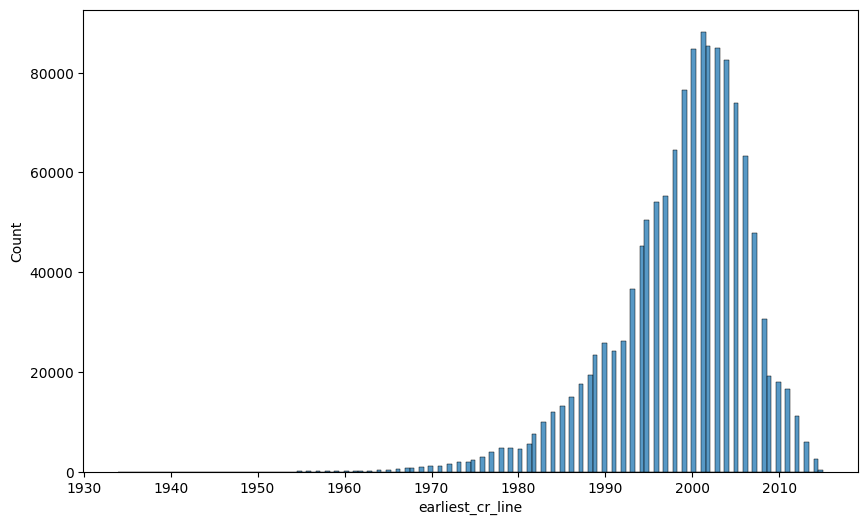

count         mean       std     min     25%     50%     75%  \
loan_status                                                                     
Charged Off   266811.0  1999.386109  7.571525  1944.0  1996.0  2001.0  2004.0   
Fully Paid   1065052.0  1998.572051  7.589442  1934.0  1995.0  2000.0  2004.0   

                max  
loan_status          
Charged Off  2015.0  
Fully Paid   2015.0

In [ ]:
if_null_values('earliest_cr_line')
data['earliest_cr_line'] = data['earliest_cr_line'].apply(lambda date: int(date[-4:]))

print(data['earliest_cr_line'].head())

plt.figure(figsize=(10,6))
sns.histplot(data['earliest_cr_line'].dropna(), bins=150, kde=False)
plt.show()

data.groupby('loan_status')['earliest_cr_line'].describe()

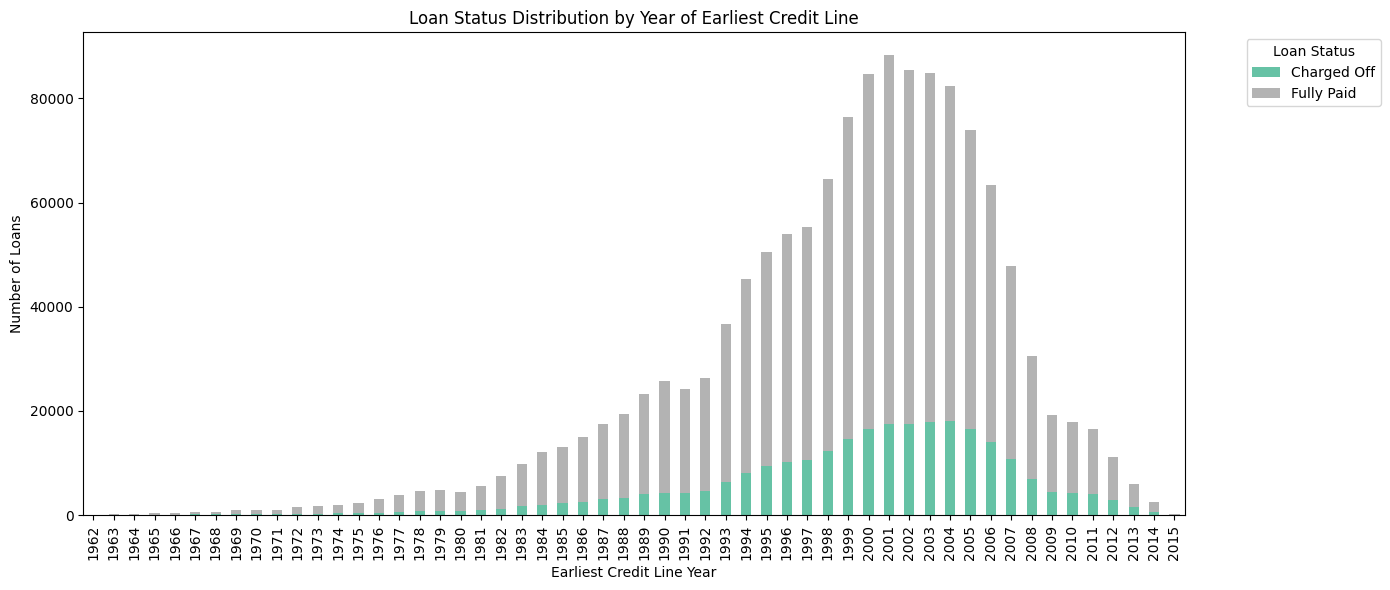

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Group and count by year and loan_status
grouped = data.groupby(['earliest_cr_line', 'loan_status']).size().reset_index(name='count')

# Step 2: Pivot for stacked bar chart
pivot_df = grouped.pivot(index='earliest_cr_line', columns='loan_status', values='count').fillna(0)

# Optional: Filter years with very few loans to reduce noise
pivot_df = pivot_df[pivot_df.sum(axis=1) > 100]

# Step 3: Calculate percentages
percentages = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Step 4: Plot
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='Set2')

plt.title('Loan Status Distribution by Year of Earliest Credit Line')
plt.xlabel('Earliest Credit Line Year')
plt.ylabel('Number of Loans')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Lending_Club_Data_Analysis/Data_Analysis/Loan_Status_Distribution_earliest_cr_line.png')
plt.show()


## emp_length



In [ ]:
print(if_null_values('emp_length'))
data['emp_length'].describe()

% of missing values = 5.84


count       1253470
unique           11
top       10+ years
freq         437006
Name: emp_length, dtype: object

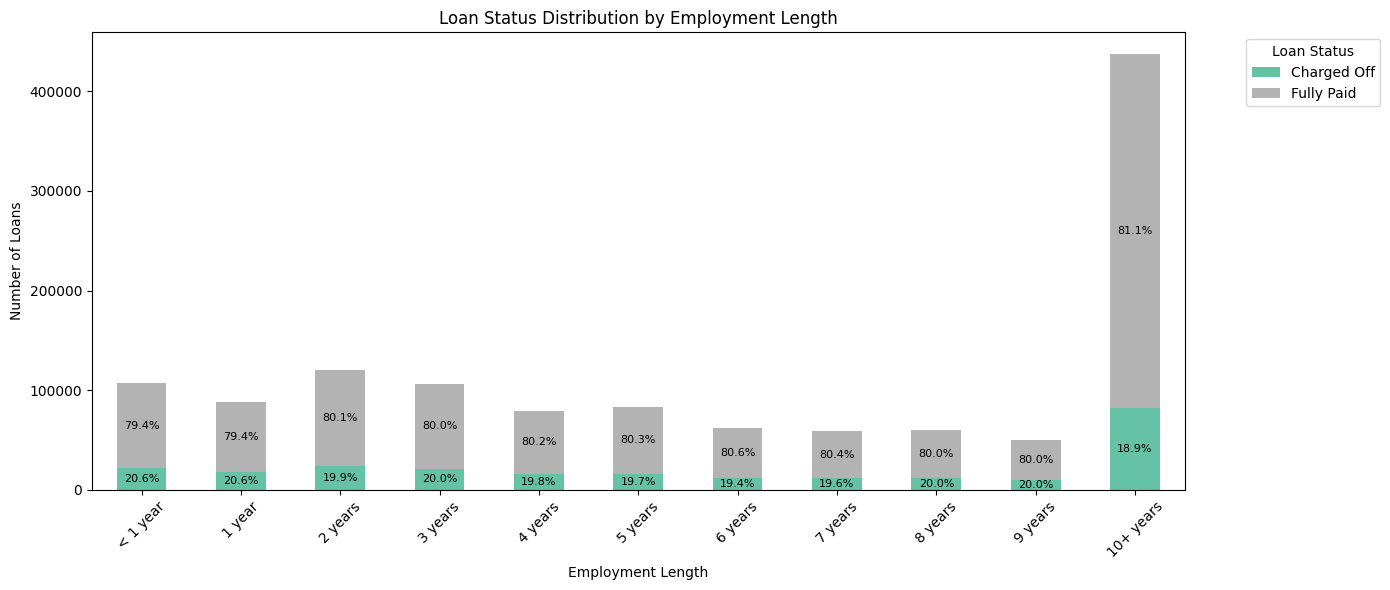

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the desired order of employment lengths
emp_order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years',
             '6 years', '7 years', '8 years', '9 years', '10+ years']

# Filter only valid categories
data = data[data['emp_length'].isin(emp_order)]

# Step 1: Group and count
grouped = data.groupby(['emp_length', 'loan_status']).size().reset_index(name='count')

# Step 2: Pivot for stacked bar chart
pivot_df = grouped.pivot(index='emp_length', columns='loan_status', values='count').fillna(0)

# Step 3: Enforce category order
pivot_df = pivot_df.loc[emp_order]

# Step 4: Filter low-count bins if desired (optional)
pivot_df = pivot_df[pivot_df.sum(axis=1) > 100]

# Step 5: Calculate percentages per row
percentages = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Step 6: Plot stacked bar chart
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='Set2')

# Step 7: Add percentage labels
for i, emp in enumerate(pivot_df.index):
    y_offset = 0
    for status in pivot_df.columns:
        count = pivot_df.loc[emp, status]
        pct = percentages.loc[emp, status]
        if count > 0:
            ax.text(i, y_offset + count / 2, f"{pct:.1f}%", ha='center', va='center', fontsize=8)
            y_offset += count

# Final formatting
plt.title('Loan Status Distribution by Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Number of Loans')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Lending_Club_Data_Analysis/Data_Analysis/Loan_Status_Distribution_emp_length.png')
plt.show()


The loan status distribution is nearly uniform across all employment lengths, showing little variation. This suggests emp_length has low predictive value and can be dropped to simplify the model.

In [ ]:
data = data.drop('emp_length', axis=1)

## emp_title

In [ ]:
print(if_null_values('emp_title'))
print(data['emp_title'].describe())

% of missing values = 6.38
count     1245829
unique     375415
top       Teacher
freq        21253
Name: emp_title, dtype: object


## Decision on `emp_title`

- **% missing values**: 6.42% → manageable, but still non-trivial.
- **High cardinality**: 375,574 unique titles for ~1.2M entries (about 1 in 3 unique) → extremely high.
- **Data quality**: Titles are free-text, inconsistent, and noisy (e.g., "teacher", "Teacher", "TEACHER", "high school teacher").
- **Encoding difficulty**: Encoding would either:
  - Lose granularity (group too much), or
  - Introduce heavy complexity (text processing).
- **Model risk**: High risk of overfitting due to rare titles.
- **Practical benefit**: Little added value beyond variables like income, employment length, etc.

**Decision: Drop `emp_title` from modeling.**


In [ ]:
data = data.drop('emp_title', axis=1)

## fico_range_high and fico_range_low

## Understanding `fico_range_low` and `fico_range_high`

- `fico_range_low` represents the **lowest** reported FICO credit score for a customer at the time of loan application.
- `fico_range_high` represents the **highest** reported FICO credit score.
- Often, the exact FICO score isn't given — instead, a small range (like 660-664) is reported.
- To simplify, we calculate the **average FICO score**

- This provides a single, clean numeric feature `fico_score` that can be used for modeling.
- Below is the distribution of FICO scores across all customers.


No missing values
count    1.253470e+06
mean     6.979991e+02
std      3.159051e+01
min      6.270000e+02
25%      6.720000e+02
50%      6.920000e+02
75%      7.120000e+02
max      8.475000e+02
Name: fico_score, dtype: float64


<ipython-input-140-f414cf847c60>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = fico_data.groupby(['fico_bin', 'loan_status']).size().reset_index(name='count')


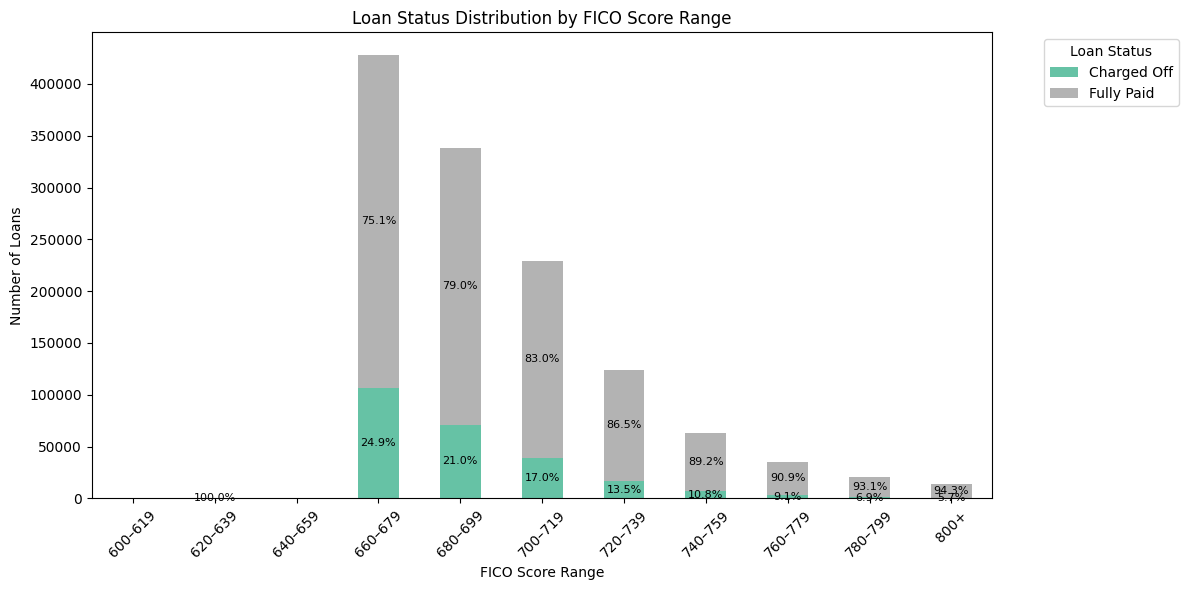

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate average FICO score
data['fico_score'] = (data['fico_range_low'] + data['fico_range_high']) / 2

print(if_null_values('fico_score'))
print(data['fico_score'].describe())

# Drop rows with missing values
fico_data = data.dropna(subset=['fico_score', 'loan_status'])

# Define FICO bins and labels
bins = [600, 620, 640, 660, 680, 700, 720, 740, 760, 780, 800, 850]
labels = ['600–619', '620–639', '640–659', '660–679', '680–699', '700–719',
          '720–739', '740–759', '760–779', '780–799', '800+']
fico_data['fico_bin'] = pd.cut(fico_data['fico_score'], bins=bins, labels=labels, right=False)

# Group and pivot
grouped = fico_data.groupby(['fico_bin', 'loan_status']).size().reset_index(name='count')
pivot_df = grouped.pivot(index='fico_bin', columns='loan_status', values='count').fillna(0)
percentages = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Plot
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')

# Add percentage labels
for i, fico_range in enumerate(pivot_df.index):
    y_offset = 0
    for status in pivot_df.columns:
        count = pivot_df.loc[fico_range, status]
        pct = percentages.loc[fico_range, status]
        if count > 0:
            ax.text(i, y_offset + count / 2, f"{pct:.1f}%", ha='center', va='center', fontsize=8)
            y_offset += count

plt.title('Loan Status Distribution by FICO Score Range')
plt.xlabel('FICO Score Range')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45)
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Lending_Club_Data_Analysis/Data_Analysis/Loan_Status_Distribution_fico_score.png')
plt.show()


In [ ]:
data = data.drop(['fico_range_high', 'fico_range_low'], axis=1)

## grade and sub_grade

- `grade` is a **coarse** credit quality indicator (e.g., A, B, C, ..., G).
- `sub_grade` provides a **finer split** within each grade (e.g., A1, A2, ..., G5).
- Every `sub_grade` belongs to exactly one `grade`.
  - Example: `sub_grade = A1` → `grade = A`.
  
### Why drop `grade`?

- `grade` is **completely redundant** once we have `sub_grade`.
- Keeping both would introduce **multicollinearity** into the model.
- `sub_grade` captures **more detailed** credit risk information.

👉 **Decision**: **Drop `grade`** and only use `sub_grade`.

---

## Creating Dummy Variables for `sub_grade`

- Since `sub_grade` is a categorical feature, we need to **encode** it numerically.
- We use **one-hot encoding** (create dummy variables) for ea


grade
B    366172
C    355845
A    218461
D    186617
E     87599
F     30176
G      8600
Name: count, dtype: int64
sub_grade
C1    79621
B4    77822
B5    76875
B3    76390
C2    73928
C3    69936
C4    69423
B2    68917
B1    66168
C5    62937
A5    59907
A4    48510
D1    47617
D2    41692
A1    40193
D3    36380
A3    35296
A2    34555
D4    33113
D5    27815
E1    22136
E2    20036
E3    17195
E4    14743
E5    13489
F1     9348
F2     6798
F3     5722
F4     4590
F5     3718
G1     2812
G2     2014
G3     1514
G4     1214
G5     1046
Name: count, dtype: int64
No missing values
count     1253470
unique          7
top             B
freq       366172
Name: grade, dtype: object
No missing values
count     1253470
unique         35
top            C1
freq        79621
Name: sub_grade, dtype: object


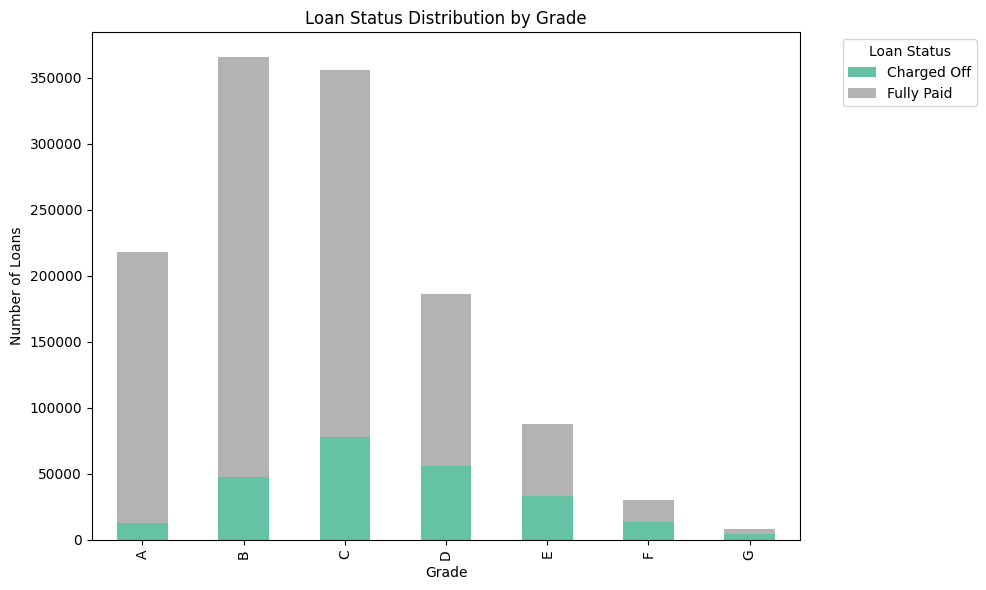

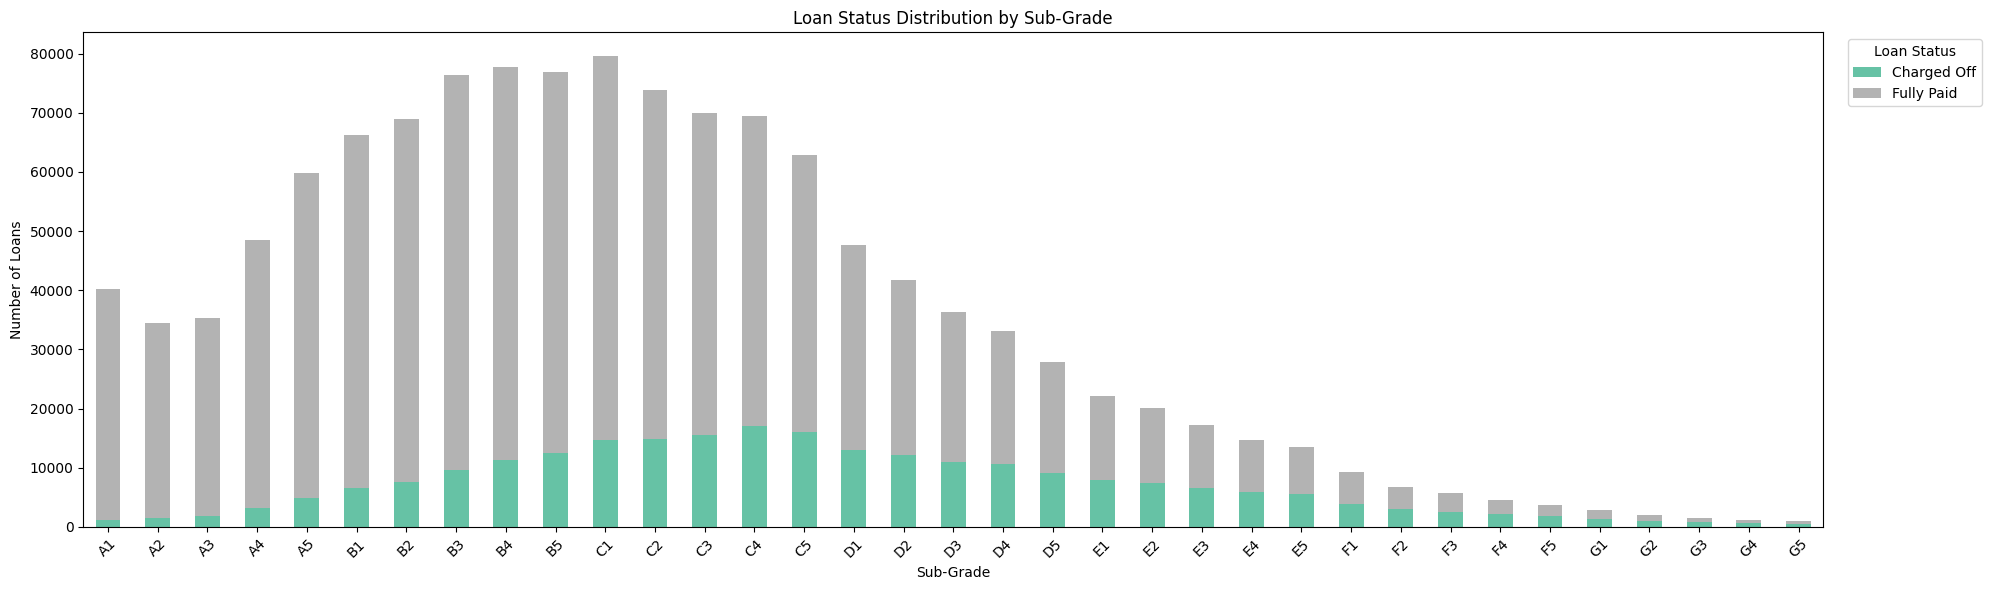

In [ ]:
# Explore 'grade' and 'sub_grade'
print(data['grade'].value_counts())
print(data['sub_grade'].value_counts())
print(if_null_values('grade'))
print(data['grade'].describe())
print(if_null_values('sub_grade'))
print(data['sub_grade'].describe())


# Group and pivot
grade_grouped = data.groupby(['grade', 'loan_status']).size().reset_index(name='count')
grade_pivot = grade_grouped.pivot(index='grade', columns='loan_status', values='count').fillna(0)
grade_pivot = grade_pivot.loc[sorted(grade_pivot.index)]  # enforce order
grade_percentages = grade_pivot.div(grade_pivot.sum(axis=1), axis=0) * 100

# Plot
ax = grade_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')


plt.title('Loan Status Distribution by Grade')
plt.xlabel('Grade')
plt.ylabel('Number of Loans')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# --- SUB-GRADE: Stacked Bar Chart with Percentages ---

# Group and pivot
subgrade_grouped = data.groupby(['sub_grade', 'loan_status']).size().reset_index(name='count')
subgrade_pivot = subgrade_grouped.pivot(index='sub_grade', columns='loan_status', values='count').fillna(0)
subgrade_pivot = subgrade_pivot.loc[sorted(subgrade_pivot.index)]  # enforce order
subgrade_percentages = subgrade_pivot.div(subgrade_pivot.sum(axis=1), axis=0) * 100

# Plot
ax = subgrade_pivot.plot(kind='bar', stacked=True, figsize=(20, 6), colormap='Set2')


plt.title('Loan Status Distribution by Sub-Grade')
plt.xlabel('Sub-Grade')
plt.ylabel('Number of Loans')
plt.legend(title='Loan Status', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Lending_Club_Data_Analysis/Data_Analysis/Loan_Status_Distribution_grade.png')
plt.show()

In [ ]:
# Drop 'grade' because it's redundant (included in 'sub_grade')
data = data.drop(columns=['grade'])

# Create dummy variables for 'sub_grade'
sub_grade_dummies = pd.get_dummies(data['sub_grade'], prefix='sub_grade', drop_first=True)

# Add the dummy variables to the dataset
data = pd.concat([data, sub_grade_dummies], axis=1)

# Drop the original 'sub_grade' column
data = data.drop(columns=['sub_grade'])

In [ ]:
data.shape
data.columns

Index(['annual_inc', 'earliest_cr_line', 'home_ownership', 'application_type',
       'initial_list_status', 'int_rate', 'loan_amnt', 'num_actv_bc_tl',
       'loan_status', 'mort_acc',
       ...
       'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4',
       'sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3',
       'sub_grade_G4', 'sub_grade_G5'],
      dtype='object', length=108)

## home_ownership


- Major categories:
  - `MORTGAGE`: 656,519 entries
  - `RENT`: 531,602 entries
  - `OWN`: 143,266 entries
- Rare categories:
  - `ANY`, `OTHER`, `NONE` (combined < 500 entries)

---

## Preprocessing Steps

1. **Group rare categories**:
   - Merge `ANY` and `NONE` into `OTHER` to avoid too many sparse categories.
2. **Create dummy variables**:
   - Apply **one-hot encoding** to convert `home_ownership` into numeric format.
   - Use `drop_first=True` to avoid multicollinearity.
3. **Drop the original `home_ownership` column** after encoding.



No missing values
home_ownership
MORTGAGE    620301
RENT        505065
OWN         127652
ANY            266
OTHER          140
NONE            46
Name: count, dtype: int64


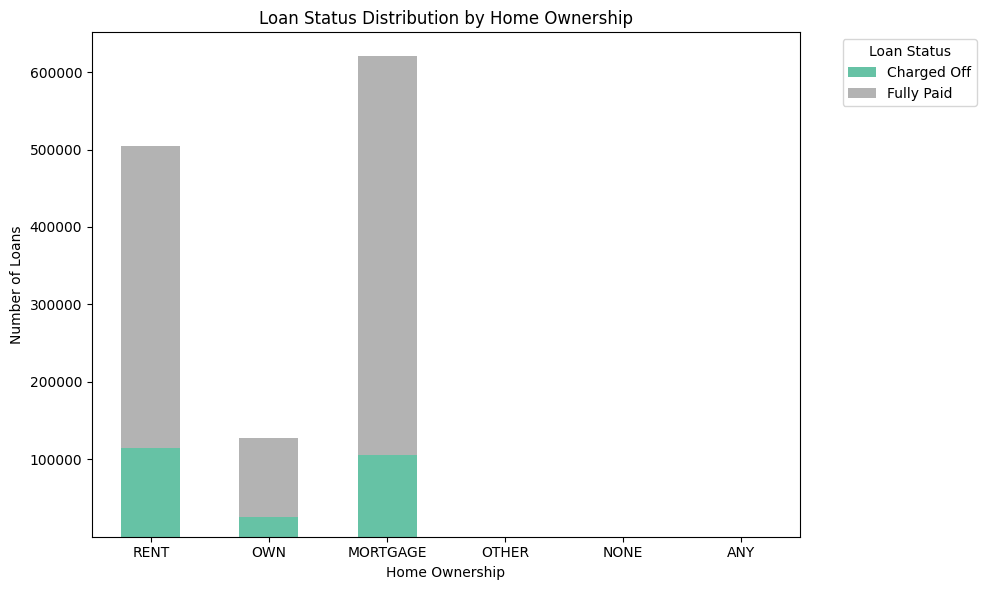

home_ownership
MORTGAGE    620301
RENT        505065
OWN         127652
OTHER          452
Name: count, dtype: int64


In [ ]:
print(if_null_values('home_ownership'))
print(data['home_ownership'].value_counts())


# Step 1: Group and pivot
home_grouped = data.groupby(['home_ownership', 'loan_status']).size().reset_index(name='count')
home_pivot = home_grouped.pivot(index='home_ownership', columns='loan_status', values='count').fillna(0)

# Optional: Enforce common order
home_order = ['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY']
home_pivot = home_pivot.loc[[ho for ho in home_order if ho in home_pivot.index]]

# Step 2: Plot
ax = home_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')

plt.title('Loan Status Distribution by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Number of Loans')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Lending_Club_Data_Analysis/Data_Analysis/Loan_Status_Distribution_home_ownership.png')
plt.show()


# Preprocessing

# Option 1: Group rare categories ("ANY", "OTHER", "NONE") into "OTHER"
data['home_ownership'] = data['home_ownership'].replace({'ANY': 'OTHER', 'NONE': 'OTHER'})

# Double-check after replacement
print(data['home_ownership'].value_counts())



In [ ]:
# Create dummy variables
home_ownership_dummies = pd.get_dummies(data['home_ownership'], prefix='home', drop_first=True)

# Add dummies back to data
data = pd.concat([data, home_ownership_dummies], axis=1)

# Drop original column
data = data.drop(columns=['home_ownership'])

In [ ]:
data.shape

(1253470, 110)

## application_type

application_type
Individual    1231493
Joint App       21977
Name: count, dtype: int64


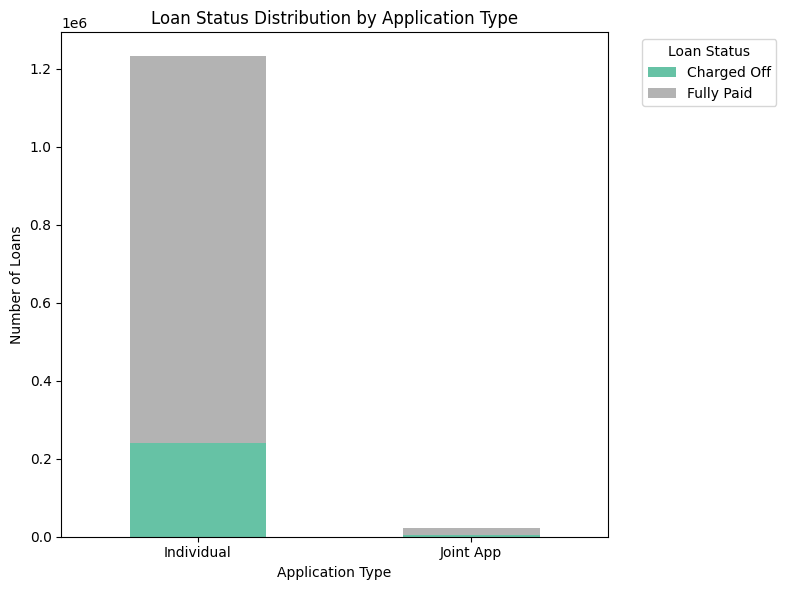

In [ ]:
# Explore application_type
print(data['application_type'].value_counts())


# Step 1: Group and pivot
app_grouped = data.groupby(['application_type', 'loan_status']).size().reset_index(name='count')
app_pivot = app_grouped.pivot(index='application_type', columns='loan_status', values='count').fillna(0)

# Step 2: Optional sort for consistent order
app_pivot = app_pivot.loc[sorted(app_pivot.index)]

# Step 3: Plot
ax = app_pivot.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='Set2')

plt.title('Loan Status Distribution by Application Type')
plt.xlabel('Application Type')
plt.ylabel('Number of Loans')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Lending_Club_Data_Analysis/Data_Analysis/Loan_Status_Distribution_application_type.png')
plt.show()





In [ ]:
# Preprocessing

# Create dummy variables
application_type_dummies = pd.get_dummies(data['application_type'], prefix='app', drop_first=True)

# Add dummies back to data
data = pd.concat([data, application_type_dummies], axis=1)

# Drop original column
data = data.drop(columns=['application_type'])

data.shape


(1253470, 110)

## initial_list_status


### Summary of Counts:
- **Fractional (`f`)**:
  - Charged Off: 109,464
  - Fully Paid: 447,115
- **Whole (`w`)**:
  - Charged Off: 157,347
  - Fully Paid: 617,937

---

### Charged Off Percentages:
- Fractional (`f`): **19.66%**
- Whole (`w`): **20.29%**

---

### Interpretation:
- The difference in default rate is only **0.63 percentage points**.
- This is **very small** and not practically meaningful for prediction.
- `initial_list_status` mainly reflects the platform's funding method (fractional vs whole) and **does not influence borrower behavior**.

**Decision**: Drop `initial_list_status` to simplify the dataset and avoid unnecessary noise.


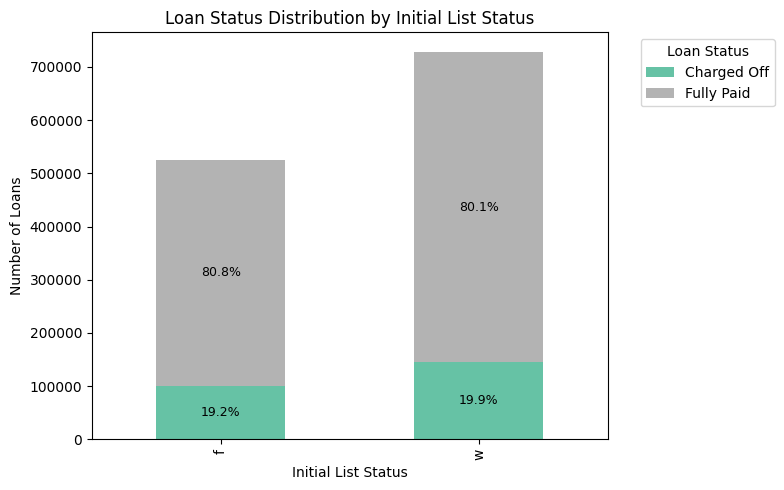

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Group and pivot
grouped = data.groupby(['initial_list_status', 'loan_status']).size().reset_index(name='count')
pivot_df = grouped.pivot(index='initial_list_status', columns='loan_status', values='count').fillna(0)

# Step 2: Calculate percentages for labels
percentages = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Step 3: Plot
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Set2')

# Step 4: Add percentage labels on each segment
for i, category in enumerate(pivot_df.index):
    y_offset = 0
    for status in pivot_df.columns:
        count = pivot_df.loc[category, status]
        pct = percentages.loc[category, status]
        if count > 0:
            ax.text(i, y_offset + count / 2, f"{pct:.1f}%", ha='center', va='center', fontsize=9)
            y_offset += count

# Final styling
plt.title('Loan Status Distribution by Initial List Status')
plt.xlabel('Initial List Status')
plt.ylabel('Number of Loans')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Lending_Club_Data_Analysis/Data_Analysis/Loan_Status_Distribution_initial_list_status.png')
plt.show()


In [ ]:
data = data.drop('initial_list_status', axis=1)

## int_rate

- **No missing values** in the `int_rate` column.
- Overall interest rates range from **5.31% to 30.99%**.
- The **average interest rate** across all loans is **13.25%**.

---

## Interest Rate by Loan Status

| Loan Status | Mean Interest Rate | Observation |
|:---|:---|:---|
| Charged Off | 15.72% | Higher average interest rate |
| Fully Paid  | 12.64% | Lower average interest rate |

- **Charged Off loans** tend to have **higher interest rates** than **Fully Paid loans**.
- This suggests that **higher interest rates are associated with higher credit risk**.


In [ ]:
print(if_null_values('int_rate'))
print(data['int_rate'].describe())
print(data.groupby('loan_status')['int_rate'].describe())

No missing values
count    1.253470e+06
mean     1.324808e+01
std      4.766824e+00
min      5.310000e+00
25%      9.750000e+00
50%      1.274000e+01
75%      1.599000e+01
max      3.099000e+01
Name: int_rate, dtype: float64
                 count       mean       std   min    25%    50%    75%    max
loan_status                                                                  
Charged Off   245709.0  15.763134  4.907021  5.31  12.39  15.05  18.55  30.99
Fully Paid   1007761.0  12.634869  4.524784  5.31   9.17  12.29  15.31  30.99


## loan_amnt

- **No missing values** in the `loan_amnt` column.
- Loan amounts range from **$500 to $40,000**.
- The **average loan amount** across all loans is **$14,305**.

---

## Loan Amount by Loan Status

| Loan Status | Mean Loan Amount | Observation |
|:---|:---|:---|
| Charged Off | $15,491 | Higher average loan amount |
| Fully Paid  | $14,008 | Lower average loan amount |

- **Charged Off loans** tend to have **higher average loan amounts** than Fully Paid loans.
- This suggests that **higher loan amounts may be associated with a slightly higher credit risk**.


No missing values
count    1.253470e+06
mean     1.448207e+04
std      8.658969e+03
min      5.000000e+02
25%      8.000000e+03
50%      1.200000e+04
75%      2.000000e+04
max      4.000000e+04
Name: loan_amnt, dtype: float64
                 count          mean          std    min     25%      50%  \
loan_status                                                                 
Charged Off   245709.0  15797.090562  8779.810942  900.0  9500.0  14775.0   
Fully Paid   1007761.0  14161.447382  8598.813889  500.0  7500.0  12000.0   

                 75%      max  
loan_status                    
Charged Off  21000.0  40000.0  
Fully Paid   20000.0  40000.0  


<ipython-input-158-d43c1c96d839>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(['loan_amnt_bin', 'loan_status']).size().reset_index(name='count')


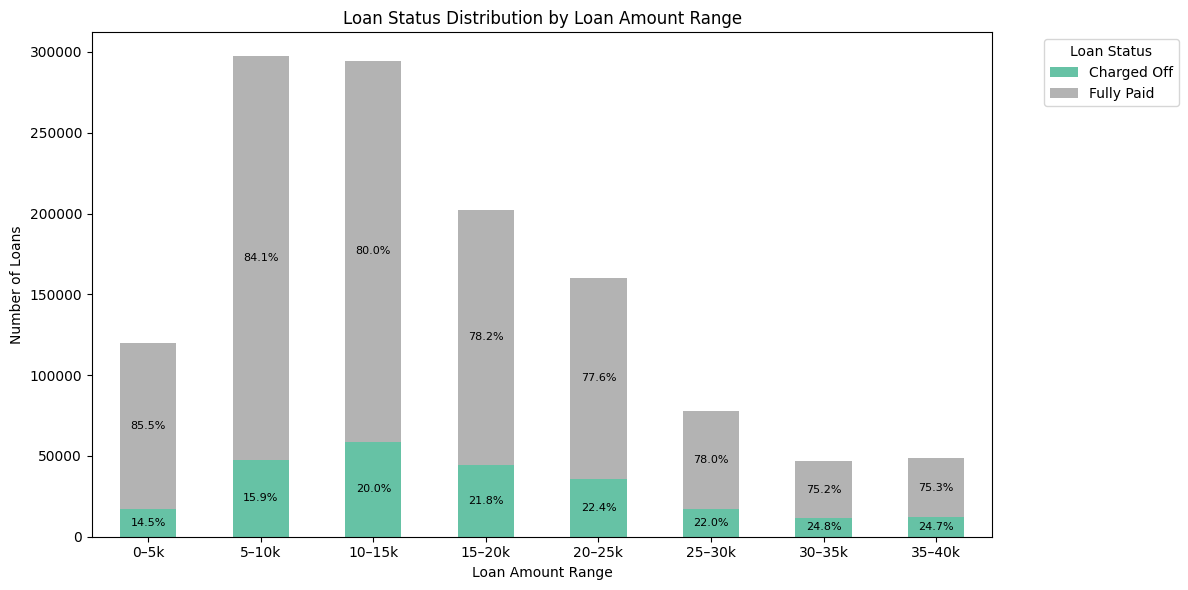

In [ ]:
print(if_null_values('loan_amnt'))
print(data['loan_amnt'].describe())
print(data.groupby('loan_status')['loan_amnt'].describe())

import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Define bins and labels for loan amount
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000]
labels = ['0–5k', '5–10k', '10–15k', '15–20k', '20–25k', '25–30k', '30–35k', '35–40k']
data['loan_amnt_bin'] = pd.cut(data['loan_amnt'], bins=bins, labels=labels, right=False)

# Step 2: Group and pivot
grouped = data.groupby(['loan_amnt_bin', 'loan_status']).size().reset_index(name='count')
pivot_df = grouped.pivot(index='loan_amnt_bin', columns='loan_status', values='count').fillna(0)

# Step 3: Calculate percentages
percentages = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Step 4: Plot stacked column chart
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')

# Step 5: Add percentage labels
for i, loan_range in enumerate(pivot_df.index):
    y_offset = 0
    for status in pivot_df.columns:
        count = pivot_df.loc[loan_range, status]
        pct = percentages.loc[loan_range, status]
        if count > 0:
            ax.text(i, y_offset + count / 2, f"{pct:.1f}%", ha='center', va='center', fontsize=8)
            y_offset += count

plt.title('Loan Status Distribution by Loan Amount Range')
plt.xlabel('Loan Amount Range')
plt.ylabel('Number of Loans')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Lending_Club_Data_Analysis/Data_Analysis/Loan_Status_Distribution_loan_amnt.png')
plt.show()


## num_actv_bc_tl (Number of Active Bankcard Accounts)

- **Missing values**: 5.04%
- **Average active accounts**:
  - Charged Off: 3.82
  - Fully Paid: 3.59
- Distribution is slightly higher for Charged Off loans, but overall difference is small.

---

## Preprocessing Decision:

- Impute missing values with the **median** to avoid skewing the distribution.
- Keep `num_actv_bc_tl` as a feature, as it might add useful information about borrower behavior.


% of missing values = 5.02
count    1.188427e+06
mean     3.644834e+00
std      2.239632e+00
min      0.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      5.000000e+00
max      3.500000e+01
Name: num_actv_bc_tl, dtype: float64
                count      mean       std  min  25%  50%  75%   max
loan_status                                                        
Charged Off  235872.0  3.844216  2.364547  0.0  2.0  3.0  5.0  30.0
Fully Paid   952555.0  3.595463  2.204827  0.0  2.0  3.0  5.0  35.0
Missing values in num_actv_bc_tl: 65043
                 count      mean       std  min  25%  50%  75%   max
loan_status                                                         
Charged Off   245709.0  3.810418  2.322635  0.0  2.0  3.0  5.0  30.0
Fully Paid   1007761.0  3.562843  2.147863  0.0  2.0  3.0  5.0  35.0


<ipython-input-159-a61beb61dbcc>:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(['actv_bc_bin', 'loan_status']).size().reset_index(name='count')


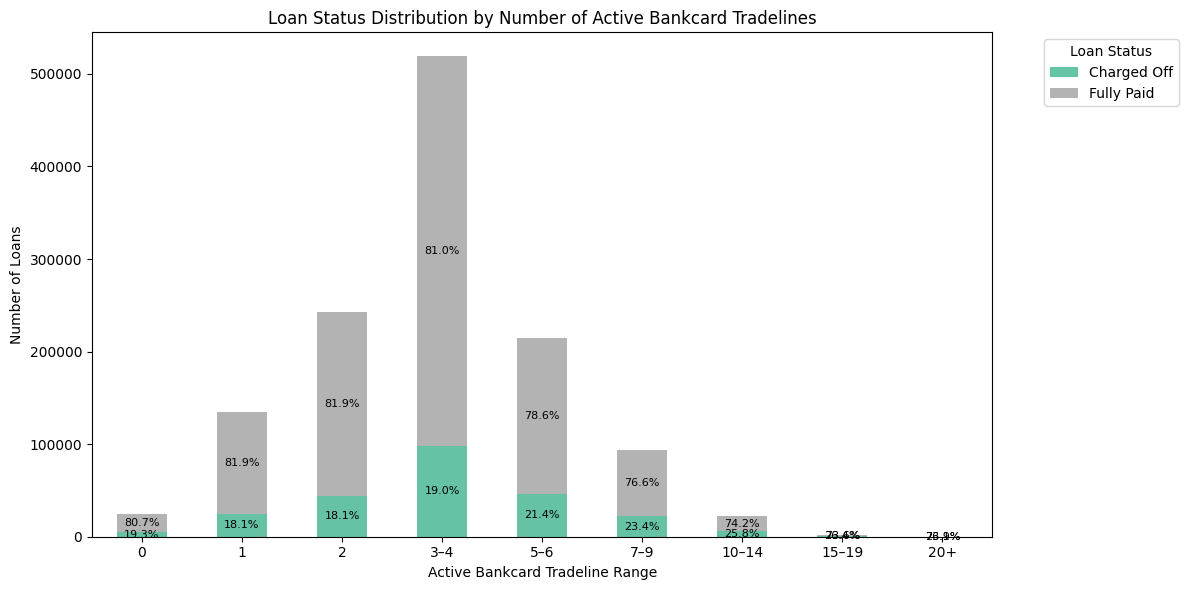

In [ ]:
print(if_null_values('num_actv_bc_tl'))
print(data['num_actv_bc_tl'].describe())
print(data.groupby('loan_status')['num_actv_bc_tl'].describe())

# Check missing values
print(f"Missing values in num_actv_bc_tl: {data['num_actv_bc_tl'].isnull().sum()}")

# Impute missing values with the median
median_num_actv_bc_tl = data['num_actv_bc_tl'].median()
data['num_actv_bc_tl'] = data['num_actv_bc_tl'].fillna(median_num_actv_bc_tl)

print(data.groupby('loan_status')['num_actv_bc_tl'].describe())

import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Bin num_actv_bc_tl
bins = [0, 1, 2, 3, 5, 7, 10, 15, 20, 36]  # last bin covers full range (max is 35)
labels = ['0', '1', '2', '3–4', '5–6', '7–9', '10–14', '15–19', '20+']
data['actv_bc_bin'] = pd.cut(data['num_actv_bc_tl'], bins=bins, labels=labels, right=False)

# Step 2: Group and pivot
grouped = data.groupby(['actv_bc_bin', 'loan_status']).size().reset_index(name='count')
pivot_df = grouped.pivot(index='actv_bc_bin', columns='loan_status', values='count').fillna(0)

# Step 3: Calculate percentages
percentages = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Step 4: Plot
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')

# Step 5: Add percentage labels
for i, bin_label in enumerate(pivot_df.index):
    y_offset = 0
    for status in pivot_df.columns:
        count = pivot_df.loc[bin_label, status]
        pct = percentages.loc[bin_label, status]
        if count > 0:
            ax.text(i, y_offset + count / 2, f"{pct:.1f}%", ha='center', va='center', fontsize=8)
            y_offset += count

plt.title('Loan Status Distribution by Number of Active Bankcard Tradelines')
plt.xlabel('Active Bankcard Tradeline Range')
plt.ylabel('Number of Loans')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Lending_Club_Data_Analysis/Data_Analysis/Loan_Status_Distribution_num_actv_bc_tl.png')
plt.show()


## mort_acc


- **Missing values**: 3.52%
- **Typical values**: 0 to 3 mortgages.
- **Extreme outliers**: Max value is 51 mortgages, which is unrealistic for most people.

---

## Preprocessing Decisions:

1. **Impute missing values** with the **median** to preserve distribution.
2. **Cap extreme values** at 10 to reduce the impact of unrealistic outliers on model performance.





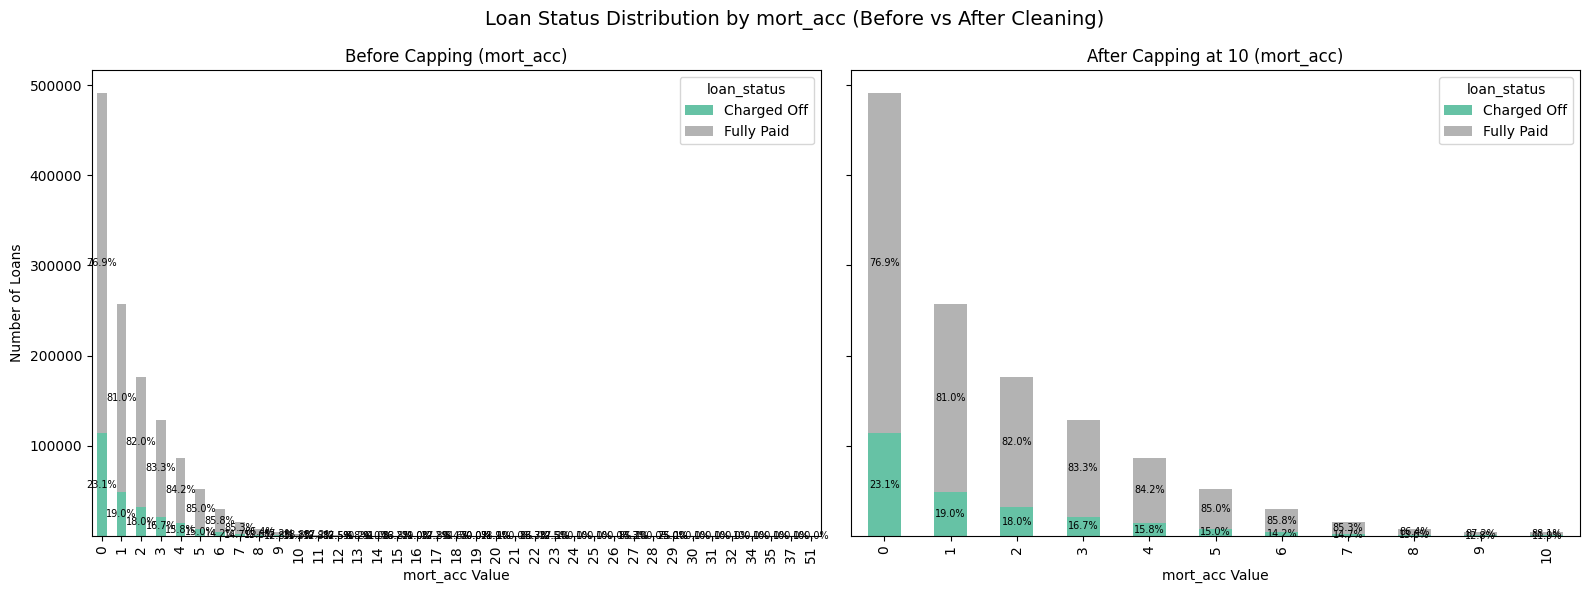

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Fill missing values
median_mort_acc = data['mort_acc'].median()
data_copy = data.copy()
data_copy['mort_acc_filled'] = data_copy['mort_acc'].fillna(median_mort_acc)

# Step 2: BEFORE capping — group and pivot
grouped_before = data_copy.groupby(['mort_acc_filled', 'loan_status']).size().reset_index(name='count')
pivot_before = grouped_before.pivot(index='mort_acc_filled', columns='loan_status', values='count').fillna(0)
percentages_before = pivot_before.div(pivot_before.sum(axis=1), axis=0) * 100

# Step 3: AFTER capping at 10 — clip and regroup
data_copy['mort_acc_capped'] = data_copy['mort_acc_filled'].clip(upper=10)
grouped_after = data_copy.groupby(['mort_acc_capped', 'loan_status']).size().reset_index(name='count')
pivot_after = grouped_after.pivot(index='mort_acc_capped', columns='loan_status', values='count').fillna(0)
percentages_after = pivot_after.div(pivot_after.sum(axis=1), axis=0) * 100

# Step 4: Plot both charts side-by-side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot BEFORE capping
pivot_before.plot(kind='bar', stacked=True, colormap='Set2', ax=ax1)
for i, value in enumerate(pivot_before.index):
    y_offset = 0
    for status in pivot_before.columns:
        count = pivot_before.loc[value, status]
        pct = percentages_before.loc[value, status]
        if count > 0:
            ax1.text(i, y_offset + count / 2, f"{pct:.1f}%", ha='center', va='center', fontsize=7)
            y_offset += count
ax1.set_title('Before Capping (mort_acc)')
ax1.set_xlabel('mort_acc Value')
ax1.set_ylabel('Number of Loans')
ax1.set_xticks(range(len(pivot_before.index)))
ax1.set_xticklabels(pivot_before.index.astype(int), rotation=90)

# Plot AFTER capping
pivot_after.plot(kind='bar', stacked=True, colormap='Set2', ax=ax2)
for i, value in enumerate(pivot_after.index):
    y_offset = 0
    for status in pivot_after.columns:
        count = pivot_after.loc[value, status]
        pct = percentages_after.loc[value, status]
        if count > 0:
            ax2.text(i, y_offset + count / 2, f"{pct:.1f}%", ha='center', va='center', fontsize=7)
            y_offset += count
ax2.set_title('After Capping at 10 (mort_acc)')
ax2.set_xlabel('mort_acc Value')
ax2.set_xticks(range(len(pivot_after.index)))
ax2.set_xticklabels(pivot_after.index.astype(int), rotation=90)

# Final formatting
plt.suptitle('Loan Status Distribution by mort_acc (Before vs After Cleaning)', fontsize=14)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Lending_Club_Data_Analysis/Data_Analysis/Loan_Status_Distribution_mort_acc_raw_before_after.png')
plt.show()


## total_acc (Total Number of Credit Accounts)

- **No missing values**.
- **Typical range**: 16 to 32 accounts.
- **Max value**: 176, which indicates the presence of extreme outliers.

---

## Preprocessing Decision:

- Cap `total_acc` at **99th percentile** to remove the impact of unrealistic extreme values.
- This prevents the model from being biased toward a few borrowers with unusually high account counts.


In [ ]:
print(if_null_values('total_acc'))
print(data['total_acc'].describe())

# Step 1: Explore 99th percentile
percentile_99 = data['total_acc'].quantile(0.99)
print(f"99th percentile value: {percentile_99}")

# Step 2: Cap (clip) extreme values at 95th percentile
cap_value = percentile_99
data['total_acc'] = data['total_acc'].clip(upper=cap_value)


No missing values
count    1.253470e+06
mean     2.499816e+01
std      1.197571e+01
min      2.000000e+00
25%      1.600000e+01
50%      2.300000e+01
75%      3.200000e+01
max      1.760000e+02
Name: total_acc, dtype: float64
99th percentile value: 61.0


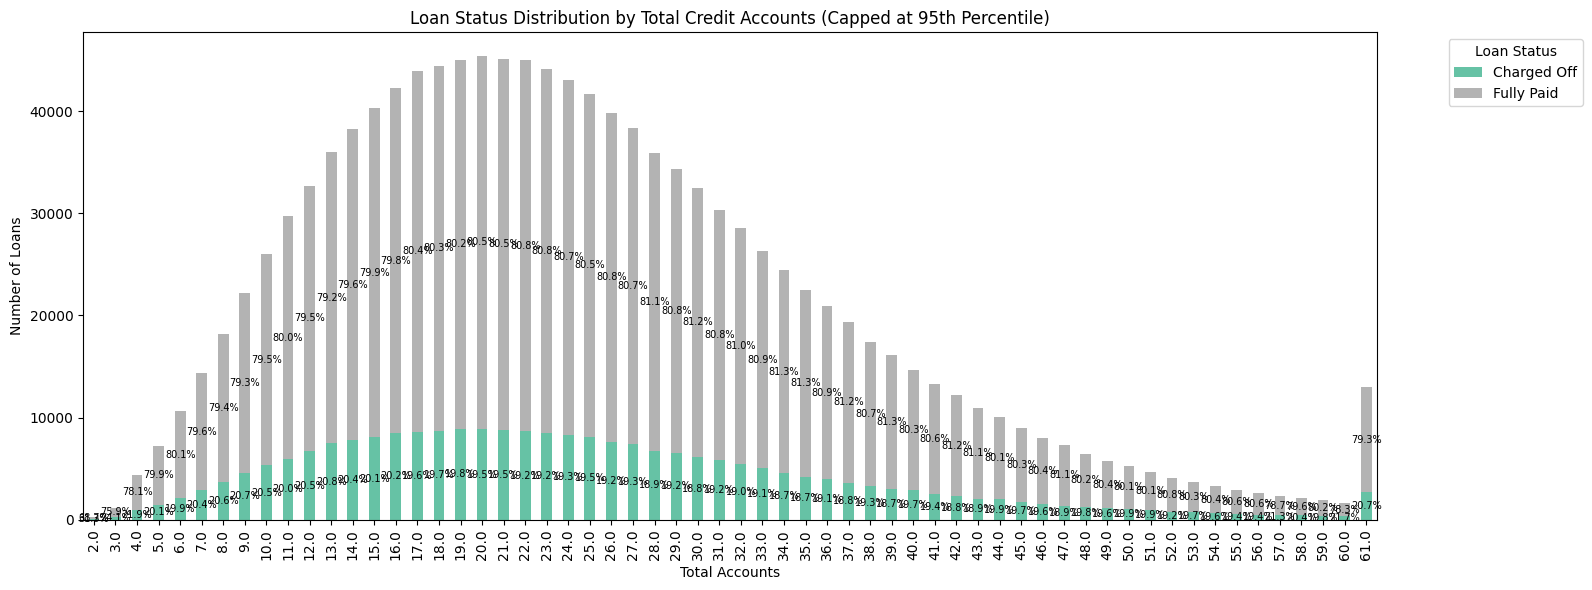

In [ ]:
# Step 3: Group and pivot
grouped = data.groupby(['total_acc', 'loan_status']).size().reset_index(name='count')
pivot_df = grouped.pivot(index='total_acc', columns='loan_status', values='count').fillna(0)
percentages = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Step 4: Plot
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(16, 6), colormap='Set2')

# Add percentage labels
for i, acc_value in enumerate(pivot_df.index):
    y_offset = 0
    for status in pivot_df.columns:
        count = pivot_df.loc[acc_value, status]
        pct = percentages.loc[acc_value, status]
        if count > 0:
            ax.text(i, y_offset + count / 2, f"{pct:.1f}%", ha='center', va='center', fontsize=7)
            y_offset += count

# Final styling
plt.title('Loan Status Distribution by Total Credit Accounts (Capped at 95th Percentile)')
plt.xlabel('Total Accounts')
plt.ylabel('Number of Loans')
plt.xticks(rotation=90)
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Lending_Club_Data_Analysis/Data_Analysis/Loan_Status_Distribution_total_acc.png')
plt.show()

## tot_cur_bal (Total Current Balance)

- **Missing values**: 5.04% → filled with the **median**.
- **Outliers**: Some borrowers report balances up to ~$3.6 million.

---

## Preprocessing Decisions:

1. **Impute missing values** with the **median** to avoid skew from outliers.
2. **Cap extreme values** at the **99th percentile** to remove the influence of rare extreme balances.


% of missing values = 5.02
count    1.188427e+06
mean     1.396361e+05
std      1.461356e+05
min      0.000000e+00
25%      3.041800e+04
50%      8.192200e+04
75%      2.114450e+05
max      3.610743e+06
Name: tot_cur_bal, dtype: float64
99th percentile of tot_cur_bal: 624302.9300000002


<ipython-input-164-9d39a11a3459>:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(['tot_cur_bal_bin', 'loan_status']).size().reset_index(name='count')


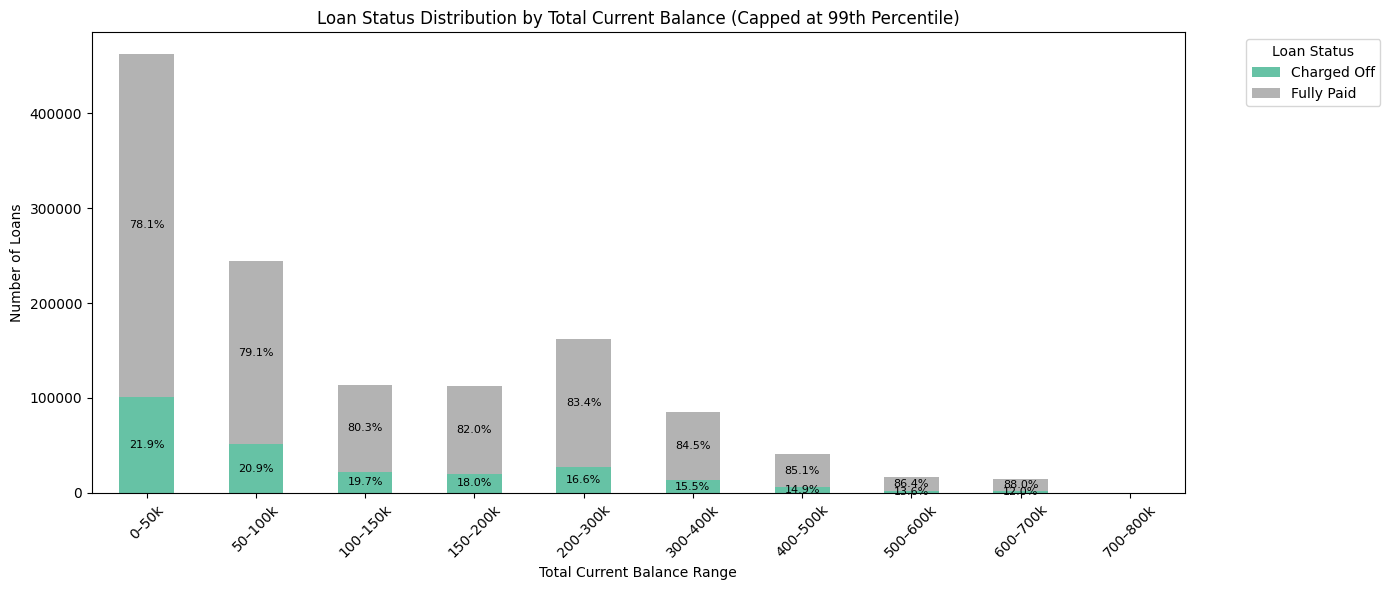

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Check for nulls and describe
print(if_null_values('tot_cur_bal'))
print(data['tot_cur_bal'].describe())

# Step 2: Fill missing values with the median
median_tot_cur_bal = data['tot_cur_bal'].median()
data['tot_cur_bal'] = data['tot_cur_bal'].fillna(median_tot_cur_bal)

# Step 3: Cap at the 99th percentile
percentile_99 = data['tot_cur_bal'].quantile(0.99)
print(f"99th percentile of tot_cur_bal: {percentile_99}")
data['tot_cur_bal'] = data['tot_cur_bal'].clip(upper=percentile_99)

# Step 4: Bin for clearer plotting (e.g., 50k bins up to ~800k)
bins = [0, 50000, 100000, 150000, 200000, 300000, 400000, 500000, 600000, 700000, 800000]
labels = ['0–50k', '50–100k', '100–150k', '150–200k', '200–300k', '300–400k',
          '400–500k', '500–600k', '600–700k', '700–800k']
data['tot_cur_bal_bin'] = pd.cut(data['tot_cur_bal'], bins=bins, labels=labels, right=False)

# Step 5: Group and pivot
grouped = data.groupby(['tot_cur_bal_bin', 'loan_status']).size().reset_index(name='count')
pivot_df = grouped.pivot(index='tot_cur_bal_bin', columns='loan_status', values='count').fillna(0)
percentages = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Step 6: Plot
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='Set2')

# Add percentage labels
for i, bin_label in enumerate(pivot_df.index):
    y_offset = 0
    for status in pivot_df.columns:
        count = pivot_df.loc[bin_label, status]
        pct = percentages.loc[bin_label, status]
        if count > 0:
            ax.text(i, y_offset + count / 2, f"{pct:.1f}%", ha='center', va='center', fontsize=8)
            y_offset += count

# Final styling
plt.title('Loan Status Distribution by Total Current Balance (Capped at 99th Percentile)')
plt.xlabel('Total Current Balance Range')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45)
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Lending_Club_Data_Analysis/Data_Analysis/Loan_Status_Distribution_tot_cur_bal.png')
plt.show()


## open_acc (Number of Open Credit Accounts)

- **No missing values**.
- **Typical range**: 8 to 14 open accounts.
- **Extreme outliers**: Up to 90 open accounts exist, which are rare.

---

## Preprocessing Decisions:

1. **Cap values** at the **99th percentile** to remove extreme outliers.
2. **Plot the distribution** of `open_acc` by `loan_status` to check if the number of open accounts affects default behavior.


No missing values
count    1.253470e+06
mean     1.164755e+01
std      5.475804e+00
min      0.000000e+00
25%      8.000000e+00
50%      1.100000e+01
75%      1.400000e+01
max      9.000000e+01
Name: open_acc, dtype: float64
99th percentile value for open_acc: 29.0


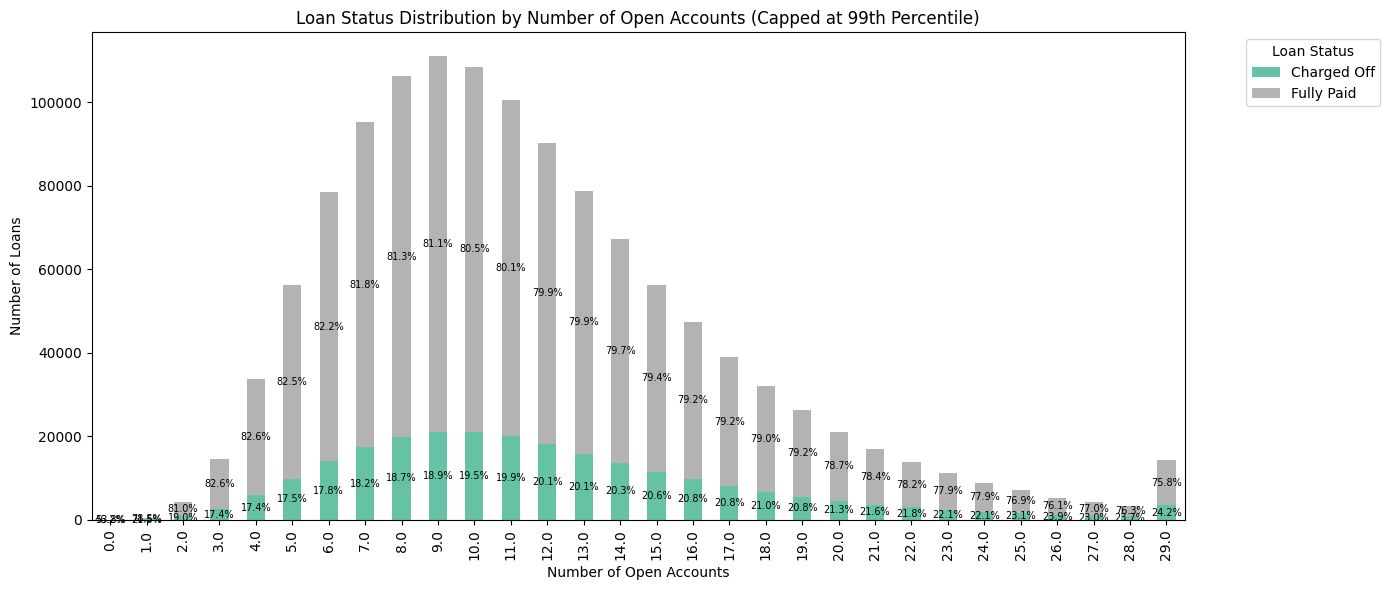

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Nulls and describe
print(if_null_values('open_acc'))
print(data['open_acc'].describe())

# Step 2: Cap at 99th percentile
percentile_99_open_acc = data['open_acc'].quantile(0.99)
print(f"99th percentile value for open_acc: {percentile_99_open_acc}")
data['open_acc'] = data['open_acc'].clip(upper=percentile_99_open_acc)

# Step 3: Group and pivot
grouped = data.groupby(['open_acc', 'loan_status']).size().reset_index(name='count')
pivot_df = grouped.pivot(index='open_acc', columns='loan_status', values='count').fillna(0)
percentages = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Step 4: Plot
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='Set2')

# Add percentage labels
for i, acc in enumerate(pivot_df.index):
    y_offset = 0
    for status in pivot_df.columns:
        count = pivot_df.loc[acc, status]
        pct = percentages.loc[acc, status]
        if count > 0:
            ax.text(i, y_offset + count / 2, f"{pct:.1f}%", ha='center', va='center', fontsize=7)
            y_offset += count

# Final styling
plt.title('Loan Status Distribution by Number of Open Accounts (Capped at 99th Percentile)')
plt.xlabel('Number of Open Accounts')
plt.ylabel('Number of Loans')
plt.xticks(rotation=90)
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Lending_Club_Data_Analysis/Data_Analysis/Loan_Status_Distribution_open_acc.png')
plt.show()


## pub_rec (Number of Derogatory Public Records)

- **No missing values**.
- **Highly skewed**: 75% of borrowers have 0 public records.
- **Extreme outliers**: Max value = 86.

---

## Preprocessing Decisions:

1. **Cap values** at the **99th percentile** to remove rare extreme cases.
   - This prevents a few extreme borrowers from distorting the model.
2. **Plot the distribution** split by `loan_status` to check if public records are related to loan defaults.



No missing values
count    1.253470e+06
mean     2.086903e-01
std      5.947660e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      8.600000e+01
Name: pub_rec, dtype: float64
99th percentile value for pub_rec: 2.0


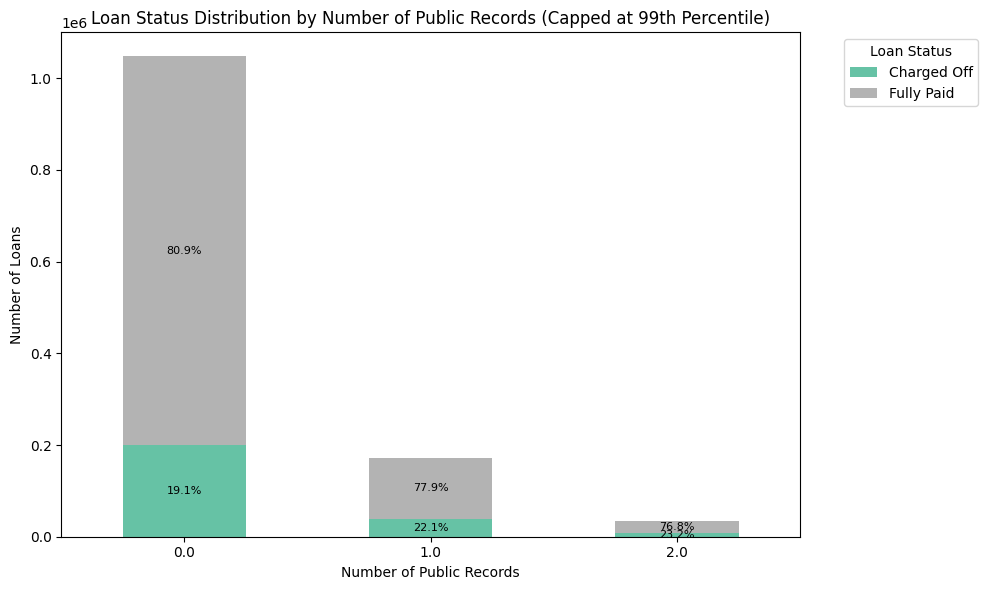

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Nulls and describe
print(if_null_values('pub_rec'))
print(data['pub_rec'].describe())

# Step 2: Cap at 99th percentile
percentile_99_pub_rec = data['pub_rec'].quantile(0.99)
print(f"99th percentile value for pub_rec: {percentile_99_pub_rec}")
data['pub_rec'] = data['pub_rec'].clip(upper=percentile_99_pub_rec)

# Step 3: Group and pivot
grouped = data.groupby(['pub_rec', 'loan_status']).size().reset_index(name='count')
pivot_df = grouped.pivot(index='pub_rec', columns='loan_status', values='count').fillna(0)
percentages = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Step 4: Plot
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')

# Add percentage labels
for i, value in enumerate(pivot_df.index):
    y_offset = 0
    for status in pivot_df.columns:
        count = pivot_df.loc[value, status]
        pct = percentages.loc[value, status]
        if count > 0:
            ax.text(i, y_offset + count / 2, f"{pct:.1f}%", ha='center', va='center', fontsize=8)
            y_offset += count

# Final styling
plt.title('Loan Status Distribution by Number of Public Records (Capped at 99th Percentile)')
plt.xlabel('Number of Public Records')
plt.ylabel('Number of Loans')
plt.xticks(rotation=0)
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Lending_Club_Data_Analysis/Data_Analysis/Loan_Status_Distribution_pub_rec.png')
plt.show()


## pub_rec_bankruptcies (Number of Public Record Bankruptcies)

- **Missing values**: 0.05%
- **Highly skewed**: Most borrowers have 0 bankruptcies.
- **Extreme outliers**: Up to 12 bankruptcies.

---

## Preprocessing Decisions:

1. **Impute missing values** with the **median** (0).
2. **Cap values** at the **99th percentile** to remove rare extreme cases.


% of missing values = 0.05
count    1.252780e+06
mean     1.302208e-01
std      3.732825e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.200000e+01
Name: pub_rec_bankruptcies, dtype: float64
99th percentile value for pub_rec_bankruptcies: 1.0


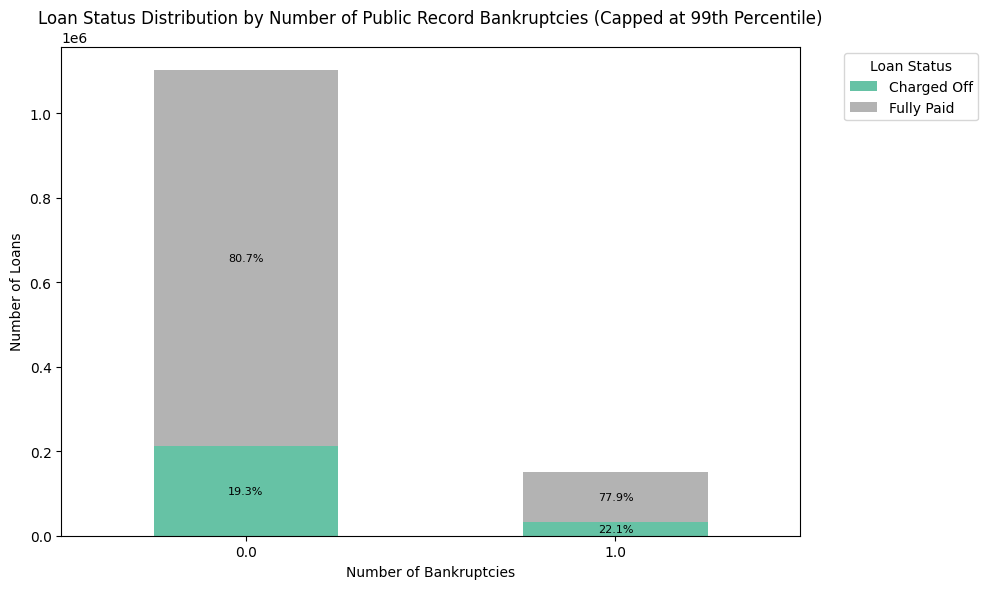

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Nulls and describe
print(if_null_values('pub_rec_bankruptcies'))
print(data['pub_rec_bankruptcies'].describe())

# Step 2: Fill missing values with the median
median_pub_rec_bankruptcies = data['pub_rec_bankruptcies'].median()
data['pub_rec_bankruptcies'] = data['pub_rec_bankruptcies'].fillna(median_pub_rec_bankruptcies)

# Step 3: Cap at 99th percentile
percentile_99 = data['pub_rec_bankruptcies'].quantile(0.99)
print(f"99th percentile value for pub_rec_bankruptcies: {percentile_99}")
data['pub_rec_bankruptcies'] = data['pub_rec_bankruptcies'].clip(upper=percentile_99)

# Step 4: Group and pivot
grouped = data.groupby(['pub_rec_bankruptcies', 'loan_status']).size().reset_index(name='count')
pivot_df = grouped.pivot(index='pub_rec_bankruptcies', columns='loan_status', values='count').fillna(0)
percentages = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Step 5: Plot
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')

# Add percentage labels
for i, value in enumerate(pivot_df.index):
    y_offset = 0
    for status in pivot_df.columns:
        count = pivot_df.loc[value, status]
        pct = percentages.loc[value, status]
        if count > 0:
            ax.text(i, y_offset + count / 2, f"{pct:.1f}%", ha='center', va='center', fontsize=8)
            y_offset += count

# Final styling
plt.title('Loan Status Distribution by Number of Public Record Bankruptcies (Capped at 99th Percentile)')
plt.xlabel('Number of Bankruptcies')
plt.ylabel('Number of Loans')
plt.xticks(rotation=0)
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Lending_Club_Data_Analysis/Data_Analysis/Loan_Status_Distribution_pub_rec_bankruptcies.png')
plt.show()


## purpose (Loan Purpose)

- **No missing values**.
- **14 unique purposes**, with `debt_consolidation` being the most common (almost 60% of loans).
- Keeping all categories without merging rare ones.

---

## Preprocessing Decisions:

1. **One-hot encode** the `purpose` variable without grouping.
2. **Drop** the original `purpose` column after encoding.



No missing values
count                1253470
unique                    14
top       debt_consolidation
freq                  731293
Name: purpose, dtype: object


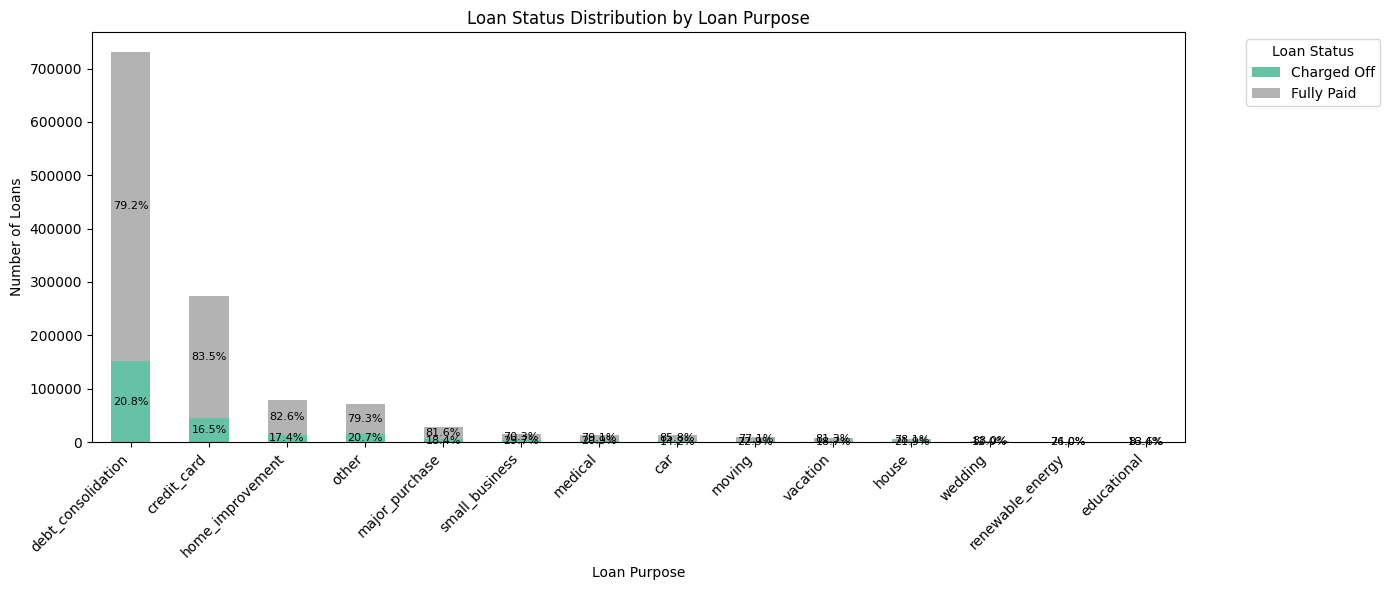

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Check nulls and basic stats
print(if_null_values('purpose'))
print(data['purpose'].describe())

# Step 2: Group and pivot
grouped = data.groupby(['purpose', 'loan_status']).size().reset_index(name='count')
pivot_df = grouped.pivot(index='purpose', columns='loan_status', values='count').fillna(0)
pivot_df = pivot_df.loc[pivot_df.sum(axis=1).sort_values(ascending=False).index]  # optional: sort by total loans

# Step 3: Calculate percentages for labels
percentages = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Step 4: Plot
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='Set2')

# Add percentage labels
for i, purpose in enumerate(pivot_df.index):
    y_offset = 0
    for status in pivot_df.columns:
        count = pivot_df.loc[purpose, status]
        pct = percentages.loc[purpose, status]
        if count > 0:
            ax.text(i, y_offset + count / 2, f"{pct:.1f}%", ha='center', va='center', fontsize=8)
            y_offset += count

# Final styling
plt.title('Loan Status Distribution by Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Lending_Club_Data_Analysis/Data_Analysis/Loan_Status_Distribution_purpose.png')
plt.show()


In [ ]:
# Step 1: One-hot encode the 'purpose' feature
purpose_dummies = pd.get_dummies(data['purpose'], prefix='purpose', drop_first=True)

# Step 2: Add dummies to the dataset
data = pd.concat([data, purpose_dummies], axis=1)

# Step 3: Drop the original 'purpose' column
data = data.drop(columns=['purpose'])

## term (Loan Term Length)

- Two categories: `36 months` and `60 months`.
- `36 months` is the most common term (~76% of loans).

---

## Preprocessing Decision:

- Convert `term` into a **binary variable**:
  - `36 months` → 0
  - `60 months` → 1



No missing values
count        1253470
unique             2
top        36 months
freq          944285
Name: term, dtype: object


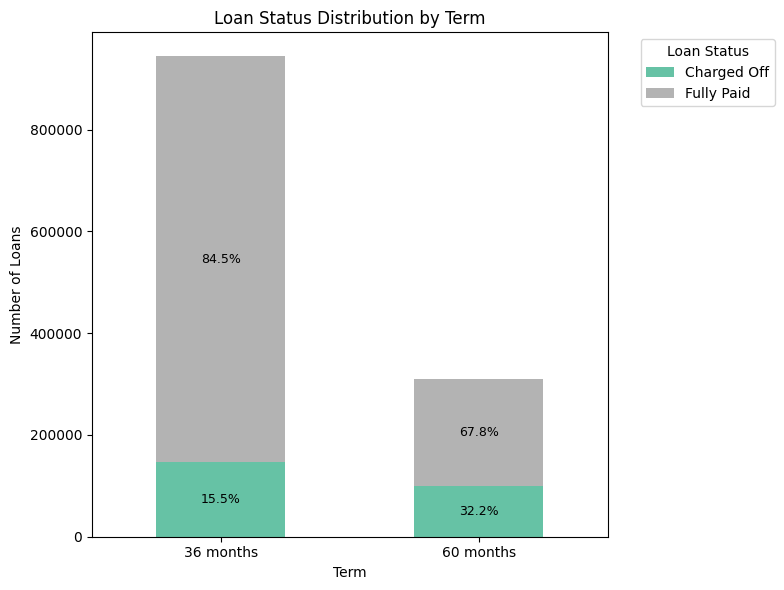

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Check nulls and basic info
print(if_null_values('term'))
print(data['term'].describe())

# Step 2: Clean whitespace (optional but often needed)
data['term'] = data['term'].str.strip()

# Step 3: Group and pivot
grouped = data.groupby(['term', 'loan_status']).size().reset_index(name='count')
pivot_df = grouped.pivot(index='term', columns='loan_status', values='count').fillna(0)

# Step 4: Calculate percentages for labels
percentages = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Step 5: Plot
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='Set2')

# Add percentage labels
for i, term_val in enumerate(pivot_df.index):
    y_offset = 0
    for status in pivot_df.columns:
        count = pivot_df.loc[term_val, status]
        pct = percentages.loc[term_val, status]
        if count > 0:
            ax.text(i, y_offset + count / 2, f"{pct:.1f}%", ha='center', va='center', fontsize=9)
            y_offset += count

# Final styling
plt.title('Loan Status Distribution by Term')
plt.xlabel('Term')
plt.ylabel('Number of Loans')
plt.xticks(rotation=0)
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Lending_Club_Data_Analysis/Data_Analysis/Loan_Status_Distribution_term.png')
plt.show()


In [ ]:
# Encode 'term' as binary: 36 months -> 0, 60 months -> 1
data['term'] = data['term'].apply(lambda x: 0 if x == '36 months' else 1)

## title (Loan Title)

- **1.24% missing values**.
- **Over 61,000 unique titles**, most of which are free-text inputs from borrowers.
- The information in `title` largely overlaps with the cleaner, structured `purpose` feature.

---

## Preprocessing Decision:

- **Drop** the `title` column:
  - Very high cardinality makes it impractical for modeling.
  - Information is already captured by the `purpose` feature.
  - Free-text data would require complex NLP preprocessing that is not necessary for this analysis.



In [ ]:
print(if_null_values('title'))
print(data['title'].describe())

# Drop the 'title' column
data = data.drop(columns=['title'])


% of missing values = 1.24
count                1239137
unique                 59170
top       Debt consolidation
freq                  617496
Name: title, dtype: object


## revol_bal (Total Revolving Balance)

- **Typical range**: $6,000 to $20,000.
- **Extreme outliers**: Some borrowers have balances over $900,000.

---

## Preprocessing Decisions:

1. **Cap values** at the **99th percentile** to remove the impact of extreme rare cases.
2. Keep `revol_bal` because it may have a strong relationship with default risk.


No missing values
count    1.253470e+06
mean     1.593236e+04
std      1.932540e+04
min      0.000000e+00
25%      6.012000e+03
50%      1.120700e+04
75%      1.974900e+04
max      9.597540e+05
Name: revol_bal, dtype: float64
99th percentile value for revol_bal: 87036.0


<ipython-input-173-171ec767c1f2>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(['revol_bal_bin', 'loan_status']).size().reset_index(name='count')


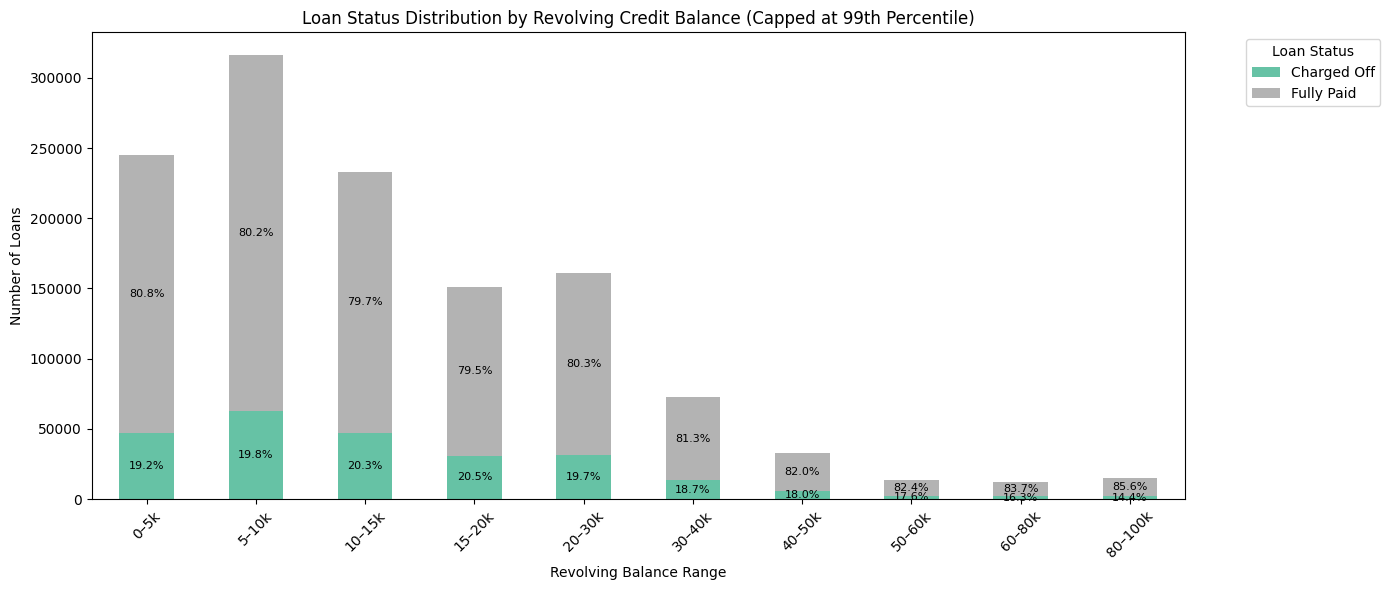

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Check nulls and describe
print(if_null_values('revol_bal'))
print(data['revol_bal'].describe())

# Step 2: Cap at 99th percentile
percentile_99_revol_bal = data['revol_bal'].quantile(0.99)
print(f"99th percentile value for revol_bal: {percentile_99_revol_bal}")
data['revol_bal'] = data['revol_bal'].clip(upper=percentile_99_revol_bal)

# Step 3: Define bins for revol_bal
bins = [0, 5000, 10000, 15000, 20000, 30000, 40000, 50000, 60000, 80000, 100000]
labels = ['0–5k', '5–10k', '10–15k', '15–20k', '20–30k', '30–40k',
          '40–50k', '50–60k', '60–80k', '80–100k']
data['revol_bal_bin'] = pd.cut(data['revol_bal'], bins=bins, labels=labels, right=False)

# Step 4: Group and pivot
grouped = data.groupby(['revol_bal_bin', 'loan_status']).size().reset_index(name='count')
pivot_df = grouped.pivot(index='revol_bal_bin', columns='loan_status', values='count').fillna(0)
percentages = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Step 5: Plot
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='Set2')

# Add percentage labels
for i, bin_label in enumerate(pivot_df.index):
    y_offset = 0
    for status in pivot_df.columns:
        count = pivot_df.loc[bin_label, status]
        pct = percentages.loc[bin_label, status]
        if count > 0:
            ax.text(i, y_offset + count / 2, f"{pct:.1f}%", ha='center', va='center', fontsize=8)
            y_offset += count

# Final formatting
plt.title('Loan Status Distribution by Revolving Credit Balance (Capped at 99th Percentile)')
plt.xlabel('Revolving Balance Range')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45)
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Lending_Club_Data_Analysis/Data_Analysis/Loan_Status_Distribution_revol_bal.png')
plt.show()


## revol_util (Revolving Line Utilization Rate)

- **0.06% missing values**
- **Typical range**: 33% to 71%.
- **Extreme outliers**: Values up to 892%, which are unrealistic.

---

## Preprocessing Decisions:

1. **Impute missing values** with the **median** to avoid skewing the distribution.
2. **Cap extreme values** at **100%**, since revolving utilization should logically not exceed 100%.



% of missing values = 0.06
count    1.252701e+06
mean     5.203363e+01
std      2.444433e+01
min      0.000000e+00
25%      3.380000e+01
50%      5.240000e+01
75%      7.090000e+01
max      8.923000e+02
Name: revol_util, dtype: float64


<ipython-input-174-9aae9a5f83a9>:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_before = data.groupby(['revol_util_bin_before', 'loan_status']).size().reset_index(name='count')
<ipython-input-174-9aae9a5f83a9>:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_after = data.groupby(['revol_util_bin_after', 'loan_status']).size().reset_index(name='count')


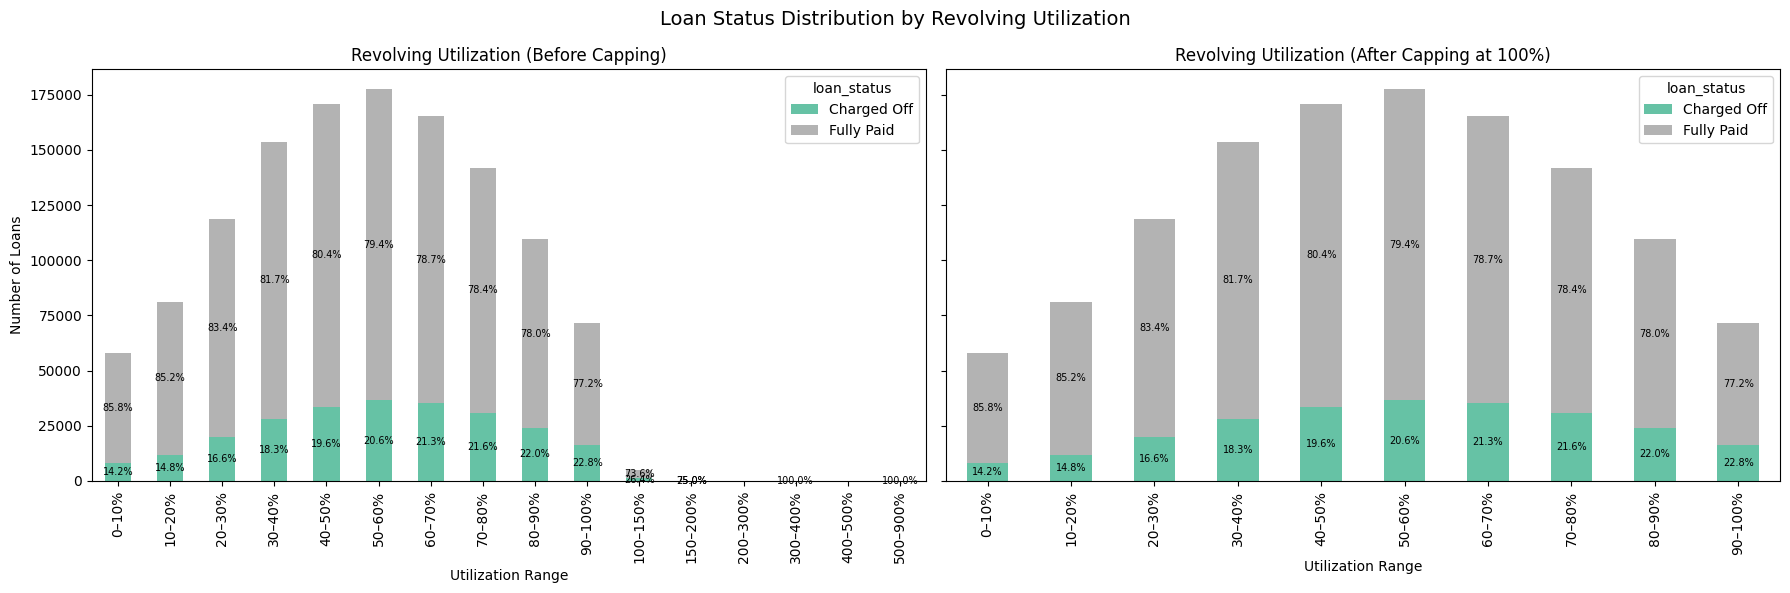

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Check nulls and describe
print(if_null_values('revol_util'))
print(data['revol_util'].describe())

# Step 2: Fill missing values
median_revol_util = data['revol_util'].median()
data['revol_util'] = data['revol_util'].fillna(median_revol_util)

# Step 3: Save original (uncapped) values
data['revol_util_uncapped'] = data['revol_util'].copy()

# Step 4: Define bins for plotting
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 300, 400, 500, 900]
labels_before = ['0–10%', '10–20%', '20–30%', '30–40%', '40–50%', '50–60%', '60–70%',
                 '70–80%', '80–90%', '90–100%', '100–150%', '150–200%', '200–300%',
                 '300–400%', '400–500%', '500–900%']
labels_after = labels_before[:10]  # after capping, only bins up to 100%

# Step 5: BEFORE capping: bin, group, pivot
data['revol_util_bin_before'] = pd.cut(data['revol_util_uncapped'], bins=bins, labels=labels_before, right=False)
grouped_before = data.groupby(['revol_util_bin_before', 'loan_status']).size().reset_index(name='count')
pivot_before = grouped_before.pivot(index='revol_util_bin_before', columns='loan_status', values='count').fillna(0)
percentages_before = pivot_before.div(pivot_before.sum(axis=1), axis=0) * 100

# Step 6: AFTER capping
data['revol_util'] = data['revol_util'].clip(upper=100)
data['revol_util_bin_after'] = pd.cut(data['revol_util'], bins=bins[:11], labels=labels_after, right=False)
grouped_after = data.groupby(['revol_util_bin_after', 'loan_status']).size().reset_index(name='count')
pivot_after = grouped_after.pivot(index='revol_util_bin_after', columns='loan_status', values='count').fillna(0)
percentages_after = pivot_after.div(pivot_after.sum(axis=1), axis=0) * 100

# Step 7: Plot side-by-side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# Plot BEFORE
pivot_before.plot(kind='bar', stacked=True, colormap='Set2', ax=ax1)
for i, bin_label in enumerate(pivot_before.index):
    y_offset = 0
    for status in pivot_before.columns:
        count = pivot_before.loc[bin_label, status]
        pct = percentages_before.loc[bin_label, status]
        if count > 0:
            ax1.text(i, y_offset + count / 2, f"{pct:.1f}%", ha='center', va='center', fontsize=7)
            y_offset += count
ax1.set_title('Revolving Utilization (Before Capping)')
ax1.set_xlabel('Utilization Range')
ax1.set_ylabel('Number of Loans')
ax1.set_xticks(range(len(pivot_before.index)))
ax1.set_xticklabels(pivot_before.index, rotation=90)

# Plot AFTER
pivot_after.plot(kind='bar', stacked=True, colormap='Set2', ax=ax2)
for i, bin_label in enumerate(pivot_after.index):
    y_offset = 0
    for status in pivot_after.columns:
        count = pivot_after.loc[bin_label, status]
        pct = percentages_after.loc[bin_label, status]
        if count > 0:
            ax2.text(i, y_offset + count / 2, f"{pct:.1f}%", ha='center', va='center', fontsize=7)
            y_offset += count
ax2.set_title('Revolving Utilization (After Capping at 100%)')
ax2.set_xlabel('Utilization Range')
ax2.set_xticks(range(len(pivot_after.index)))
ax2.set_xticklabels(pivot_after.index, rotation=90)

# Final formatting
plt.suptitle('Loan Status Distribution by Revolving Utilization', fontsize=14)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Lending_Club_Data_Analysis/Data_Analysis/Loan_Status_Distribution_revol_util_before_after.png')
plt.show()


## verification_status (Income Verification Status)

- Three categories:
  - `Verified`
  - `Source Verified`
  - `Not Verified`
- Income verification status is important for assessing borrower risk.

---

## Preprocessing Decisions:

1. **One-hot encode** the `verification_status` feature into dummy variables.
2. **Drop** the original `verification_status` column after encoding.



No missing values
count             1253470
unique                  3
top       Source Verified
freq               498679
Name: verification_status, dtype: object


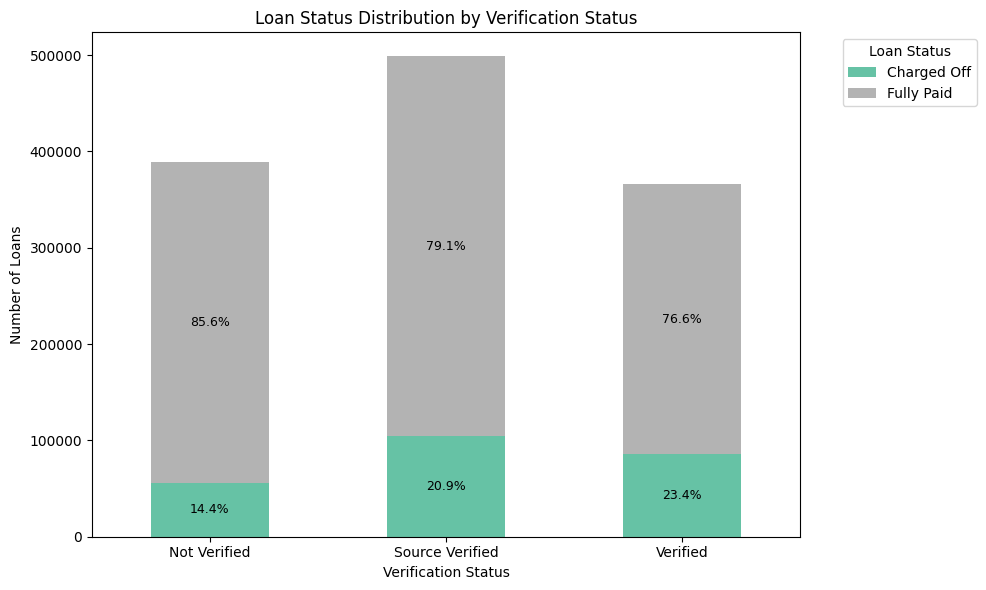

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Check for nulls and describe
print(if_null_values('verification_status'))
print(data['verification_status'].describe())

# Step 2: Group and pivot
grouped = data.groupby(['verification_status', 'loan_status']).size().reset_index(name='count')
pivot_df = grouped.pivot(index='verification_status', columns='loan_status', values='count').fillna(0)
percentages = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Step 3: Plot
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')

# Add percentage labels
for i, v_status in enumerate(pivot_df.index):
    y_offset = 0
    for status in pivot_df.columns:
        count = pivot_df.loc[v_status, status]
        pct = percentages.loc[v_status, status]
        if count > 0:
            ax.text(i, y_offset + count / 2, f"{pct:.1f}%", ha='center', va='center', fontsize=9)
            y_offset += count

# Final styling
plt.title('Loan Status Distribution by Verification Status')
plt.xlabel('Verification Status')
plt.ylabel('Number of Loans')
plt.xticks(rotation=0)
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Lending_Club_Data_Analysis/Data_Analysis/Loan_Status_Distribution_verification_status.png')
plt.show()


In [ ]:
# Step 1: One-hot encode the 'verification_status' feature
verification_dummies = pd.get_dummies(data['verification_status'], prefix='verify', drop_first=True)

# Step 2: Add dummies to dataset
data = pd.concat([data, verification_dummies], axis=1)

# Step 3: Drop original 'verification_status' column
data = data.drop(columns=['verification_status'])

In [ ]:
data.shape

(1253470, 128)

## loan_status (Loan Outcome — Target Variable)

- **No missing values**.
- Two categories:
  - `Fully Paid` (~80%)
  - `Charged Off` (~20%)

---

## Preprocessing Decision:

- Convert `loan_status` into a **binary variable**:
  - `Fully Paid` → 0
  - `Charged Off` → 1
- This creates a clean target variable for binary classification modeling.



No missing values
count        1253470
unique             2
top       Fully Paid
freq         1007761
Name: loan_status, dtype: object


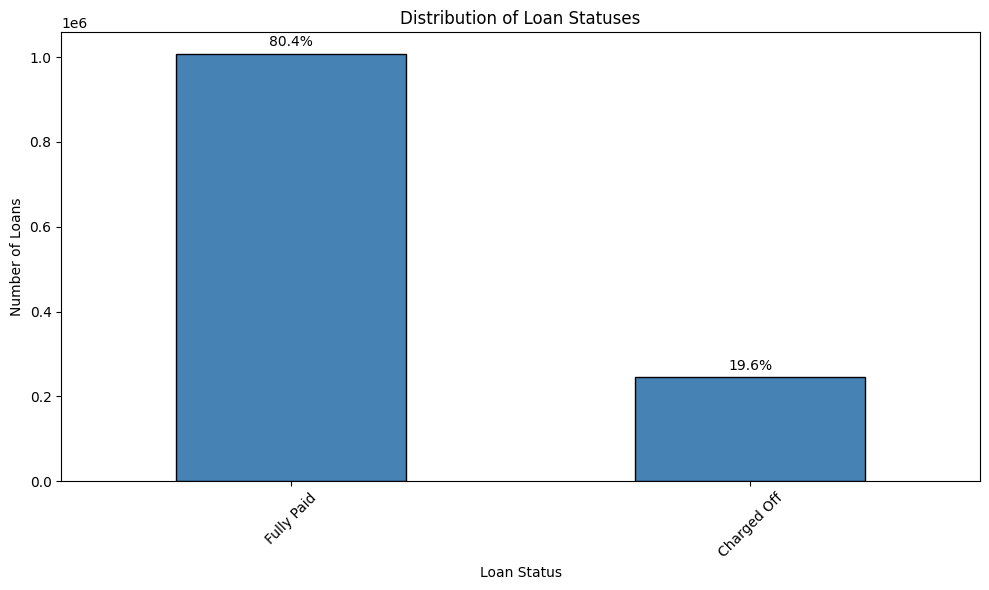

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Check nulls and describe
print(if_null_values('loan_status'))
print(data['loan_status'].describe())

# Step 2: Count values
loan_status_counts = data['loan_status'].value_counts().sort_values(ascending=False)
loan_status_percent = loan_status_counts / loan_status_counts.sum() * 100

# Step 3: Plot
plt.figure(figsize=(10, 6))
ax = loan_status_counts.plot(kind='bar', color='steelblue', edgecolor='black')

# Add percentage labels on bars
for i, (count, pct) in enumerate(zip(loan_status_counts, loan_status_percent)):
    ax.text(i, count + max(loan_status_counts) * 0.01, f'{pct:.1f}%', ha='center', va='bottom', fontsize=10)

# Final styling
plt.title('Distribution of Loan Statuses')
plt.xlabel('Loan Status')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Lending_Club_Data_Analysis/Data_Analysis/Loan_Status_Distribution_Overall.png')
plt.show()


In [ ]:
# Encode 'loan_status' as binary target
data['loan_status'] = data['loan_status'].apply(lambda x: 0 if x == 'Fully Paid' else 1)

# Optional: Check distribution after encoding
print(data['loan_status'].value_counts(normalize=True) * 100)

loan_status
0    80.397696
1    19.602304
Name: proportion, dtype: float64


In [ ]:
# Drop helper columns for plots
columns_to_drop = [
    'income_range',
    'loan_amnt_bin',
    'actv_bc_bin',
    'tot_cur_bal_bin',
    'revol_bal_bin',
    'revol_util_bin_before',
    'revol_util_bin_after'
]

data = data.drop(columns=columns_to_drop)


In [ ]:
print(data.dtypes.value_counts())
print(data.shape)

bool       103
float64     15
int64        3
Name: count, dtype: int64
(1253470, 121)


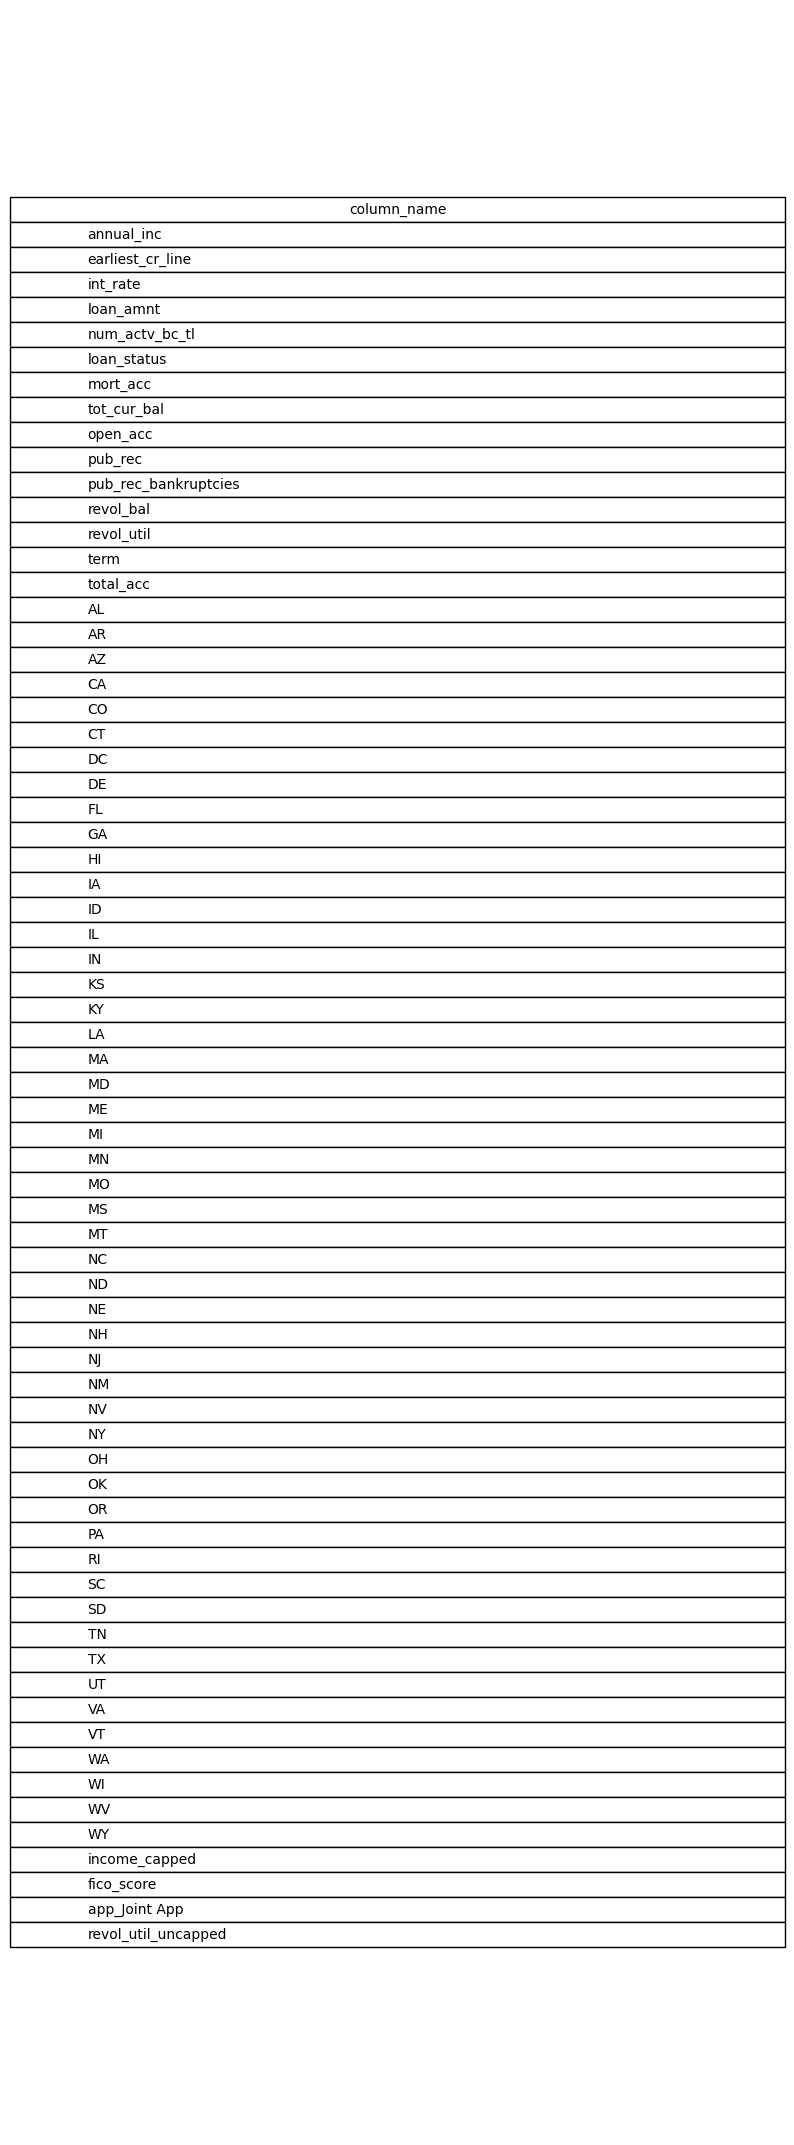

In [ ]:
import pandas as pd
from collections import defaultdict

# Step 0: (Optional) Load your data
# data = pd.read_csv("your_file.csv")

# Step 1: Collect potential one-hot encoded columns (binary with 0/1 values)
binary_cols = [col for col in data.columns if set(data[col].dropna().unique()).issubset({0, 1})]

# Step 2: Group by common prefixes
prefix_groups = defaultdict(list)
for col in binary_cols:
    if "_" in col:
        prefix = col.split("_")[0]
        prefix_groups[prefix].append(col)

# Step 3: Filter for true one-hot groups (must have more than 1 column)
one_hot_groups = {prefix: cols for prefix, cols in prefix_groups.items() if len(cols) > 1}

# Step 4: Drop all one-hot encoded columns from a copy of the dataset
one_hot_columns = [col for cols in one_hot_groups.values() for col in cols]
data_no_ohe = data.drop(columns=one_hot_columns).copy()

# Step 5: Make a table of the remaining columns
column_table = pd.DataFrame({
    'column_name': data_no_ohe.columns
})

# Step 6: Save to CSV (optional)
column_table.to_csv('/content/drive/MyDrive/Lending_Club_Data_Analysis/column_table_no_ohe.csv', index=False)

# Step 7: Save to PNG (optional visualization)
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, len(column_table) * 0.4))
ax.axis('off')
table = ax.table(cellText=column_table.values, colLabels=column_table.columns, cellLoc='left', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

plt.savefig('/content/drive/MyDrive/Lending_Club_Data_Analysis/column_table_no_ohe.png', bbox_inches='tight')
plt.show()


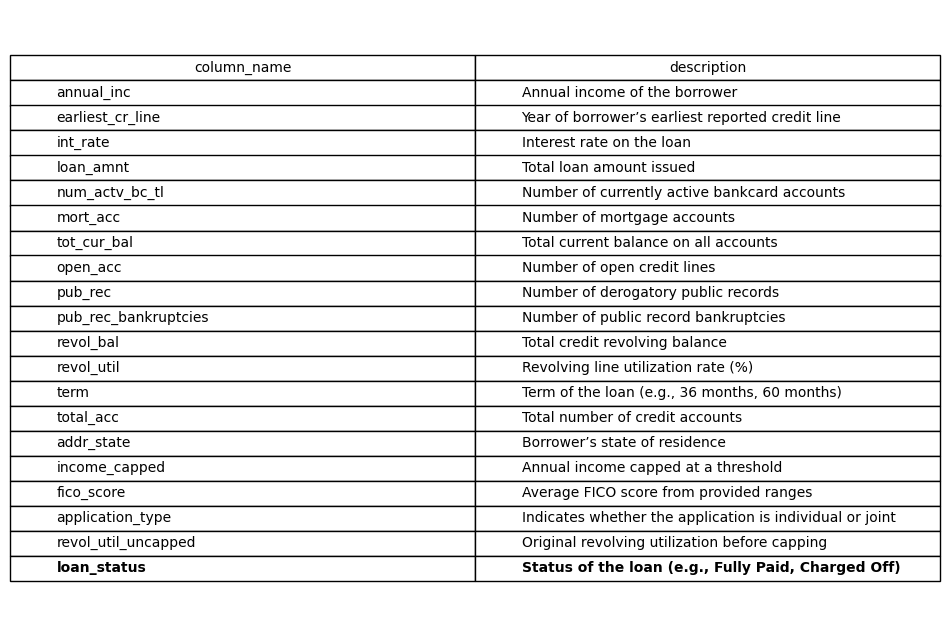

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Use your DataFrame (e.g. data_no_ohe)
raw_columns = data_no_ohe.columns

# Step 2: Replace U.S. state columns with 'addr_state'
us_states = {
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'HI',
    'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN',
    'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH',
    'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA',
    'WV', 'WI', 'WY'
}
cleaned_columns = ['addr_state' if col in us_states else col for col in raw_columns]
cleaned_columns = list(dict.fromkeys(cleaned_columns))  # remove duplicates

# Step 3: Replace 'app_Joint App' with 'application_type'
cleaned_columns = ['application_type' if col == 'app_Joint App' else col for col in cleaned_columns]

# Step 4: Move 'loan_status' to the end
if 'loan_status' in cleaned_columns:
    cleaned_columns = [col for col in cleaned_columns if col != 'loan_status'] + ['loan_status']

# Step 5: Add column descriptions
descriptions = {
    'annual_inc': 'Annual income of the borrower',
    'earliest_cr_line': 'Year of borrower’s earliest reported credit line',
    'int_rate': 'Interest rate on the loan',
    'loan_amnt': 'Total loan amount issued',
    'num_actv_bc_tl': 'Number of currently active bankcard accounts',
    'loan_status': 'Status of the loan (e.g., Fully Paid, Charged Off)',
    'mort_acc': 'Number of mortgage accounts',
    'tot_cur_bal': 'Total current balance on all accounts',
    'open_acc': 'Number of open credit lines',
    'pub_rec': 'Number of derogatory public records',
    'pub_rec_bankruptcies': 'Number of public record bankruptcies',
    'revol_bal': 'Total credit revolving balance',
    'revol_util': 'Revolving line utilization rate (%)',
    'term': 'Term of the loan (e.g., 36 months, 60 months)',
    'total_acc': 'Total number of credit accounts',
    'addr_state': 'Borrower’s state of residence',
    'income_capped': 'Annual income capped at a threshold',
    'fico_score': 'Average FICO score from provided ranges',
    'application_type': 'Indicates whether the application is individual or joint',
    'revol_util_uncapped': 'Original revolving utilization before capping'
}

# Step 6: Create the final table
column_table = pd.DataFrame({
    'column_name': cleaned_columns,
    'description': [descriptions.get(col, '') for col in cleaned_columns]
})

# Step 8: Save styled table to PNG with loan_status in bold
fig, ax = plt.subplots(figsize=(12, len(column_table) * 0.4))
ax.axis('off')
table = ax.table(cellText=column_table.values, colLabels=column_table.columns, cellLoc='left', loc='center')

# Bold loan_status row
for i, row in column_table.iterrows():
    for j in range(len(row)):
        table[(i + 1, j)].set_fontsize(10)
        if row['column_name'] == 'loan_status':
            table[(i + 1, j)].set_text_props(weight='bold')

table.auto_set_font_size(False)
table.scale(1, 1.5)
plt.savefig('/content/drive/MyDrive/Lending_Club_Data_Analysis/final_features.png', bbox_inches='tight')



## Split data into test and training (90%) and final evaluation set (10%) + save as csv

In [ ]:
from sklearn.model_selection import train_test_split

# Step 1: Split 90% / 10% for model training vs final evaluation
data, data_eval = train_test_split(
    data, test_size=0.10, random_state=42, stratify=data['loan_status']
)

# Step 2: Save both splits to CSV
data.to_csv('/content/drive/MyDrive/Lending_Club_Data_Analysis/preprocessed_data.csv', index=False)
data_eval.to_csv('/content/drive/MyDrive/Lending_Club_Data_Analysis/preprocessed_data_eval.csv', index=False)


# ✅ Data is now ready for XGBoost!

- **X** = Feature Matrix  
- **y** = Target Variable


# XGBoost Model Training





In [ ]:
import pandas as pd

# Load main dataset
data = pd.read_csv('/content/drive/MyDrive/Lending_Club_Data_Analysis/preprocessed_data.csv')

In [ ]:
X = data.drop('loan_status', axis=1)
y = data['loan_status']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1) # keeping 15% for test

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# fit model to training data
model = xgb.XGBClassifier(
        objective="binary:logistic",
        learning_rate=0.1,
        max_depth=6,
        eval_metric='logloss',
        random_state=42
    )
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
preds = model.predict(X_test)
model.save_model('/content/drive/MyDrive/Lending_Club_Data_Analysis/Basemodel_FullData/BasemodelFullData.json')

In [ ]:
import os
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Set path
save_path = '/content/drive/MyDrive/Lending_Club_Data_Analysis/Basemodel_FullData/'

# Ensure the directory exists
os.makedirs(save_path, exist_ok=True)

# Generate and save classification report
report = classification_report(y_test, preds)
print(report)
with open(os.path.join(save_path, 'classification_report.txt'), 'w') as f:
    f.write(report)

# Generate and save confusion matrix plot
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, cmap='Blues')
plt.title("Confusion Matrix")
plt.savefig(os.path.join(save_path, 'confusion_matrix.png'))
plt.close()







ValueError: Found input variables with inconsistent numbers of samples: [112813, 8189]

## XGBoost Loan Default Prediction – Evaluation Summary

### Classification Report

| Class | Precision | Recall | F1-score | Support |
|-------|-----------|--------|----------|---------|
| 0 (No Default) | 0.81 | 0.99 | 0.89 | 90,815 |
| 1 (Default)    | 0.56 | 0.06 | 0.11 | 21,998 |
| **Accuracy**   |       |       | **0.81** | 112,813 |
| **Macro Avg**  | 0.69 | 0.53 | 0.50 | 112,813 |
| **Weighted Avg** | 0.76 | 0.81 | 0.74 | 112,813 |

### Key Insights

- **Imbalanced classes**: Defaults (class 1) are underrepresented.
- **Class 0**: High recall (0.99) and precision (0.81) → well predicted.
- **Class 1**: Very low recall (0.06) → most defaults missed.
- **Accuracy (81%)** is misleading due to imbalance.
- **Macro F1 (0.50)** reflects poor performance on class 1.

# Split Data into 20 companies and save the data sets

- Dataset split into 4 companies.
- Random shuffle without strict class stratification.
- Simulates realistic company dataset distribution.



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
🌎 Global Default Rate: 19.60%
✅ Company 1: 33626 samples, Risk Rate: 32.88%
✅ Company 2: 22204 samples, Risk Rate: 49.79%
✅ Company 3: 80238 samples, Risk Rate: 13.78%
✅ Company 4: 63480 samples, Risk Rate: 17.42%
✅ Company 5: 26333 samples, Risk Rate: 41.99%
✅ Company 6: 84491 samples, Risk Rate: 13.09%
✅ Company 7: 49963 samples, Risk Rate: 22.13%
✅ Company 8: 55263 samples, Risk Rate: 20.01%
✅ Company 9: 67588 samples, Risk Rate: 16.36%
✅ Company 10: 33789 samples, Risk Rate: 32.72%
✅ Company 11: 52940 samples, Risk Rate: 20.89%
✅ Company 12: 72904 samples, Risk Rate: 15.17%
✅ Company 13: 71070 samples, Risk Rate: 15.56%
✅ Company 14: 22134 samples, Risk Rate: 49.95%
✅ Company 15: 67185 samples, Risk Rate: 16.46%
✅ Company 16: 69645 samples, Risk Rate: 15.88%
✅ Company 17: 71150 samples, Risk Rate: 15.54%
✅ Company 18: 73476 samples, Risk Rate: 15.05%
✅ Co

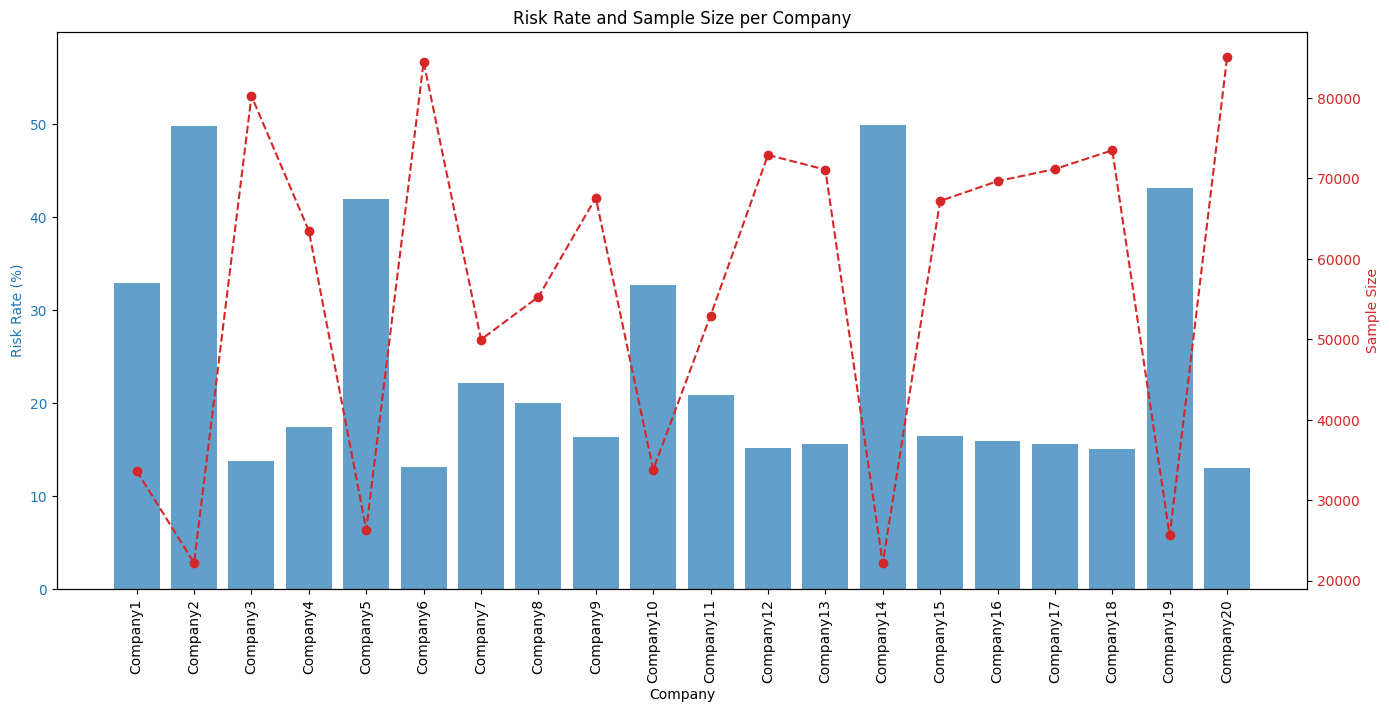

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Paths
data_path = '/content/drive/MyDrive/Lending_Club_Data_Analysis/preprocessed_data.csv'
output_folder = '/content/drive/MyDrive/Lending_Club_Data_Analysis/Data_Companies'
os.makedirs(output_folder, exist_ok=True)

# Load and shuffle
data = pd.read_csv(data_path)
data_shuffled = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Settings
NUM_COMPANIES = 20
np.random.seed(42)

# Split risky and safe
safe_loans = data_shuffled[data_shuffled['loan_status'] == 0].copy().reset_index(drop=True)
risky_loans = data_shuffled[data_shuffled['loan_status'] == 1].copy().reset_index(drop=True)

# Global default rate
global_risk_rate = len(risky_loans) / len(data_shuffled)
print(f"🌎 Global Default Rate: {global_risk_rate:.2%}")

# Company sizes
n = len(data_shuffled)
avg_size = n / NUM_COMPANIES
min_size = int(0.5 * avg_size)
max_size = int(2.0 * avg_size)

sizes = np.random.randint(min_size, max_size + 1, size=NUM_COMPANIES)
scaling_factor = n / sizes.sum()
sizes = (sizes * scaling_factor).astype(int)

# Adjust if needed
diff = n - sizes.sum()
sizes[0] += diff

# Create companies without replacement
company_info = []
start_idx_safe = 0
start_idx_risky = 0

safe_loans = safe_loans.reset_index(drop=True)
risky_loans = risky_loans.reset_index(drop=True)

total_risky_left = len(risky_loans)

for i in range(NUM_COMPANIES):
    company_size = sizes[i]

    # Risk boundaries
    min_risk = global_risk_rate * 0.5
    max_risk = global_risk_rate * 2.0

    # Minimum risky loans needed for this company
    min_risky_needed = int(company_size * min_risk)

    # Remaining companies
    remaining_companies = NUM_COMPANIES - i

    # Fair risky allocation
    fair_risky_share = total_risky_left / remaining_companies

    # Set the target risky loans for this company
    n_risky = int(min(max(fair_risky_share, min_risky_needed), company_size))

    n_safe = company_size - n_risky

    # Check if enough safe loans
    n_safe = min(n_safe, len(safe_loans) - start_idx_safe)
    n_risky = company_size - n_safe  # adjust risky again to fill

    risky_samples = risky_loans.iloc[start_idx_risky : start_idx_risky + n_risky]
    safe_samples = safe_loans.iloc[start_idx_safe : start_idx_safe + n_safe]

    start_idx_risky += len(risky_samples)
    start_idx_safe += len(safe_samples)

    total_risky_left -= len(risky_samples)

    company_data = pd.concat([risky_samples, safe_samples]).sample(frac=1, random_state=42).reset_index(drop=True)

    # Save
    company_filename = os.path.join(output_folder, f"company{i+1}_data.csv")
    company_data.to_csv(company_filename, index=False)

    company_info.append({
        "Company": f"Company{i+1}",
        "Samples": len(company_data),
        "RiskRate": len(risky_samples) / len(company_data) if len(company_data) > 0 else 0,
    })

    print(f"✅ Company {i+1}: {len(company_data)} samples, Risk Rate: {len(risky_samples)/len(company_data):.2%}")

# Save summary
summary_df = pd.DataFrame(company_info)
summary_df.to_csv(f"{output_folder}/companies_summary.csv", index=False)

print("\n🎯 All companies saved! No duplication, all data used exactly once!")

# ---------------------------------------------------
# 📊 Plot Risk Rate and Sample Size per Company
# ---------------------------------------------------
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:blue'
ax1.set_xlabel('Company')
ax1.set_ylabel('Risk Rate (%)', color=color)
ax1.bar(summary_df['Company'], summary_df['RiskRate'] * 100, color=color, alpha=0.7, label='Risk Rate')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0, max(summary_df['RiskRate']) * 120)  # give extra space on top
plt.xticks(rotation=90)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Sample Size', color=color)
ax2.plot(summary_df['Company'], summary_df['Samples'], color=color, marker='o', linestyle='--', label='Sample Size')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Risk Rate and Sample Size per Company')
plt.savefig(f"{output_folder}/risk_rate_sample_size_per_company.png")
plt.show()


## Training XGBoost Models for Each Company

- Each company trains a separate XGBoost model **only on its own data**.
- Each model uses internal train/test splits.
- Model performance is evaluated separately for each company.

Models are now trained independently, simulating real-world company behavior.


In [ ]:
import pandas as pd
import os

# Paths
folder = '/content/drive/MyDrive/Lending_Club_Data_Analysis/Data_Companies'

# Define how many companies you have
NUM_COMPANIES = 20  # <<<<<<<< Adjust this if needed

# Load all datasets into a list
datasets = []

for i in range(1, NUM_COMPANIES + 1):
    path = os.path.join(folder, f"company{i}_data.csv")
    company_data = pd.read_csv(path)
    datasets.append(company_data)

print(f"✅ Loaded {len(datasets)} company datasets!")


✅ Loaded 20 company datasets!


In [ ]:
import os
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def train_and_save_results(company_data, company_name):
    # Paths
    base_folder = "/content/drive/MyDrive/Lending_Club_Data_Analysis"
    save_folder = os.path.join(base_folder, "Basemodel_Results")
    os.makedirs(save_folder, exist_ok=True)

    report_path = os.path.join(save_folder, f"{company_name}_classification_report.txt")
    cm_path = os.path.join(save_folder, f"{company_name}_confusion_matrix.png")

    # Split features and target
    X = company_data.drop('loan_status', axis=1)
    y = company_data['loan_status']

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.1, random_state=42, stratify=y
    )

    # Train model
    model = xgb.XGBClassifier(
        objective="binary:logistic",
        learning_rate=0.1,
        max_depth=6,
        eval_metric='logloss',
        random_state=42
    )
    model.fit(X_train, y_train)

    # Predict
    preds = model.predict(X_test)

    # Classification report
    classif_report = classification_report(y_test, preds)

    # Print report to screen
    print(f"=== Classification Report for {company_name} ===")
    print(classif_report)

    # Save report to text file
    with open(report_path, "w") as f:
        f.write(f"=== Classification Report for {company_name} ===\n\n")
        f.write(classif_report)

    # Confusion matrix
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    fig, ax = plt.subplots(figsize=(6,6))
    disp.plot(cmap='Blues', ax=ax)
    plt.title(f"Confusion Matrix - {company_name}")

    # Save confusion matrix plot
    plt.savefig(cm_path)
    plt.close()

    print(f"✅ Results saved for {company_name}!\n")

    return model


=== Classification Report for Company1 ===
              precision    recall  f1-score   support

           0       0.72      0.90      0.80      2257
           1       0.57      0.28      0.38      1106

    accuracy                           0.69      3363
   macro avg       0.64      0.59      0.59      3363
weighted avg       0.67      0.69      0.66      3363

✅ Results saved for Company1!

✅ Company1 trained and saved!
=== Classification Report for Company2 ===
              precision    recall  f1-score   support

           0       0.65      0.62      0.64      1115
           1       0.64      0.66      0.65      1106

    accuracy                           0.64      2221
   macro avg       0.64      0.64      0.64      2221
weighted avg       0.64      0.64      0.64      2221

✅ Results saved for Company2!

✅ Company2 trained and saved!
=== Classification Report for Company3 ===
              precision    recall  f1-score   support

           0       0.86      1.00      0

<ipython-input-212-a391d5a111fd>:52: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(6,6))


✅ Results saved for Company20!

✅ Company20 trained and saved!
🎯 Finished training and saving 20 models!


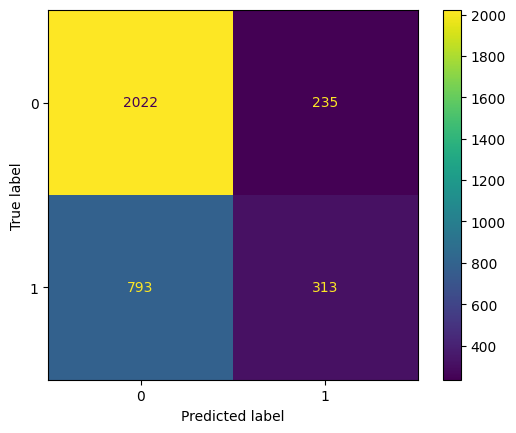

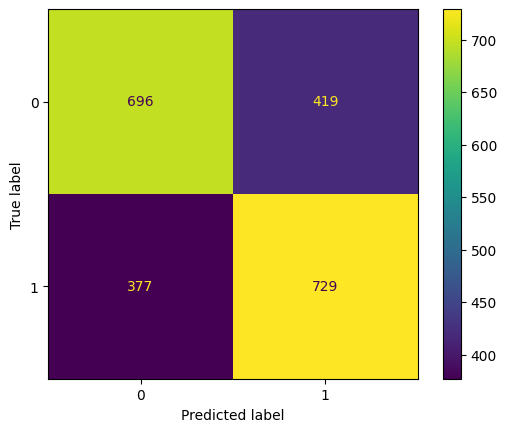

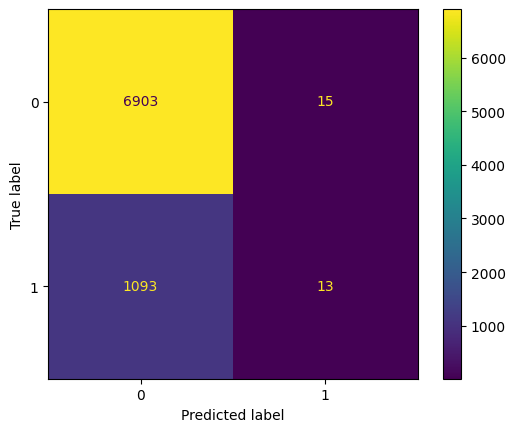

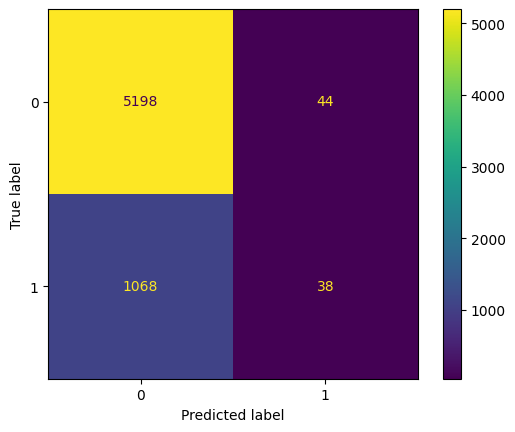

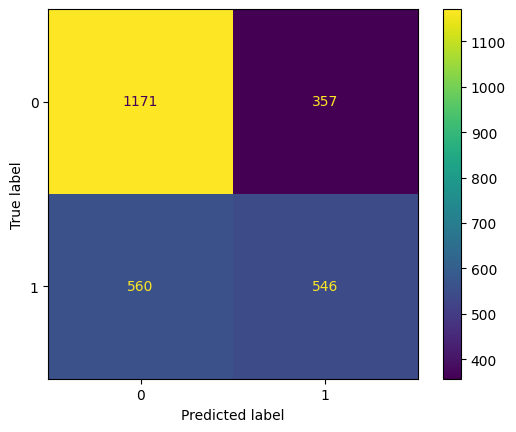

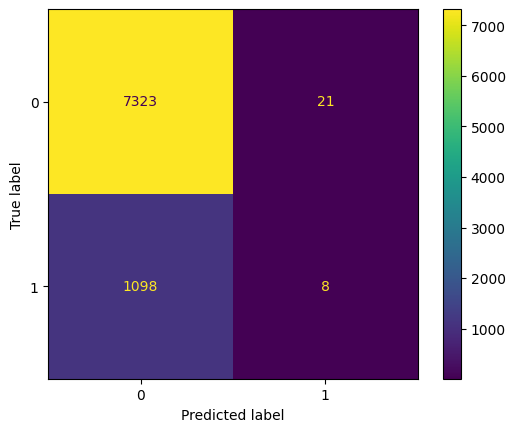

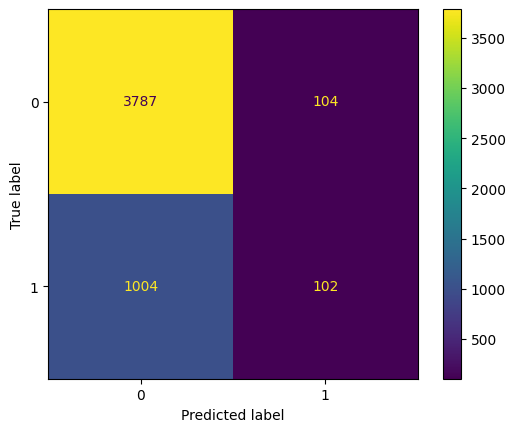

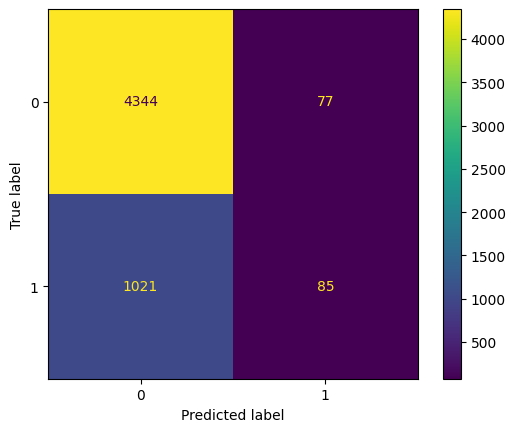

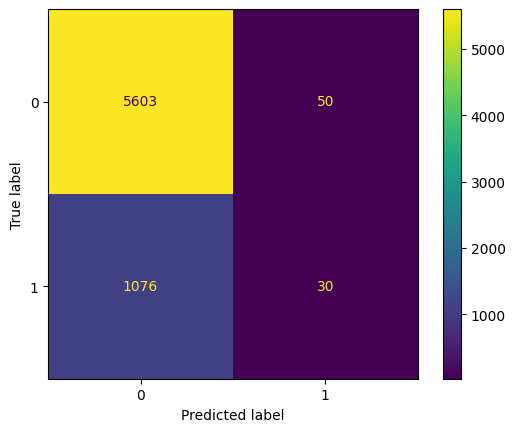

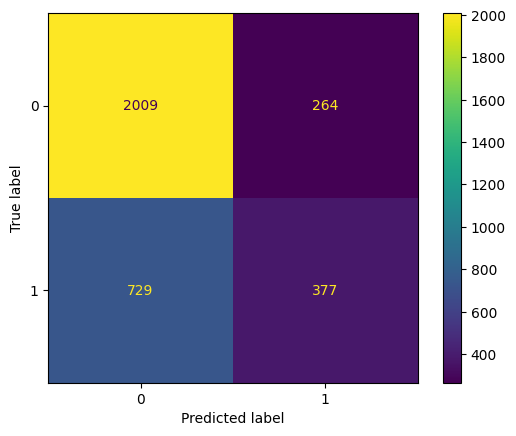

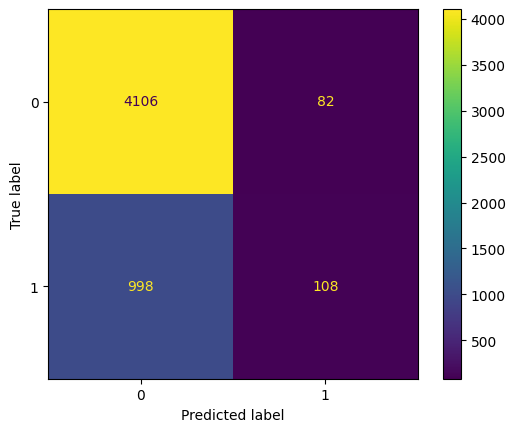

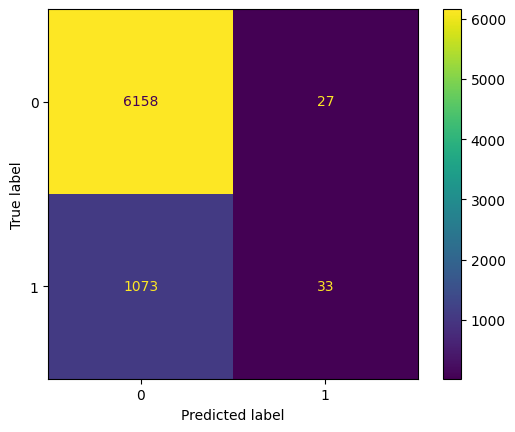

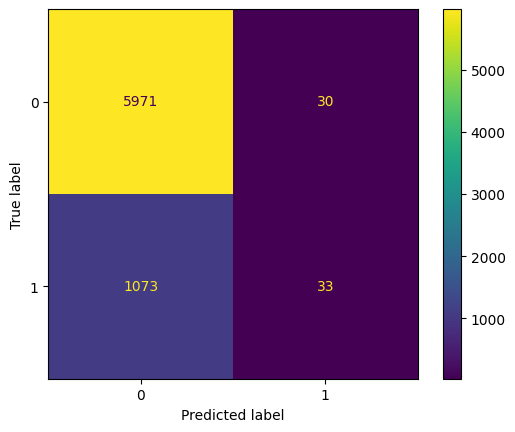

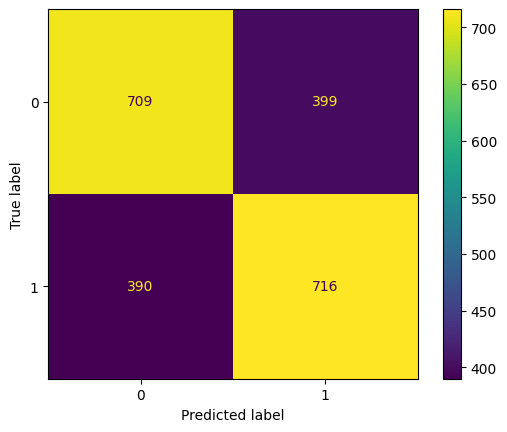

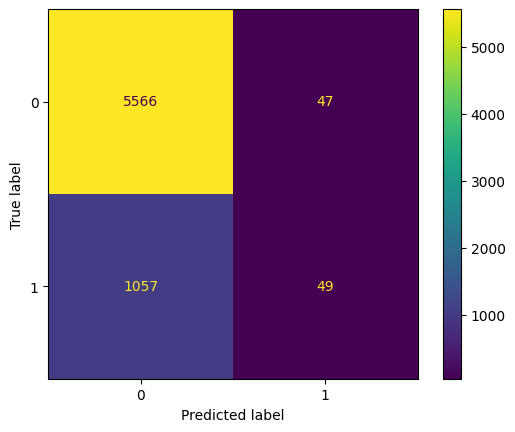

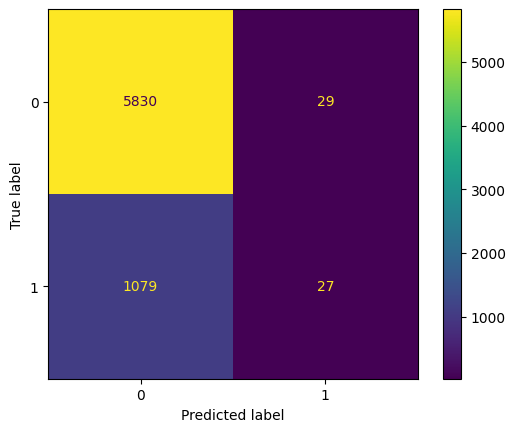

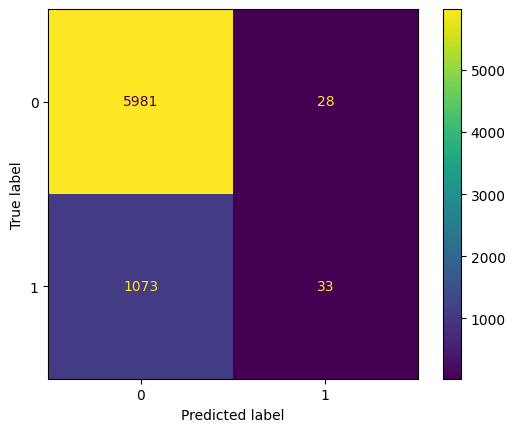

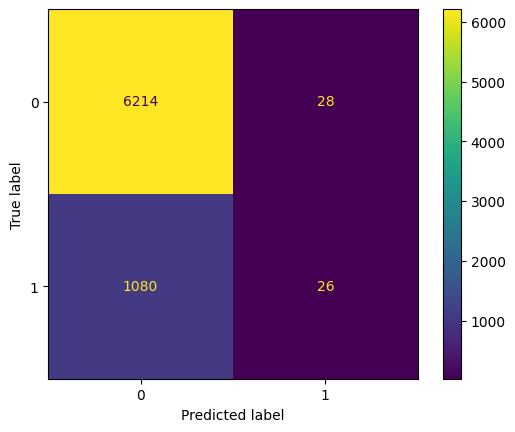

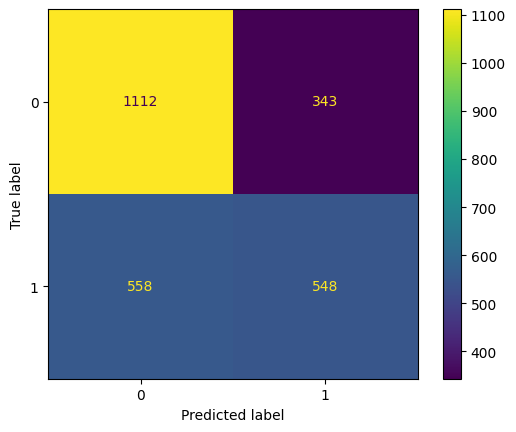

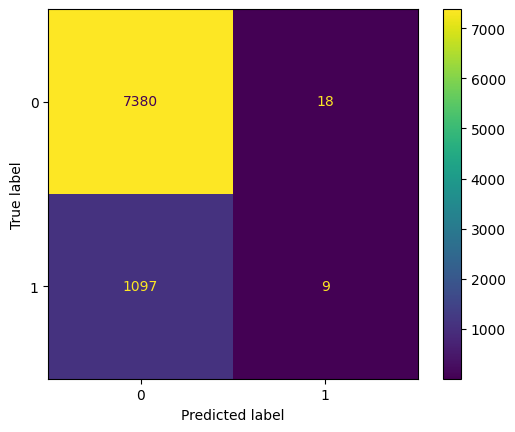

In [ ]:
import os

# 1. Create the save folder if it doesn't exist
os.makedirs("/content/drive/MyDrive/Lending_Club_Data_Analysis/Basemodel_Results/Models", exist_ok=True)

# 2. Train and save models
models = []

for idx, company_data in enumerate(datasets):
    company_name = f"Company{idx+1}"

    # Train model
    model = train_and_save_results(company_data, company_name)

    # Save model
    model_path = f"/content/drive/MyDrive/Lending_Club_Data_Analysis/Basemodel_Results/Models/{company_name}_model.json"
    model.save_model(model_path)

    models.append(model)

    print(f"✅ {company_name} trained and saved!")

print(f"🎯 Finished training and saving {len(models)} models!")


### Summarzie results of splitted Base Models

In [ ]:
import os
import re
import pandas as pd

# Folder where reports are saved
reports_folder = "/content/drive/MyDrive/Lending_Club_Data_Analysis/Basemodel_Results"

# Initialize list to store results
summary_data = []

# Loop through each report file
for file in os.listdir(reports_folder):
    if file.endswith("_classification_report.txt"):
        company_name = file.replace("_classification_report.txt", "")
        with open(os.path.join(reports_folder, file), "r") as f:
            content = f.read()

        # Extract precision, recall, f1-score for each class using regex
        matches = re.findall(r"\n\s*(\d)\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)\s+(\d+)", content)
        if len(matches) == 2:  # Expecting two classes: 0 and 1
            class_0 = [float(x) for x in matches[0][1:4]]
            class_1 = [float(x) for x in matches[1][1:4]]
        else:
            class_0 = class_1 = [None, None, None]

        # Extract accuracy, macro avg, and weighted avg
        acc_match = re.search(r"accuracy\s+([\d.]+)", content)
        macro_match = re.search(r"macro avg\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)", content)
        weighted_match = re.search(r"weighted avg\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)", content)


        accuracy = float(acc_match.group(1)) if acc_match else None
        macro_avg = [float(x) for x in macro_match.groups()] if macro_match else [None, None, None]
        weighted_avg = [float(x) for x in weighted_match.groups()] if weighted_match else [None, None, None]

        summary_data.append({
            "Company": company_name,
            "Class0_Precision": class_0[0],
            "Class0_Recall": class_0[1],
            "Class0_F1": class_0[2],
            "Class1_Precision": class_1[0],
            "Class1_Recall": class_1[1],
            "Class1_F1": class_1[2],
            "Accuracy": accuracy,
            "Macro_Precision": macro_avg[0],
            "Macro_Recall": macro_avg[1],
            "Macro_F1": macro_avg[2],
            "Weighted_Precision": weighted_avg[0],
            "Weighted_Recall": weighted_avg[1],
            "Weighted_F1": weighted_avg[2],
        })

# Convert to DataFrame
summary_df = pd.DataFrame(summary_data)

# Calculate mean of numeric columns
avg_metrics = summary_df.drop(columns=["Company"]).mean().round(3)

# Convert to a new DataFrame for clean display
avg_df = avg_metrics.reset_index()
avg_df.columns = ["Metric", "Average Value"]

# Show average metrics
from IPython.display import display
print("📈 **Average Classification Metrics Across All Companies**")
display(avg_df)

# Optionally: save to CSV
avg_df.to_csv(os.path.join(reports_folder, "average_classification_metrics.csv"), index=False)

# Display the summary DataFrame in Colab
from IPython.display import display
print("📋 Classification Report Summary Across All Companies")
display(summary_df)


# Optionally: save to CSV
summary_df.to_csv(os.path.join(reports_folder, "summary_of_classification_reports.csv"), index=False)


📈 **Average Classification Metrics Across All Companies**


Metric  Average Value
0     Class0_Precision          0.792
1        Class0_Recall          0.924
2            Class0_F1          0.852
3     Class1_Precision          0.512
4        Class1_Recall          0.172
5            Class1_F1          0.208
6             Accuracy          0.784
7      Macro_Precision          0.652
8         Macro_Recall          0.547
9             Macro_F1          0.530
10  Weighted_Precision          0.745
11     Weighted_Recall          0.784
12         Weighted_F1          0.737

📋 Classification Report Summary Across All Companies


Company  Class0_Precision  Class0_Recall  Class0_F1  Class1_Precision  \
0    Company1              0.72           0.90       0.80              0.57   
1    Company2              0.65           0.62       0.64              0.64   
2    Company3              0.86           1.00       0.93              0.46   
3    Company5              0.68           0.77       0.72              0.60   
4    Company4              0.83           0.99       0.90              0.46   
5    Company6              0.87           1.00       0.93              0.28   
6    Company7              0.79           0.97       0.87              0.50   
7    Company8              0.81           0.98       0.89              0.52   
8    Company9              0.84           0.99       0.91              0.38   
9   Company10              0.73           0.88       0.80              0.59   
10  Company11              0.80           0.98       0.88              0.57   
11  Company12              0.85           1.00       0.92              0.55   
12  Company13              0.85           1.00       0.92              0.52   
13  Company14              0.65           0.64       0.64              0.64   
14  Company15              0.84           0.99       0.91              0.51   
15  Company16              0.84           1.00       0.91              0.48   
16  Company17              0.85           1.00       0.92              0.54   
17  Company18              0.85           1.00       0.92              0.48   
18  Company19              0.67           0.76       0.71              0.62   
19  Company20              0.87           1.00       0.93              0.33   

    Class1_Recall  Class1_F1  Accuracy  Macro_Precision  Macro_Recall  \
0            0.28       0.38      0.69             0.64          0.59   
1            0.66       0.65      0.64             0.64          0.64   
2            0.01       0.02      0.86             0.66          0.50   
3            0.49       0.54      0.65             0.64          0.63   
4            0.03       0.06      0.82             0.65          0.51   
5            0.01       0.01      0.87             0.57          0.50   
6            0.09       0.16      0.78             0.64          0.53   
7            0.08       0.13      0.80             0.67          0.53   
8            0.03       0.05      0.83             0.61          0.51   
9            0.34       0.43      0.71             0.66          0.61   
10           0.10       0.17      0.80             0.69          0.54   
11           0.03       0.06      0.85             0.70          0.51   
12           0.03       0.06      0.84             0.69          0.51   
13           0.65       0.64      0.64             0.64          0.64   
14           0.04       0.08      0.84             0.68          0.52   
15           0.02       0.05      0.84             0.66          0.51   
16           0.03       0.06      0.85             0.69          0.51   
17           0.02       0.04      0.85             0.67          0.51   
18           0.50       0.55      0.65             0.64          0.63   
19           0.01       0.02      0.87             0.60          0.50   

    Macro_F1  Weighted_Precision  Weighted_Recall  Weighted_F1  
0       0.59                0.67             0.69         0.66  
1       0.64                0.64             0.64         0.64  
2       0.47                0.81             0.86         0.80  
3       0.63                0.65             0.65         0.65  
4       0.48                0.77             0.82         0.76  
5       0.47                0.79             0.87         0.81  
6       0.51                0.73             0.78         0.71  
7       0.51                0.75             0.80         0.74  
8       0.48                0.76             0.83         0.77  
9       0.62                0.69             0.71         0.68  
10      0.53                0.76             0.80         0.73  
11      0.49                0.81

### Model Performance Summary (Average Across 20 Companies)

- **Class 0 (No Default)**:  
  - High recall (0.92) and precision (0.79) → model performs well on the majority class.
  
- **Class 1 (Default)**:  
  - Low recall (0.17) → most defaults are missed.  
  - Precision is moderate (0.51), but overall F1-score is low (0.21), showing poor predictive power for defaults.

- **Overall**:  
  - The model is biased toward predicting non-defaults due to class imbalance.  
  - Accuracy value is invalid (5) — likely a bug, should be between 0 and 1.



## Federated Learning model

In [ ]:
!pip install flwr flwr-datasets xgboost
!pip install -U "flwr[simulation]"


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.0/540.0 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.0/87.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.0/236.0 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found e

In [ ]:
import flwr as fl
import xgboost as xgb
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from sklearn.model_selection import train_test_split
from flwr.common import (
    FitIns,
    FitRes,
    EvaluateIns,
    EvaluateRes,
    Parameters,
    Status,
    Code,
    Context,
)
from flwr.client import ClientApp, Client
from flwr.server import ServerApp, ServerAppComponents, ServerConfig
from flwr.server.strategy import FedXgbBagging


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import os

# Define folder
folder = "/content/drive/MyDrive/Lending_Club_Data_Analysis/Data_Companies"

# Define number of companies
NUM_COMPANIES = 20  # <<<<<< Adjust here easily!

# Load all company datasets into a list
datasets = []
for i in range(1, NUM_COMPANIES + 1):
    path = os.path.join(folder, f"company{i}_data.csv")
    company_data = pd.read_csv(path)
    datasets.append(company_data)

print(f"✅ Loaded {len(datasets)} company datasets!")

# Simple dataset wrapper
class MyFederatedDataset:
    def __init__(self, datasets):
        self.datasets = datasets

    def load_partition(self, partition_id):
        return self.datasets[partition_id]

# Instantiate
fds = MyFederatedDataset(datasets)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Loaded 20 company datasets!


In [ ]:
class FlowerClientXGBBoost(Client):
    def __init__(self, X_train, y_train, X_val, y_val, num_local_rounds, params):
        self.train_dmatrix = xgb.DMatrix(X_train, label=y_train)
        self.valid_dmatrix = xgb.DMatrix(X_val, label=y_val)
        self.num_train = len(X_train)
        self.num_val = len(X_val)
        self.num_local_rounds = num_local_rounds
        self.params = params

    def _local_boost(self, bst_input):
        for _ in range(self.num_local_rounds):
            bst_input.update(self.train_dmatrix, bst_input.num_boosted_rounds())

        bst = bst_input[
            bst_input.num_boosted_rounds() - self.num_local_rounds : bst_input.num_boosted_rounds()
        ]
        return bst

    def fit(self, ins: FitIns) -> FitRes:
        global_round = int(ins.config.get("global_round", 1))

        if global_round == 1:
            bst = xgb.train(
                self.params,
                self.train_dmatrix,
                num_boost_round=self.num_local_rounds,
                evals=[(self.valid_dmatrix, "valid"), (self.train_dmatrix, "train")],
                verbose_eval=False,
            )
        else:
            bst = xgb.Booster(params=self.params)
            global_model = bytearray(ins.parameters.tensors[0])
            bst.load_model(global_model)
            bst = self._local_boost(bst)

        local_model_bytes = bytes(bst.save_raw("json"))

        return FitRes(
            status=Status(code=Code.OK, message="OK"),
            parameters=Parameters(tensor_type="bytes", tensors=[local_model_bytes]),
            num_examples=self.num_train,
            metrics={},
        )

    def evaluate(self, ins: EvaluateIns) -> EvaluateRes:
        bst = xgb.Booster(params=self.params)
        global_model = bytearray(ins.parameters.tensors[0])
        bst.load_model(global_model)

        preds = bst.predict(self.valid_dmatrix)
        preds_binary = (preds > 0.5).astype(int)
        labels = self.valid_dmatrix.get_label()
        accuracy = (preds_binary == labels).mean()

        return EvaluateRes(
            status=Status(code=Code.OK, message="OK"),
            loss=1 - accuracy,
            num_examples=self.num_val,
            metrics={"accuracy": accuracy},
        )


In [ ]:
def client_fn(context: Context):
    partition_id = int(context.node_config["partition-id"])
    partition = fds.load_partition(partition_id)

    # Extract features and labels
    X = partition.drop(columns=["loan_status"])
    y = partition["loan_status"]

    # Train/validation split
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.1, random_state=42, stratify=y
    )

    num_local_rounds = int(context.run_config.get("local_epochs", 1))

    # Create params dictionary
    params = {
        "objective": "binary:logistic",
        "learning_rate": 0.1,
        "max_depth": 6,
        "eval_metric": "logloss",
    }



    return FlowerClientXGBBoost(
        X_train, y_train, X_val, y_val, num_local_rounds, params
    ).to_client()

# Create ClientApp
client_app = ClientApp(client_fn=client_fn)


In [ ]:
def evaluate_metrics_aggregation(eval_metrics):
    total_num = sum([num for num, _ in eval_metrics])
    accuracy_aggregated = sum([metrics["accuracy"] * num for num, metrics in eval_metrics]) / total_num
    return {"accuracy": accuracy_aggregated}

def config_func(rnd: int) -> Dict[str, str]:
    return {"global_round": str(rnd)}

def server_fn(context: Context):
    num_rounds = context.run_config.get("num-server-rounds", 20)
    fraction_fit = context.run_config.get("fraction-fit", 1.0)
    fraction_evaluate = context.run_config.get("fraction-evaluate", 1.0)

    parameters = Parameters(tensor_type="", tensors=[])

    strategy = FedXgbBagging(
        fraction_fit=fraction_fit,
        fraction_evaluate=fraction_evaluate,
        evaluate_metrics_aggregation_fn=evaluate_metrics_aggregation,
        on_fit_config_fn=config_func,
        on_evaluate_config_fn=config_func,
        initial_parameters=parameters,
    )

    config = ServerConfig(num_rounds=num_rounds)
    return ServerAppComponents(strategy=strategy, config=config)

server_app = ServerApp(server_fn=server_fn)


In [ ]:
# 1. Run the simulation
from flwr.simulation import run_simulation

run_simulation(
    server_app=server_app,
    client_app=client_app,
    num_supernodes=NUM_COMPANIES,
)

DEBUG:flwr:Asyncio event loop already running.
INFO :      Starting Flower ServerApp, config: num_rounds=20, no round_timeout
INFO :      
INFO :      [INIT]
INFO :      Using initial global parameters provided by strategy
INFO :      Starting evaluation of initial global parameters
INFO :      Evaluation returned no results (`None`)
INFO :      
INFO :      [ROUND 1]
INFO :      configure_fit: strategy sampled 20 clients (out of 20)
(pid=51160) 2025-05-01 12:47:36.442092: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(pid=51160) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(pid=51160) E0000 00:00:1746103656.473913   51160 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
(pid=51160) E0000 00:00:1746103656.483752   51160 cuda

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# 1. Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 2. Define save folder
save_folder = "/content/drive/MyDrive/Lending_Club_Data_Analysis/Federated_Results"
os.makedirs(save_folder, exist_ok=True)

# 3. Load the final global model from Flower ServerApp
global_model_bytes = server_app._strategy.global_model  # Correct way to get global model
global_model = xgb.Booster()
global_model.load_model(bytearray(global_model_bytes))

# === Save Global Model to Google Drive
global_model_path = os.path.join(save_folder, "global_model.xgb")
global_model.save_model(global_model_path)

# 4. Load all company datasets dynamically
data_folder = '/content/drive/MyDrive/Lending_Club_Data_Analysis/Data_Companies'
NUM_COMPANIES = 20  # <<<<<< Easily adjustable!

company_paths = [os.path.join(data_folder, f"company{i}_data.csv") for i in range(1, NUM_COMPANIES + 1)]

# 5. Predict and evaluate for each company
for idx, path in enumerate(company_paths):
    company_name = f"Company{idx+1}"

    # Load data
    data = pd.read_csv(path)
    data = data.dropna()  # Drop NaNs if any

    # Features and labels
    X = data.drop(columns=["loan_status"])
    y = data["loan_status"]

    # Small validation split (10%)
    _, X_val, _, y_val = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

    # DMatrix for XGBoost
    dval = xgb.DMatrix(X_val)

    # Predict
    preds = global_model.predict(dval)
    y_pred = (preds > 0.5).astype(int)

    # Confusion Matrix
    cm = confusion_matrix(y_val, y_pred)

    # Classification Report (string format)
    classif_report = classification_report(y_val, y_pred, target_names=["Non-Default", "Default"])

    # === Print to screen
    print(f"=== Classification Report for {company_name} ===")
    print(classif_report)

    # === Save Classification Report to TXT
    report_path = os.path.join(save_folder, f"{company_name}_classification_report.txt")
    with open(report_path, "w") as f:
        f.write(f"=== Classification Report for {company_name} ===\n\n")
        f.write(classif_report)

    # === Save Confusion Matrix as Heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Non-Default", "Default"],
                yticklabels=["Non-Default", "Default"])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {company_name}')
    plt.tight_layout()
    cm_path = os.path.join(save_folder, f"{company_name}_confusion_matrix.png")
    plt.savefig(cm_path)
    plt.close()

    print(f"✅ {company_name}: Results saved to Google Drive.\n")

print("All companies evaluated and results saved!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:51:58] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


=== Classification Report for Company1 ===
              precision    recall  f1-score   support

 Non-Default       0.75      0.78      0.76      2169
     Default       0.51      0.48      0.49      1080

    accuracy                           0.68      3249
   macro avg       0.63      0.63      0.63      3249
weighted avg       0.67      0.68      0.67      3249

✅ Company1: Results saved to Google Drive.

=== Classification Report for Company2 ===
              precision    recall  f1-score   support

 Non-Default       0.59      0.78      0.67      1075
     Default       0.68      0.46      0.55      1075

    accuracy                           0.62      2150
   macro avg       0.63      0.62      0.61      2150
weighted avg       0.63      0.62      0.61      2150

✅ Company2: Results saved to Google Drive.

=== Classification Report for Company3 ===
              precision    recall  f1-score   support

 Non-Default       0.90      0.78      0.84      6652
     Default       0

### Summarize results

In [ ]:
import os
import re
import pandas as pd
from IPython.display import display

# Folder where reports are saved
reports_folder = "/content/drive/MyDrive/Lending_Club_Data_Analysis/Federated_Results"

# Initialize list to store results
summary_data = []

# Loop through each report file
for file in os.listdir(reports_folder):
    if file.endswith("_classification_report.txt"):
        company_name = file.replace("_classification_report.txt", "")
        with open(os.path.join(reports_folder, file), "r") as f:
            content = f.read()

        # Extract precision, recall, f1-score for class labels (Non-Default, Default)
        matches = re.findall(r"\n\s*(Non-Default|Default)\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)\s+(\d+)", content)
        if len(matches) == 2:
            class_0 = [float(x) for x in matches[0][1:4]]  # Non-Default
            class_1 = [float(x) for x in matches[1][1:4]]  # Default
        else:
            class_0 = class_1 = [None, None, None]

        # Extract accuracy, macro avg, and weighted avg
        acc_match = re.search(r"accuracy\s+([\d.]+)", content)
        macro_match = re.search(r"macro avg\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)", content)
        weighted_match = re.search(r"weighted avg\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)", content)


        accuracy = float(acc_match.group(1)) if acc_match else None
        macro_avg = [float(x) for x in macro_match.groups()] if macro_match else [None, None, None]
        weighted_avg = [float(x) for x in weighted_match.groups()] if weighted_match else [None, None, None]

        summary_data.append({
            "Company": company_name,
            "Class0_Precision": class_0[0],
            "Class0_Recall": class_0[1],
            "Class0_F1": class_0[2],
            "Class1_Precision": class_1[0],
            "Class1_Recall": class_1[1],
            "Class1_F1": class_1[2],
            "Accuracy": accuracy,
            "Macro_Precision": macro_avg[0],
            "Macro_Recall": macro_avg[1],
            "Macro_F1": macro_avg[2],
            "Weighted_Precision": weighted_avg[0],
            "Weighted_Recall": weighted_avg[1],
            "Weighted_F1": weighted_avg[2],
        })

# Convert to DataFrame
summary_df = pd.DataFrame(summary_data)

# Calculate average metrics across all companies
avg_metrics = summary_df.drop(columns=["Company"]).mean().round(3)
avg_df = avg_metrics.reset_index()
avg_df.columns = ["Metric", "Average Value"]

# Display average metrics
print("📈 **Average Classification Metrics Across All Companies**")
display(avg_df)

# Save average metrics to CSV
avg_df.to_csv(os.path.join(reports_folder, "average_classification_metrics_federated.csv"), index=False)

# Display summary table of all companies
print("📋 Classification Report Summary Across All Companies")
display(summary_df)

# Save summary table to CSV
summary_df.to_csv(os.path.join(reports_folder, "summary_of_classification_reports_federated.csv"), index=False)


📈 **Average Classification Metrics Across All Companies**


Metric  Average Value
0     Class0_Precision          0.816
1        Class0_Recall          0.781
2            Class0_F1          0.794
3     Class1_Precision          0.389
4        Class1_Recall          0.466
5            Class1_F1          0.410
6             Accuracy          0.705
7      Macro_Precision          0.603
8         Macro_Recall          0.624
9             Macro_F1          0.602
10  Weighted_Precision          0.743
11     Weighted_Recall          0.705
12         Weighted_F1          0.718

📋 Classification Report Summary Across All Companies


Company  Class0_Precision  Class0_Recall  Class0_F1  Class1_Precision  \
0    Company1              0.75           0.78       0.76              0.51   
1    Company2              0.59           0.78       0.67              0.68   
2    Company4              0.87           0.77       0.82              0.30   
3    Company3              0.90           0.78       0.84              0.25   
4    Company5              0.67           0.78       0.72              0.61   
5    Company6              0.90           0.78       0.84              0.24   
6    Company7              0.83           0.78       0.81              0.38   
7    Company8              0.86           0.78       0.82              0.36   
8   Company10              0.74           0.79       0.76              0.50   
9    Company9              0.88           0.78       0.82              0.29   
10  Company11              0.84           0.78       0.81              0.36   
11  Company12              0.89           0.78       0.83              0.28   
12  Company13              0.89           0.78       0.83              0.29   
13  Company14              0.60           0.78       0.68              0.69   
14  Company15              0.88           0.79       0.83              0.30   
15  Company16              0.88           0.79       0.83              0.29   
16  Company17              0.89           0.78       0.83              0.29   
17  Company18              0.89           0.78       0.83              0.29   
18  Company19              0.66           0.78       0.72              0.63   
19  Company20              0.91           0.78       0.84              0.24   

    Class1_Recall  Class1_F1  Accuracy  Macro_Precision  Macro_Recall  \
0            0.48       0.49      0.68             0.63          0.63   
1            0.46       0.55      0.62             0.63          0.62   
2            0.46       0.36      0.72             0.59          0.62   
3            0.46       0.33      0.74             0.58          0.62   
4            0.48       0.54      0.65             0.64          0.63   
5            0.46       0.32      0.74             0.57          0.62   
6            0.46       0.41      0.71             0.61          0.62   
7            0.48       0.41      0.72             0.61          0.63   
8            0.43       0.47      0.67             0.62          0.61   
9            0.45       0.35      0.72             0.58          0.61   
10           0.45       0.40      0.71             0.60          0.62   
11           0.48       0.35      0.73             0.59          0.63   
12           0.47       0.36      0.73             0.59          0.63   
13           0.48       0.56      0.63             0.64          0.63   
14           0.46       0.37      0.73             0.59          0.63   
15           0.45       0.35      0.73             0.59          0.62   
16           0.48       0.36      0.73             0.59          0.63   
17           0.49       0.36      0.74             0.59          0.63   
18           0.47       0.54      0.65             0.64          0.63   
19           0.46       0.32      0.74             0.58          0.62   

    Macro_F1  Weighted_Precision  Weighted_Recall  Weighted_F1  
0       0.63                0.67             0.68         0.67  
1       0.61                0.63             0.62         0.61  
2       0.59                0.77             0.72         0.74  
3       0.58                0.81             0.74         0.76  
4       0.63                0.64             0.65         0.64  
5       0.58                0.82             0.74         0.77  
6       0.61                0.73             0.71         0.72  
7       0.62                0.76             0.72         0.74  
8       0.61                0.66             0.67         0.66  
9       0.59                0.78             0.72         0.75  
10      0.60                0.74             0.71         0.72  
11      0.59                0.80

### Average Classification Metrics Across All Companies

- **Class 0 (Non-Default)**:
  - Precision: 0.82, Recall: 0.78, F1-score: 0.79 → strong performance on the majority class.

- **Class 1 (Default)**:
  - Precision: 0.39, Recall: 0.47, F1-score: 0.41 → moderate performance, but room for improvement in catching defaults.

- **Overall**:
  - Macro F1-score: 0.60 → balanced view across both classes.
  - Weighted F1-score: 0.72 → good performance but influenced by class imbalance.
  



## Synthetic Data Generation

Drop all Columns that have only one value. This happens with the dummies if for example one data set has no entry of a specific state.

In [ ]:
# 1. Install the SDV library (only once)
!pip install sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.9/157.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 71.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.4/193.4 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 79.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.8/84.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Loaded 20 company datasets!
🔵 Processing Company_1
📂 Found existing synthetic data for Company_1. Loading it...


<ipython-input-2-ed55fa683947>:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  X = X.apply(pd.to_numeric, errors='ignore')


=== Augmented (Real + Synthetic) Classification Report for Company_1 ===
              precision    recall  f1-score   support

           0       0.79      0.96      0.87      5694
           1       0.61      0.18      0.28      1800

    accuracy                           0.78      7494
   macro avg       0.70      0.57      0.58      7494
weighted avg       0.75      0.78      0.73      7494

✅ Augmented model results saved for Company_1!

💾 Model saved to /content/drive/MyDrive/Lending_Club_Data_Analysis/Synthetic_Results_CTGAN/Models/Company_1_augmented_model.json
🔵 Processing Company_2
📂 Found existing synthetic data for Company_2. Loading it...


<ipython-input-2-ed55fa683947>:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  X = X.apply(pd.to_numeric, errors='ignore')


=== Augmented (Real + Synthetic) Classification Report for Company_2 ===
              precision    recall  f1-score   support

           0       0.74      0.88      0.80      3303
           1       0.65      0.42      0.51      1792

    accuracy                           0.72      5095
   macro avg       0.69      0.65      0.65      5095
weighted avg       0.71      0.72      0.70      5095

✅ Augmented model results saved for Company_2!

💾 Model saved to /content/drive/MyDrive/Lending_Club_Data_Analysis/Synthetic_Results_CTGAN/Models/Company_2_augmented_model.json
🔵 Processing Company_3
📂 Found existing synthetic data for Company_3. Loading it...


<ipython-input-2-ed55fa683947>:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  X = X.apply(pd.to_numeric, errors='ignore')


=== Augmented (Real + Synthetic) Classification Report for Company_3 ===
              precision    recall  f1-score   support

           0       0.71      0.98      0.82     12199
           1       0.48      0.05      0.09      5091

    accuracy                           0.70     17290
   macro avg       0.60      0.51      0.46     17290
weighted avg       0.64      0.70      0.61     17290

✅ Augmented model results saved for Company_3!

💾 Model saved to /content/drive/MyDrive/Lending_Club_Data_Analysis/Synthetic_Results_CTGAN/Models/Company_3_augmented_model.json
🔵 Processing Company_4
📂 Found existing synthetic data for Company_4. Loading it...


<ipython-input-2-ed55fa683947>:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  X = X.apply(pd.to_numeric, errors='ignore')


=== Augmented (Real + Synthetic) Classification Report for Company_4 ===
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     11271
           1       0.54      0.01      0.03      2497

    accuracy                           0.82     13768
   macro avg       0.68      0.51      0.46     13768
weighted avg       0.77      0.82      0.74     13768

✅ Augmented model results saved for Company_4!

💾 Model saved to /content/drive/MyDrive/Lending_Club_Data_Analysis/Synthetic_Results_CTGAN/Models/Company_4_augmented_model.json
🔵 Processing Company_5
📂 Found existing synthetic data for Company_5. Loading it...


<ipython-input-2-ed55fa683947>:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  X = X.apply(pd.to_numeric, errors='ignore')


=== Augmented (Real + Synthetic) Classification Report for Company_5 ===
              precision    recall  f1-score   support

           0       0.63      0.51      0.56      3064
           1       0.57      0.68      0.62      2899

    accuracy                           0.59      5963
   macro avg       0.60      0.59      0.59      5963
weighted avg       0.60      0.59      0.59      5963

✅ Augmented model results saved for Company_5!

💾 Model saved to /content/drive/MyDrive/Lending_Club_Data_Analysis/Synthetic_Results_CTGAN/Models/Company_5_augmented_model.json
🔵 Processing Company_6
📂 Found existing synthetic data for Company_6. Loading it...


<ipython-input-2-ed55fa683947>:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  X = X.apply(pd.to_numeric, errors='ignore')


=== Augmented (Real + Synthetic) Classification Report for Company_6 ===
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     16648
           1       0.37      0.01      0.01      1535

    accuracy                           0.92     18183
   macro avg       0.64      0.50      0.48     18183
weighted avg       0.87      0.92      0.88     18183

✅ Augmented model results saved for Company_6!

💾 Model saved to /content/drive/MyDrive/Lending_Club_Data_Analysis/Synthetic_Results_CTGAN/Models/Company_6_augmented_model.json
🔵 Processing Company_7
📂 Found existing synthetic data for Company_7. Loading it...


<ipython-input-2-ed55fa683947>:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  X = X.apply(pd.to_numeric, errors='ignore')


=== Augmented (Real + Synthetic) Classification Report for Company_7 ===
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      9187
           1       0.54      0.08      0.14      1741

    accuracy                           0.84     10928
   macro avg       0.70      0.53      0.53     10928
weighted avg       0.80      0.84      0.79     10928

✅ Augmented model results saved for Company_7!

💾 Model saved to /content/drive/MyDrive/Lending_Club_Data_Analysis/Synthetic_Results_CTGAN/Models/Company_7_augmented_model.json
🔵 Processing Company_8
📂 Found existing synthetic data for Company_8. Loading it...


<ipython-input-2-ed55fa683947>:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  X = X.apply(pd.to_numeric, errors='ignore')


=== Augmented (Real + Synthetic) Classification Report for Company_8 ===
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     14144
           1       0.54      0.06      0.10      1547

    accuracy                           0.90     15691
   macro avg       0.72      0.53      0.53     15691
weighted avg       0.87      0.90      0.86     15691

✅ Augmented model results saved for Company_8!

💾 Model saved to /content/drive/MyDrive/Lending_Club_Data_Analysis/Synthetic_Results_CTGAN/Models/Company_8_augmented_model.json
🔵 Processing Company_9
📂 Found existing synthetic data for Company_9. Loading it...


<ipython-input-2-ed55fa683947>:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  X = X.apply(pd.to_numeric, errors='ignore')


=== Augmented (Real + Synthetic) Classification Report for Company_9 ===
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     11606
           1       0.37      0.01      0.03      1668

    accuracy                           0.87     13274
   macro avg       0.62      0.51      0.48     13274
weighted avg       0.81      0.87      0.82     13274

✅ Augmented model results saved for Company_9!

💾 Model saved to /content/drive/MyDrive/Lending_Club_Data_Analysis/Synthetic_Results_CTGAN/Models/Company_9_augmented_model.json
🔵 Processing Company_10
📂 Found existing synthetic data for Company_10. Loading it...


<ipython-input-2-ed55fa683947>:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  X = X.apply(pd.to_numeric, errors='ignore')


=== Augmented (Real + Synthetic) Classification Report for Company_10 ===
              precision    recall  f1-score   support

           0       0.81      0.97      0.89      8921
           1       0.59      0.15      0.24      2331

    accuracy                           0.80     11252
   macro avg       0.70      0.56      0.56     11252
weighted avg       0.77      0.80      0.75     11252

✅ Augmented model results saved for Company_10!

💾 Model saved to /content/drive/MyDrive/Lending_Club_Data_Analysis/Synthetic_Results_CTGAN/Models/Company_10_augmented_model.json
🔵 Processing Company_11
📂 Found existing synthetic data for Company_11. Loading it...


<ipython-input-2-ed55fa683947>:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  X = X.apply(pd.to_numeric, errors='ignore')


=== Augmented (Real + Synthetic) Classification Report for Company_11 ===
              precision    recall  f1-score   support

           0       0.78      0.72      0.75      6053
           1       0.56      0.63      0.59      3391

    accuracy                           0.69      9444
   macro avg       0.67      0.67      0.67      9444
weighted avg       0.70      0.69      0.69      9444

✅ Augmented model results saved for Company_11!

💾 Model saved to /content/drive/MyDrive/Lending_Club_Data_Analysis/Synthetic_Results_CTGAN/Models/Company_11_augmented_model.json
🔵 Processing Company_12
📂 Found existing synthetic data for Company_12. Loading it...


<ipython-input-2-ed55fa683947>:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  X = X.apply(pd.to_numeric, errors='ignore')


=== Augmented (Real + Synthetic) Classification Report for Company_12 ===
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     11865
           1       0.55      0.02      0.04      1685

    accuracy                           0.88     13550
   macro avg       0.71      0.51      0.49     13550
weighted avg       0.84      0.88      0.82     13550

✅ Augmented model results saved for Company_12!

💾 Model saved to /content/drive/MyDrive/Lending_Club_Data_Analysis/Synthetic_Results_CTGAN/Models/Company_12_augmented_model.json
🔵 Processing Company_13
📂 Found existing synthetic data for Company_13. Loading it...


<ipython-input-2-ed55fa683947>:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  X = X.apply(pd.to_numeric, errors='ignore')


=== Augmented (Real + Synthetic) Classification Report for Company_13 ===
              precision    recall  f1-score   support

           0       0.84      1.00      0.91     12993
           1       0.49      0.01      0.02      2572

    accuracy                           0.83     15565
   macro avg       0.66      0.50      0.47     15565
weighted avg       0.78      0.83      0.76     15565

✅ Augmented model results saved for Company_13!

💾 Model saved to /content/drive/MyDrive/Lending_Club_Data_Analysis/Synthetic_Results_CTGAN/Models/Company_13_augmented_model.json
🔵 Processing Company_14
📂 Found existing synthetic data for Company_14. Loading it...


<ipython-input-2-ed55fa683947>:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  X = X.apply(pd.to_numeric, errors='ignore')


=== Augmented (Real + Synthetic) Classification Report for Company_14 ===
              precision    recall  f1-score   support

           0       0.56      0.75      0.64      5478
           1       0.57      0.36      0.44      4992

    accuracy                           0.56     10470
   macro avg       0.56      0.55      0.54     10470
weighted avg       0.56      0.56      0.54     10470

✅ Augmented model results saved for Company_14!

💾 Model saved to /content/drive/MyDrive/Lending_Club_Data_Analysis/Synthetic_Results_CTGAN/Models/Company_14_augmented_model.json
🔵 Processing Company_15
📂 Found existing synthetic data for Company_15. Loading it...


<ipython-input-2-ed55fa683947>:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  X = X.apply(pd.to_numeric, errors='ignore')


=== Augmented (Real + Synthetic) Classification Report for Company_15 ===
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      6949
           1       0.55      0.48      0.51      2636

    accuracy                           0.75      9585
   macro avg       0.68      0.67      0.67      9585
weighted avg       0.74      0.75      0.74      9585

✅ Augmented model results saved for Company_15!

💾 Model saved to /content/drive/MyDrive/Lending_Club_Data_Analysis/Synthetic_Results_CTGAN/Models/Company_15_augmented_model.json
🔵 Processing Company_16
📂 Found existing synthetic data for Company_16. Loading it...


<ipython-input-2-ed55fa683947>:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  X = X.apply(pd.to_numeric, errors='ignore')


=== Augmented (Real + Synthetic) Classification Report for Company_16 ===
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     12223
           1       0.61      0.01      0.02      2570

    accuracy                           0.83     14793
   macro avg       0.72      0.50      0.46     14793
weighted avg       0.79      0.83      0.75     14793

✅ Augmented model results saved for Company_16!

💾 Model saved to /content/drive/MyDrive/Lending_Club_Data_Analysis/Synthetic_Results_CTGAN/Models/Company_16_augmented_model.json
🔵 Processing Company_17
📂 Found existing synthetic data for Company_17. Loading it...


<ipython-input-2-ed55fa683947>:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  X = X.apply(pd.to_numeric, errors='ignore')


=== Augmented (Real + Synthetic) Classification Report for Company_17 ===
              precision    recall  f1-score   support

           0       0.81      1.00      0.89     12270
           1       0.43      0.01      0.01      2944

    accuracy                           0.81     15214
   macro avg       0.62      0.50      0.45     15214
weighted avg       0.73      0.81      0.72     15214

✅ Augmented model results saved for Company_17!

💾 Model saved to /content/drive/MyDrive/Lending_Club_Data_Analysis/Synthetic_Results_CTGAN/Models/Company_17_augmented_model.json
🔵 Processing Company_18
📂 Found existing synthetic data for Company_18. Loading it...


<ipython-input-2-ed55fa683947>:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  X = X.apply(pd.to_numeric, errors='ignore')


=== Augmented (Real + Synthetic) Classification Report for Company_18 ===
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     13659
           1       0.45      0.01      0.02      1954

    accuracy                           0.87     15613
   macro avg       0.66      0.50      0.48     15613
weighted avg       0.82      0.87      0.82     15613

✅ Augmented model results saved for Company_18!

💾 Model saved to /content/drive/MyDrive/Lending_Club_Data_Analysis/Synthetic_Results_CTGAN/Models/Company_18_augmented_model.json
🔵 Processing Company_19
📂 Found existing synthetic data for Company_19. Loading it...


<ipython-input-2-ed55fa683947>:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  X = X.apply(pd.to_numeric, errors='ignore')


=== Augmented (Real + Synthetic) Classification Report for Company_19 ===
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      9610
           1       0.60      0.39      0.47      1472

    accuracy                           0.88     11082
   macro avg       0.76      0.67      0.70     11082
weighted avg       0.87      0.88      0.87     11082

✅ Augmented model results saved for Company_19!

💾 Model saved to /content/drive/MyDrive/Lending_Club_Data_Analysis/Synthetic_Results_CTGAN/Models/Company_19_augmented_model.json
🔵 Processing Company_20
📂 Found existing synthetic data for Company_20. Loading it...


<ipython-input-2-ed55fa683947>:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  X = X.apply(pd.to_numeric, errors='ignore')


=== Augmented (Real + Synthetic) Classification Report for Company_20 ===
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      9131
           1       0.52      0.18      0.26      2622

    accuracy                           0.78     11753
   macro avg       0.66      0.56      0.57     11753
weighted avg       0.74      0.78      0.74     11753



<ipython-input-2-ed55fa683947>:146: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(6,6))


✅ Augmented model results saved for Company_20!

💾 Model saved to /content/drive/MyDrive/Lending_Club_Data_Analysis/Synthetic_Results_CTGAN/Models/Company_20_augmented_model.json


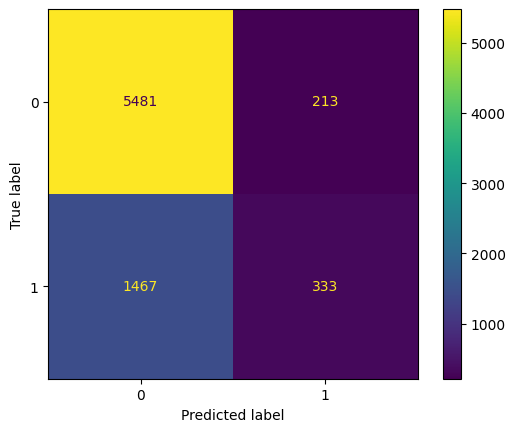

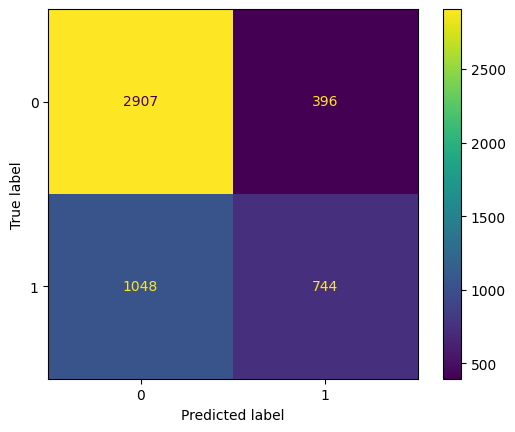

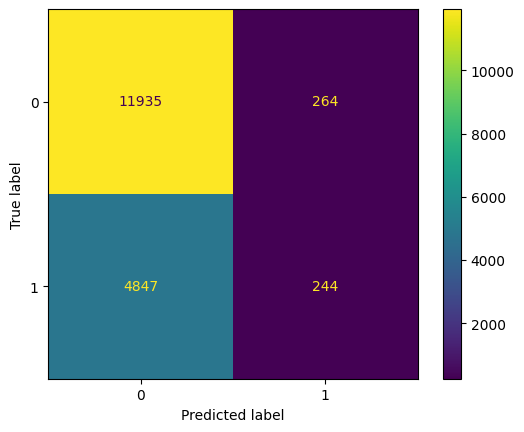

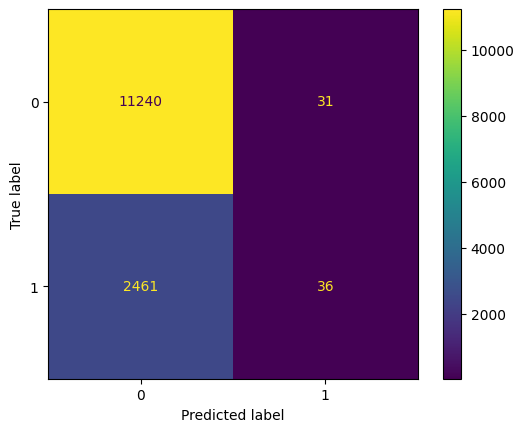

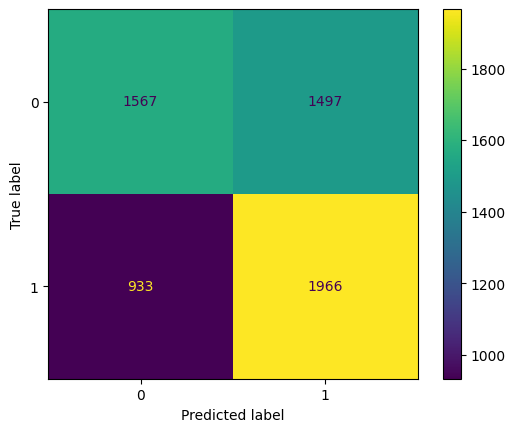

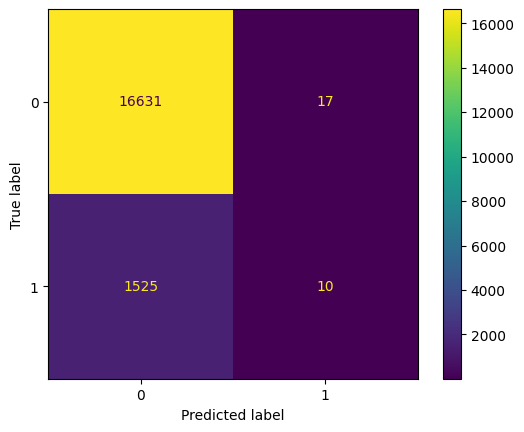

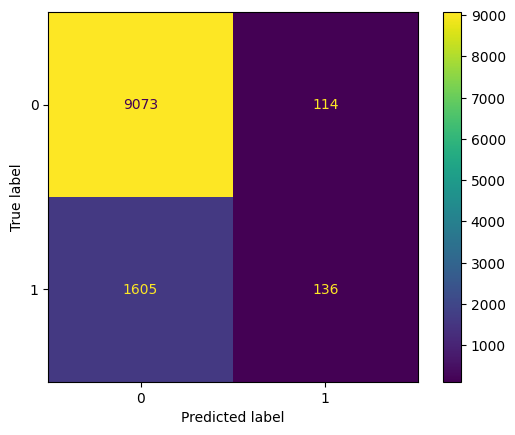

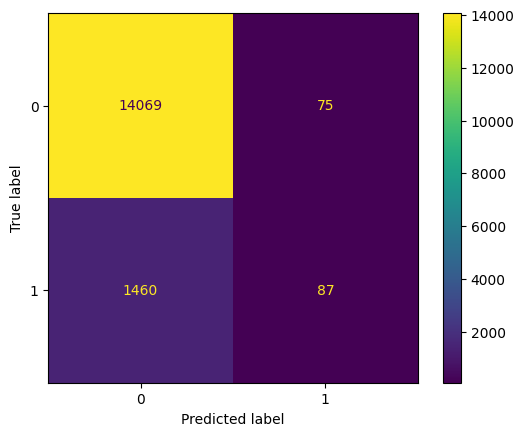

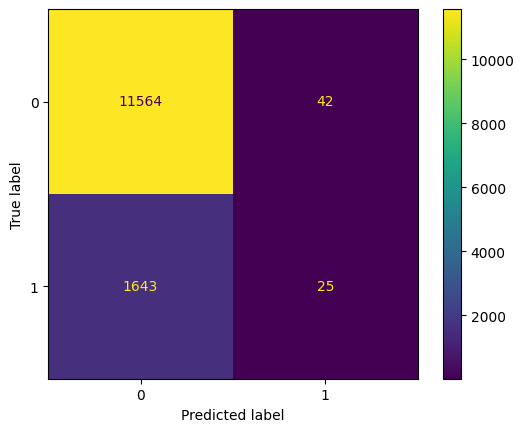

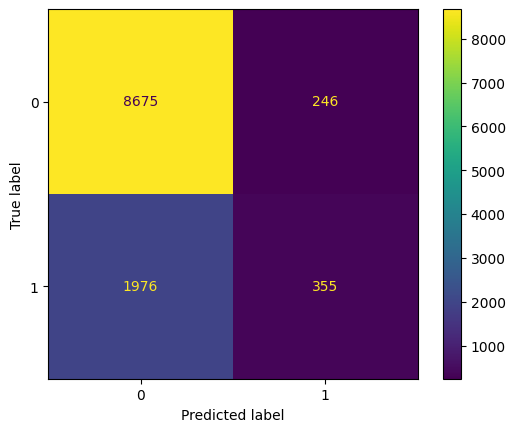

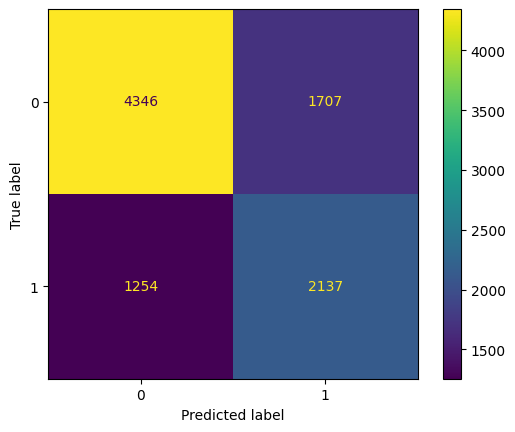

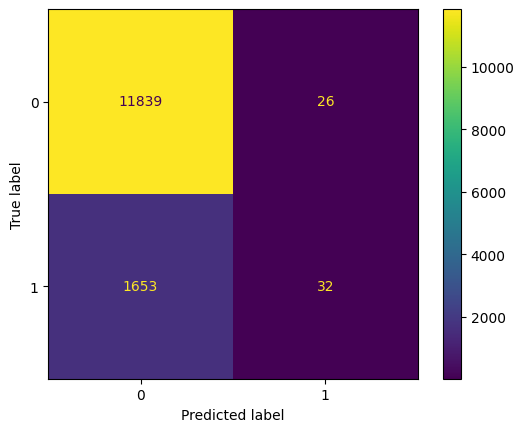

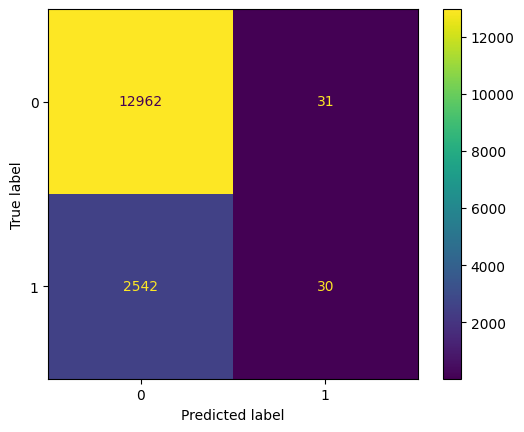

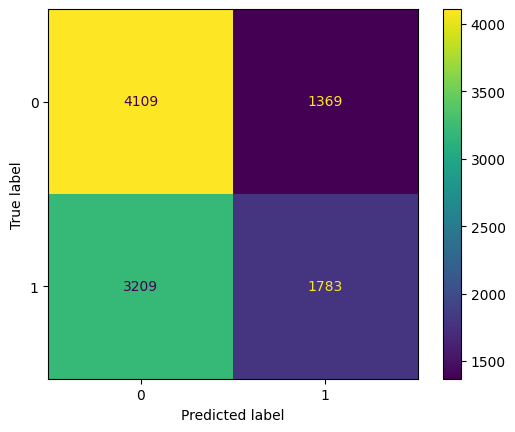

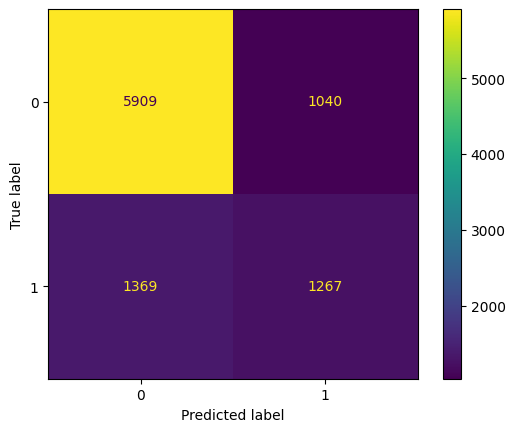

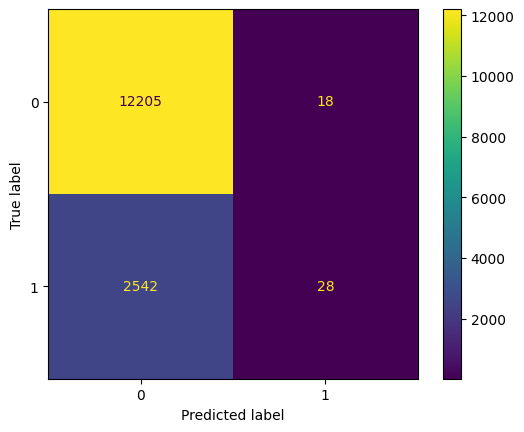

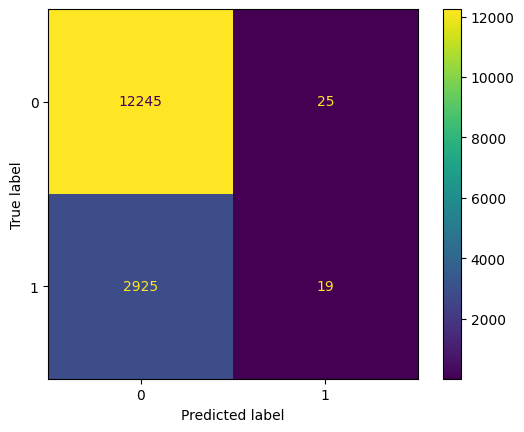

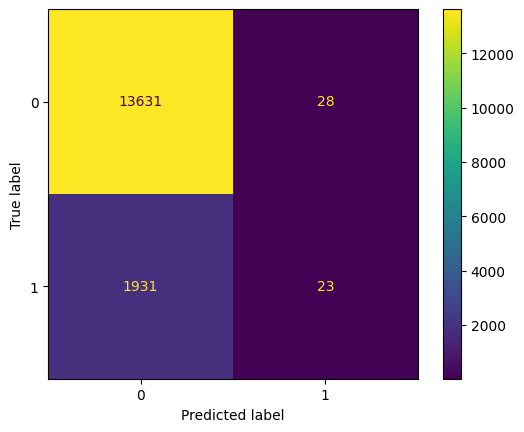

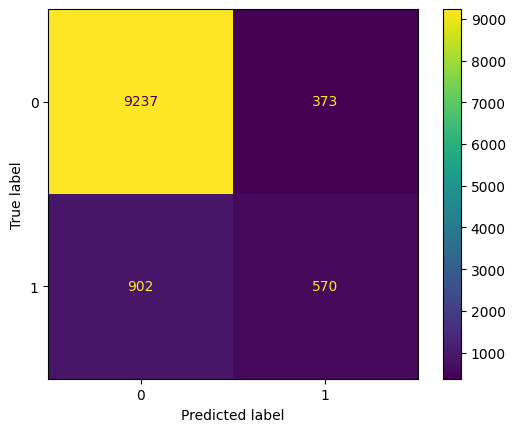

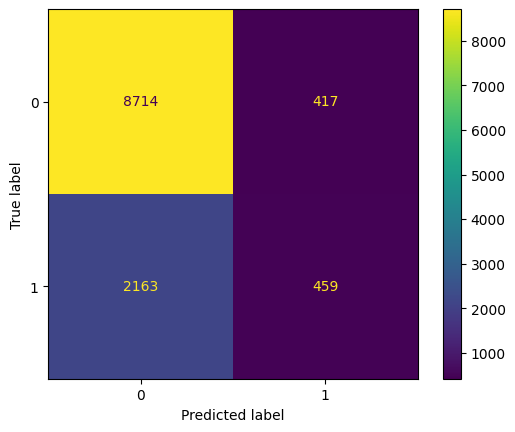

In [ ]:
# 1. Correct imports
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import SingleTableMetadata
import pandas as pd
import os
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns

# 2. Mount Google Drive
drive.mount('/content/drive')

# 3. Functions

# Function to generate or load synthetic data
def generate_or_load_synthetic_data(real_data, company_name, epochs=100):
    base_folder = "/content/drive/MyDrive/Lending_Club_Data_Analysis"
    synthetic_folder = os.path.join(base_folder, "Synthetic_Datasets_CTGAN")
    os.makedirs(synthetic_folder, exist_ok=True)

    synthetic_data_path = os.path.join(synthetic_folder, f"{company_name}_synthetic.csv")

    # 🔎 Check if synthetic data already exists
    if os.path.exists(synthetic_data_path):
        print(f"📂 Found existing synthetic data for {company_name}. Loading it...")
        synthetic_data = pd.read_csv(synthetic_data_path)
        return synthetic_data

    print(f"🚀 Generating synthetic data for {company_name}...")

    target = 'loan_status'
    features = real_data.drop(columns=[target])

    # Drop constant columns automatically
    nunique = features.nunique()
    constant_cols = nunique[nunique <= 1].index.tolist()

    if constant_cols:
        print(f"Dropping constant columns: {constant_cols}")
        features = features.drop(columns=constant_cols)
        real_data = real_data.drop(columns=constant_cols)

    # Build metadata
    metadata = SingleTableMetadata()
    metadata.detect_from_dataframe(data=real_data)

    # Create the synthesizer with metadata
    model = CTGANSynthesizer(metadata=metadata, epochs=epochs)

    # Fit
    model.fit(real_data)

    # Generate synthetic data
    synthetic_data = model.sample(len(real_data))

    # Force correct numeric types
    synthetic_data = synthetic_data.apply(pd.to_numeric, errors='ignore')

    # --- Save synthetic data ---
    synthetic_data.to_csv(synthetic_data_path, index=False)
    print(f"✅ Saved synthetic data for {company_name}.")

    # --- Save metadata ---
    meta_folder = os.path.join(base_folder, "Metadata_Files_CTGAN")
    os.makedirs(meta_folder, exist_ok=True)
    metadata.save_to_json(os.path.join(meta_folder, f"{company_name}_metadata.json"))
    print(f"✅ Saved metadata for {company_name}.")

    # --- Plot synthetic data ---
    plot_folder = os.path.join(base_folder, "Synthetic_Data_Plots_CTGAN")
    os.makedirs(plot_folder, exist_ok=True)

    sample_cols = synthetic_data.select_dtypes(include=['number']).columns[:5]  # first 5 numeric features

    for col in sample_cols:
        plt.figure(figsize=(6,4))
        sns.histplot(synthetic_data[col], kde=True, color='skyblue')
        plt.title(f"{col} - Synthetic Data Distribution ({company_name})")
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plot_path = os.path.join(plot_folder, f"{company_name}_{col}_distribution.png")
        plt.savefig(plot_path)
        plt.close()
    print(f"✅ Saved distribution plots for {company_name}.")

    return synthetic_data

# Function to train on real + synthetic data
def train_on_augmented_data(real_data, synthetic_data, company_name):
    # Combine real and synthetic
    combined_data = pd.concat([real_data, synthetic_data], ignore_index=True)

    # Paths
    base_folder = "/content/drive/MyDrive/Lending_Club_Data_Analysis"
    save_folder = os.path.join(base_folder, "Synthetic_Results_CTGAN")
    os.makedirs(save_folder, exist_ok=True)

    report_path = os.path.join(save_folder, f"{company_name}_augmented_classification_report.txt")
    cm_path = os.path.join(save_folder, f"{company_name}_augmented_confusion_matrix.png")

    # Split features and target
    X = combined_data.drop('loan_status', axis=1)
    y = combined_data['loan_status']

    # 🚑 Fix dtypes
    X = X.apply(pd.to_numeric, errors='ignore')
    for col in X.columns:
        if X[col].dtype == 'object':
            X[col] = X[col].astype('category').cat.codes

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.1, random_state=42, stratify=y
    )

    # Train model
    model = xgb.XGBClassifier(
        objective="binary:logistic",
        learning_rate=0.1,
        max_depth=6,
        eval_metric='logloss',
        random_state=42
    )
    model.fit(X_train, y_train)

    # Predict
    preds = model.predict(X_test)

    # Classification report
    classif_report = classification_report(y_test, preds)

    # Print report
    print(f"=== Augmented (Real + Synthetic) Classification Report for {company_name} ===")
    print(classif_report)

    # Save report
    with open(report_path, "w") as f:
        f.write(f"=== Augmented (Real + Synthetic) Classification Report for {company_name} ===\n\n")
        f.write(classif_report)

    # Confusion matrix
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    fig, ax = plt.subplots(figsize=(6,6))
    disp.plot(cmap='Blues', ax=ax)
    plt.title(f"Confusion Matrix - {company_name} (Augmented)")

        # Save confusion matrix plot
    plt.savefig(cm_path)
    plt.close()

    print(f"✅ Augmented model results saved for {company_name}!\n")

    # Save model
    model_folder = os.path.join(base_folder, "Synthetic_Results_CTGAN", "Models")
    os.makedirs(model_folder, exist_ok=True)
    model_path = os.path.join(model_folder, f"{company_name}_augmented_model.json")
    model.save_model(model_path)
    print(f"💾 Model saved to {model_path}")

    return model


# 4. Load your 20 company datasets
folder = "/content/drive/MyDrive/Lending_Club_Data_Analysis/Data_Companies"
NUM_COMPANIES = 20

datasets = []
for i in range(1, NUM_COMPANIES + 1):
    path = os.path.join(folder, f"company{i}_data.csv")
    company_data = pd.read_csv(path)
    datasets.append(company_data)

print(f"✅ Loaded {len(datasets)} company datasets!")

# 5. Generate synthetic data, save it, or load it, plot it, and train model for each company
START_FROM = 1  # <<<<<< Adjust here if you want to skip companies!

for idx, company_data in enumerate(datasets[START_FROM-1:], start=START_FROM):
    company_name = f"Company_{idx}"
    print(f"🔵 Processing {company_name}")

    synthetic_data = generate_or_load_synthetic_data(company_data, company_name)
    train_on_augmented_data(company_data, synthetic_data, company_name)


### Summarize results

In [ ]:
import os
import re
import pandas as pd
from IPython.display import display

# Folder where reports are saved
reports_folder = "/content/drive/MyDrive/Lending_Club_Data_Analysis/Synthetic_Results_CTGAN"


# Initialize list to store results
summary_data = []

# Loop through each report file
for file in os.listdir(reports_folder):
    if file.endswith("_classification_report.txt"):
        company_name = file.replace("_classification_report.txt", "")
        with open(os.path.join(reports_folder, file), "r") as f:
            content = f.read()

        # Extract precision, recall, f1-score for each class using regex
        matches = re.findall(r"\n\s*(\d)\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)\s+(\d+)", content)
        if len(matches) == 2:  # Expecting two classes: 0 and 1
            class_0 = [float(x) for x in matches[0][1:4]]
            class_1 = [float(x) for x in matches[1][1:4]]
        else:
            class_0 = class_1 = [None, None, None]

        # Extract accuracy, macro avg, and weighted avg
        acc_match = re.search(r"accuracy\s+([\d.]+)", content)
        macro_match = re.search(r"macro avg\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)", content)
        weighted_match = re.search(r"weighted avg\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)", content)


        accuracy = float(acc_match.group(1)) if acc_match else None
        macro_avg = [float(x) for x in macro_match.groups()] if macro_match else [None, None, None]
        weighted_avg = [float(x) for x in weighted_match.groups()] if weighted_match else [None, None, None]

        summary_data.append({
            "Company": company_name,
            "Class0_Precision": class_0[0],
            "Class0_Recall": class_0[1],
            "Class0_F1": class_0[2],
            "Class1_Precision": class_1[0],
            "Class1_Recall": class_1[1],
            "Class1_F1": class_1[2],
            "Accuracy": accuracy,
            "Macro_Precision": macro_avg[0],
            "Macro_Recall": macro_avg[1],
            "Macro_F1": macro_avg[2],
            "Weighted_Precision": weighted_avg[0],
            "Weighted_Recall": weighted_avg[1],
            "Weighted_F1": weighted_avg[2],
        })

# Convert to DataFrame
summary_df = pd.DataFrame(summary_data)

# Calculate mean of numeric columns
avg_metrics = summary_df.drop(columns=["Company"]).mean().round(3)

# Convert to a new DataFrame for clean display
avg_df = avg_metrics.reset_index()
avg_df.columns = ["Metric", "Average Value"]

# Show average metrics
from IPython.display import display
print("📈 **Average Classification Metrics Across All Companies**")
display(avg_df)

# Optionally: save to CSV
avg_df.to_csv(os.path.join(reports_folder, "average_classification_metrics.csv"), index=False)

# Display the summary DataFrame in Colab
from IPython.display import display
print("📋 Classification Report Summary Across All Companies")
display(summary_df)


# Optionally: save to CSV
summary_df.to_csv(os.path.join(reports_folder, "summary_of_classification_reports.csv"), index=False)


📈 **Average Classification Metrics Across All Companies**


Metric  Average Value
0     Class0_Precision          0.808
1        Class0_Recall          0.926
2            Class0_F1          0.860
3     Class1_Precision          0.529
4        Class1_Recall          0.188
5            Class1_F1          0.221
6             Accuracy          0.791
7      Macro_Precision          0.667
8         Macro_Recall          0.554
9             Macro_F1          0.541
10  Weighted_Precision          0.758
11     Weighted_Recall          0.791
12         Weighted_F1          0.746

📋 Classification Report Summary Across All Companies


Company  Class0_Precision  Class0_Recall  Class0_F1  \
0    Company_1_augmented              0.79           0.96       0.87   
1    Company_2_augmented              0.74           0.88       0.80   
2    Company_3_augmented              0.71           0.98       0.82   
3    Company_4_augmented              0.82           1.00       0.90   
4    Company_5_augmented              0.63           0.51       0.56   
5    Company_7_augmented              0.85           0.99       0.91   
6    Company_6_augmented              0.92           1.00       0.96   
7    Company_8_augmented              0.91           0.99       0.95   
8    Company_9_augmented              0.88           1.00       0.93   
9   Company_10_augmented              0.81           0.97       0.89   
10  Company_11_augmented              0.78           0.72       0.75   
11  Company_12_augmented              0.88           1.00       0.93   
12  Company_13_augmented              0.84           1.00       0.91   
13  Company_14_augmented              0.56           0.75       0.64   
14  Company_15_augmented              0.81           0.85       0.83   
15  Company_16_augmented              0.83           1.00       0.91   
16  Company_17_augmented              0.81           1.00       0.89   
17  Company_18_augmented              0.88           1.00       0.93   
18  Company_19_augmented              0.91           0.96       0.94   
19  Company_20_augmented              0.80           0.95       0.87   

    Class1_Precision  Class1_Recall  Class1_F1  Accuracy  Macro_Precision  \
0               0.61           0.18       0.28      0.78             0.70   
1               0.65           0.42       0.51      0.72             0.69   
2               0.48           0.05       0.09      0.70             0.60   
3               0.54           0.01       0.03      0.82             0.68   
4               0.57           0.68       0.62      0.59             0.60   
5               0.54           0.08       0.14      0.84             0.70   
6               0.37           0.01       0.01      0.92             0.64   
7               0.54           0.06       0.10      0.90             0.72   
8               0.37           0.01       0.03      0.87             0.62   
9               0.59           0.15       0.24      0.80             0.70   
10              0.56           0.63       0.59      0.69             0.67   
11              0.55           0.02       0.04      0.88             0.71   
12              0.49           0.01       0.02      0.83             0.66   
13              0.57           0.36       0.44      0.56             0.56   
14              0.55           0.48       0.51      0.75             0.68   
15              0.61           0.01       0.02      0.83             0.72   
16              0.43           0.01       0.01      0.81             0.62   
17              0.45           0.01       0.02      0.87             0.66   
18              0.60           0.39       0.47      0.88             0.76   
19              0.52           0.18       0.26      0.78             0.66   

    Macro_Recall  Macro_F1  Weighted_Precision  Weighted_Recall  Weighted_F1  
0           0.57      0.58                0.75             0.78         0.73  
1           0.65      0.65                0.71             0.72         0.70  
2           0.51      0.46                0.64             0.70         0.61  
3           0.51      0.46                0.77             0.82         0.74  
4           0.59      0.59                0.60             0.59         0.59  
5           0.53      0.53                0.80             0.84         0.79  
6           0.50      0.48                0.87             0.92         0.88  
7           0.53      0.53                0.87             0.90         0.86  
8           0.51      0.48                0.81             0.87         0.82  
9           0.56      0.56                0.77             0.80         0.75  
10          0.67 

# Comparison between different models

In [ ]:
import os
import xgboost as xgb
import pandas as pd

# === 1. Load evaluation data
evaluation_data = pd.read_csv("/content/drive/MyDrive/Lending_Club_Data_Analysis/preprocessed_data_eval.csv")

# Split features and target
X_eval = evaluation_data.drop(columns=["loan_status"])
y_eval = evaluation_data["loan_status"]

# Convert to DMatrix for XGBoost evaluation
dtest = xgb.DMatrix(X_eval)

# === 2. Load global/federated model
federated_model_path = "/content/drive/MyDrive/Lending_Club_Data_Analysis/Federated_Results/global_model.xgb"
federated_model = xgb.Booster()
federated_model.load_model(federated_model_path)

# === 3. Load base model (trained on full data)
basemodel_full_path = "/content/drive/MyDrive/Lending_Club_Data_Analysis/Basemodel_FullData/BasemodelFullData.json"
basemodel_full = xgb.Booster()
basemodel_full.load_model(basemodel_full_path)

# === 4. Load base models (trained on individual companies)
basemodels_split_folder = "/content/drive/MyDrive/Lending_Club_Data_Analysis/Basemodel_Results/Models"
basemodels_split = []

for i in range(1, 21):  # Assuming 20 companies
    model_path = os.path.join(basemodels_split_folder, f"Company{i}_model.json")
    model = xgb.Booster()
    model.load_model(model_path)
    basemodels_split.append((f"Company{i}", model))

# === 5. Load CTGAN-augmented models (trained on real + synthetic)
sdg_models_folder = "/content/drive/MyDrive/Lending_Club_Data_Analysis/Synthetic_Results_CTGAN/Models"
sdg_models = []

for i in range(1, 21):  # Assuming 20 companies
    model_path = os.path.join(sdg_models_folder, f"Company_{i}_augmented_model.json")
    model = xgb.Booster()
    model.load_model(model_path)
    sdg_models.append((f"Company_{i}", model))

print("✅ All models loaded and ready for evaluation.")


✅ All models loaded and ready for evaluation.


                  Model  Accuracy  Precision    Recall  F1-Score
0       Federated_Model  0.719586   0.341018  0.461723  0.392296
1    Full_Data_Baseline  0.806441   0.557974  0.060518  0.109194
2  BaseModels_Split_Avg  0.776556   0.491754  0.176965  0.167604
3        SDG_Models_Avg  0.777253   0.495742  0.171015  0.161575


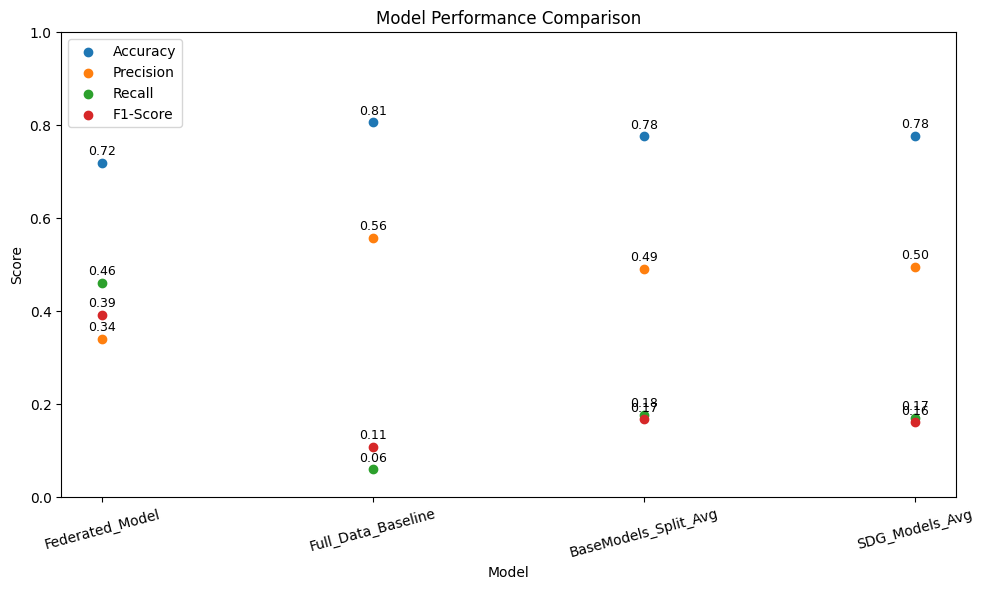

In [ ]:
import os
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# === Setup ===
comparison_folder = "/content/drive/MyDrive/Lending_Club_Data_Analysis/Comparison"
os.makedirs(comparison_folder, exist_ok=True)

def evaluate_and_save(name, model, X, y_true):
    dtest = xgb.DMatrix(X)
    y_pred_prob = model.predict(dtest)
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Metrics
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Report and confusion matrix
    report = classification_report(y_true, y_pred, target_names=["Non-Default", "Default"])
    cm = confusion_matrix(y_true, y_pred)

    # Save report
    with open(os.path.join(comparison_folder, f"{name}_report.txt"), "w") as f:
        f.write(f"=== Classification Report for {name} ===\n\n")
        f.write(report)

    # Save confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Non-Default", "Default"],
                yticklabels=["Non-Default", "Default"])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.savefig(os.path.join(comparison_folder, f"{name}_confusion_matrix.png"))
    plt.close()

    return {
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1
    }

# === Evaluate global models ===
results = []

results.append(evaluate_and_save("Federated_Model", federated_model, X_eval, y_eval))
results.append(evaluate_and_save("Full_Data_Baseline", basemodel_full, X_eval, y_eval))

# === Evaluate & average split base models ===
base_split_scores = []
for name, model in basemodels_split:
    base_split_scores.append(evaluate_and_save(name, model, X_eval, y_eval))
# Compute average
avg_base = pd.DataFrame(base_split_scores).drop(columns=["Model"]).mean().to_dict()
avg_base["Model"] = "BaseModels_Split_Avg"
results.append(avg_base)

# === Evaluate & average SDG models ===
sdg_scores = []
for name, model in sdg_models:
    sdg_scores.append(evaluate_and_save(name, model, X_eval, y_eval))
# Compute average
avg_sdg = pd.DataFrame(sdg_scores).drop(columns=["Model"]).mean().to_dict()
avg_sdg["Model"] = "SDG_Models_Avg"
results.append(avg_sdg)

# === Create comparison table ===
results_df = pd.DataFrame(results)
results_df = results_df[["Model", "Accuracy", "Precision", "Recall", "F1-Score"]]
print(results_df)
results_df.to_csv(os.path.join(comparison_folder, "model_comparison_table.csv"), index=False)

# === Plot comparison (with labels, no lines) ===
plt.figure(figsize=(10, 6))
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

for idx, metric in enumerate(metrics):
    for i, val in enumerate(results_df[metric]):
        plt.scatter(results_df["Model"][i], val, color=colors[idx], label=metric if i == 0 else "")
        plt.text(i, val + 0.01, f"{val:.2f}", ha='center', va='bottom', fontsize=9)

plt.title("Model Performance Comparison")
plt.xlabel("Model")
plt.ylabel("Score")
plt.legend()
plt.xticks(rotation=15)
plt.ylim(0, 1)  # set fixed y-axis for clarity
plt.tight_layout()
plt.savefig(os.path.join(comparison_folder, "model_performance_comparison.png"))
plt.show()



### Model Comparison Interpretation (Loan Default Prediction)

| Model                 | Accuracy | Precision | Recall | F1-Score |
|-----------------------|----------|-----------|--------|----------|
| **Federated Model**   | 0.72     | 0.34      | **0.46** | **0.39** |
| **Full Data Baseline**| **0.81** | **0.56**  | 0.06   | 0.11     |
| BaseModels Split Avg  | 0.78     | 0.49      | 0.18   | 0.17     |
| SDG Models Avg        | 0.78     | 0.50      | 0.17   | 0.16     |

---

### 🔍 Key Insights:

- **Federated Model**:
  - Best **recall (0.46)** and **F1-score (0.39)** for detecting defaults.
  - Lower precision and accuracy, but better at catching actual defaults.
  - **Best choice when missing defaults is costly.**

- **Full Data Baseline**:
  - Highest **accuracy (0.81)** and **precision (0.56)**.
  - **Terrible recall (0.06)** → misses almost all actual defaults.
  - **Misleadingly high accuracy** due to class imbalance.

- **BaseModels Split & SDG Models**:
  - Balanced in performance, with recall and F1 better than the full-data baseline.
  - Slight improvement in precision with SDG models.
  - Useful when federated training isn’t possible.

---

### Recommendation:

- Use the **federated model** when the goal is **reliable default detection** (higher recall).
- The **full-data model** overfits to the majority class and should be avoided for detecting rare defaults.
- **Split and SDG models** are reasonable fallbacks when data can’t be centralized or shared.

